<a href="https://colab.research.google.com/github/KSID05/IPL-T20-Cricket-Analysis/blob/main/Siddhant_Kumar_EDA_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

We will first import the important libraries and load 6 csv files that we will be working with.Those file are as follows:


*   *matches_df* : It contains all the information regarding the IPL seasons, match date, teams matches, who won the toss, who won the match,player of the match,venue names and many other informations.

*   *teams_df* : It contains names of all the participating teams in IPL from 2008 to 2019.

*   *players_df* : It contains the information of the players participated in IPL from 2008 to 2019,like name, DOB, Country etc.

*   *teamswise_homeaway_df*: It contains all the information regarding the home and away matches of the team with their win%.

*   *most_runs_average_df* : It contains the batsmen information such as runs scored, ball faced, average, strikerate etc.

*   *deliveries_df* : It contains ball by ball information of every match held in IPL from 2008 to 2019.






In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Importing matplotlib.pyplot 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory_path='/content/drive/MyDrive/AlmaBetter Data Science Course/Capstone Project-1/IPL/'

In [ ]:
matches_df = pd.read_csv(directory_path + 'matches.csv')

# Creating a copy of the original datframe inorder to not make changes in the original dataframe by mistake
matches_df_copy=matches_df.copy()

In [ ]:
teams_df = pd.read_csv(directory_path + 'teams.csv')

In [ ]:
players_df = pd.read_csv(directory_path + 'Players.csv')
# Creating a copy of the original datframe inorder to not make changes in the original dataframe by mistake
players_df_copy=players_df.copy()

In [ ]:
teamswise_homeaway_df = pd.read_csv(directory_path + 'teamwise_home_and_away.csv')

# Creating a copy of the original datframe inorder to not make changes in the original dataframe by mistake
teamswise_homeaway_df_copy=teamswise_homeaway_df.copy()

In [ ]:
most_runs_average_df = pd.read_csv(directory_path + 'most_runs_average_strikerate.csv')
# Creating a copy of the original datframe inorder to not make changes in the original dataframe by mistake
most_runs_average_df_copy=most_runs_average_df.copy()

In [ ]:
deliveries_df = pd.read_csv(directory_path + 'deliveries.csv')
# Creating a copy of the original datframe inorder to not make changes in the original dataframe by mistake
deliveries_df_copy=deliveries_df.copy()

In [ ]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl 

#**What to expect ?**

We will limit the scope of our analysis on the below mentioned points :


*   Season wise stats of the teams in IPL and the top performing players.

*   Top 5 highest run scoring batsmen overall.

*   Top 5 highest wicket taking bowlers overall.

*   Teams which played maximum number of finals.

*   Two most consistent teams.

*   Overall Team stats 

*   How toss affects the outcome of match.

*   Number of matches held every season

*   Venues of IPL

*   Batting hand of players

*   International players participation


We will do Exploratory Data Analysis on all the mentioned points and will try to come to conslusion.










**Lets Begin**

# **Lets do a deeper dive in the IPL seasons yearwise (2008-2019)**

For performing a deeper dive we will use the below files for our analysis


> matches_df_copy


> deliveries_df_copy


> most_runs_average_df



We will try to fetch the below informations from these csv files :


*   Stats of the participating teams like matches played,matches won,win percentage etc.

*   We will also try to see the dependency of toss on the outcome of the of the match, whether the toss winning teams has higher chances of winning or not.

*   Winners of the IPL seasons.

*   Most man of the match award winning player for the season.

*   Orange Cap Holder(Highest run scoring batsman).

*   Purple Cap Holder(Highest wicket taking bowler).

*   Top 5 most scoring batsmen and wicket taking bowlers.

*   We will fetch stats of the top 5 batsmen and bowlers and will analyze the performance of these batsmen and bowlers in the IPL from 2008 to 2019.












># Defining 4 functions which will be used as we proceed further:

Here we are defining 4 functions :


*   *ipl_season_team_stats* : It returns the points table mentioned season in IPL.

*   *wicket_taking_bowler_df* : It returns the stats of the bowlers.

*   *top_5_batsman_overall* : It returns the stats of the top 5 overall batsmen in the mentioned IPL season.

*   *top_5_bowler_overall* : It returns the stats of the top 5 overall bowler in the mentioned IPL season.





In [ ]:
# Function-1
def ipl_season_team_stats(team1,team2,toss_winner,winner):
  '''
  This function takes columns as inputs and return the points table of the seasons inputted
  '''

  # matches played as team1 and team2 which will be used to count total matches played in the season
  matches_played_1=team1.value_counts().reset_index()
  matches_played_2=team2.value_counts().reset_index()

  # creating a dataframe from above two columns
  df_team_matches_stats=pd.merge(matches_played_1,matches_played_2,how='inner',on='index')
  df_team_matches_stats=df_team_matches_stats.set_index('index')

  ######
  # Defining a function

  def total_matches_played_in_season(team1,team2):
    '''
    This function takes 2 inputs team1 and team2 columns of the dataframe and returns the total matches played by the team
    '''

    return (team1+team2)

  #####
  # creating a dataframe with now three columns team1 team2 and matches_played_total
  df_team_matches_stats['matches_played']=df_team_matches_stats.apply(lambda x:total_matches_played_in_season(x['team1'],x['team2']),axis=1)

  # Dataframe which contains the column match winner
  matches_won_df=winner.value_counts().reset_index()

  # Adding another column winner to the dataframe df_team_matches_stats
  df_team_matches_stats=pd.merge(df_team_matches_stats,matches_won_df,how='inner',on='index')

  # creating dataframe with team names and number of times they have won toss
  toss_won_df=toss_winner.value_counts().reset_index()
  toss_won_df=toss_won_df.set_index('index')

  # Merging the dataframe to obtain new column toss_winner  in df_team_matches_stats
  df_team_matches_stats=pd.merge(df_team_matches_stats,toss_won_df,how='inner',on='index')
  
  #########
  # Creating a function

  def match_toss_match_win_dict(toss_winner,winner):
    '''
    This function takes 2 inputs "column_toss_winner" and "column_winner" and returns dictionary of team and number of times they have won the match when they have won the toss
    '''

    toss_winner_list=[]
    for t_winner in toss_winner:
      toss_winner_list.append(t_winner)

    match_winner_list=[]
    for m_winner in winner:
      match_winner_list.append(m_winner)

    match_toss_match_win = {}
    for index,team in enumerate(toss_winner_list):
      if team==match_winner_list[index]:
        match_toss_match_win[team] = match_toss_match_win.get(team, 0) + 1

    return match_toss_match_win

  ##########

  # Calling the function match_toss_match_win_dict
  match_toss_match_win_dictionary=match_toss_match_win_dict(toss_winner,winner)

  match_toss_match_win_df=pd.DataFrame({'team':match_toss_match_win_dictionary.keys(),'toss_win_match_win':match_toss_match_win_dictionary.values()})
  match_toss_match_win_df=match_toss_match_win_df.set_index('team') 

  # Adding another column by merging the dataframes
  df_team_matches_stats=pd.merge(df_team_matches_stats,match_toss_match_win_df,how='inner',left_on='index',right_on='team')

  # Dropping the columns which are not needed
  df_team_matches_stats_final=df_team_matches_stats.drop(['team1','team2'],axis=1)
  df_team_matches_stats_final=df_team_matches_stats_final.rename(columns={'index':'Team','winner':'won','toss_winner':'won_toss',})
  
  # lets add another 2 columns to the df_team_matches_stats_final dataframe


  ##

  # Function
  def season_percentage_win(won,matches_played):
    '''
    This function take two columns won and matches played as input and returns the win percentage of the team in that season
    '''
    win_percent=(won/matches_played)*100

    return win_percent
  ##

  # Function
  def toss_win_vs_match_win_percentage(toss_win_match_win,won_toss):
    '''
    This function take two columns toss_win_match_win and won_toss played as input and returns the tosswin Vs matchwin percentage of the team in that season
    '''
    toss_vs_match_win=(toss_win_match_win/won_toss)*100

    return toss_vs_match_win
  ##

  df_team_matches_stats_final['Win%']=df_team_matches_stats_final.apply(lambda x:season_percentage_win(x['won'],x['matches_played']),axis=1)
  df_team_matches_stats_final['toss_vs_match_win%']=df_team_matches_stats_final.apply(lambda x:season_percentage_win(x['toss_win_match_win'],x['won_toss']),axis=1)


  return df_team_matches_stats_final


In [ ]:
# Function-2
# Defining another function for finding the top bowlers

def wicket_taking_bowler_df(dismissal_kind,dataframe):
  '''
  This function will take df[column dismissal_kind] and df as input and return the dataframe of bowlers who have took wickets.
  '''
  Wicket_takers_list=[]
  for index,i in enumerate(dismissal_kind):
    if ((i=='caught') | (i=='bowled') | (i=='lbw') | (i=='stumped') | (i=='caught and bowled') | (i=='hit wicket')):
      Wicket_takers_list.append(dataframe['bowler'].iloc[index])


  # Creating a dictionary with bowler and wickets in the entire season:

  wicket_counts_season = {}
  for n in Wicket_takers_list:
    wicket_counts_season[n] = wicket_counts_season.get(n, 0) + 1    

  # finding the best bowlers with most wickets
  bowler_stats_season=pd.DataFrame({'Bowler':wicket_counts_season.keys(),'Wickets':wicket_counts_season.values()})
  bowler_stats_season=bowler_stats_season.sort_values('Wickets',ascending=False).reset_index() 
  bowler_stats_season.drop('index',axis=1,inplace=True)

  return bowler_stats_season

In [ ]:
#Function-3
def top_5_batsman_overall(batsmen_stats_year):
  '''
  This function takes the dataframe of batsmen stats as input and returns the dataframe of top 5 overall batsmen stats for that season 
  '''
  top_5_overall_batsmen_runs_year={}
  for i in top_5_batsmen_overall_list:
    for index,row in enumerate(batsmen_stats_year['batsman']):
      if i==row:
        top_5_overall_batsmen_runs_year[i]=batsmen_stats_year.loc[index,'batsman_runs']
    else :
      continue 

  top_5_overall_batsmen_runs_year_df=pd.DataFrame({'Names':top_5_overall_batsmen_runs_year.keys(),'Runs':top_5_overall_batsmen_runs_year.values()})
  
  return top_5_overall_batsmen_runs_year_df

In [ ]:
# Function-4
def top_5_bowler_overall(bowler_stats_year):
  '''
  This function takes the dataframe of batsmen stats as input and returns the dataframe of top 5 overall bowler stats for that season 
  '''
  top_5_overall_bowler_wickets_year={}
  for i in top_5_bowler_overall_list:
    for index,row in enumerate(bowler_stats_year['Bowler']):
      if i==row:
        top_5_overall_bowler_wickets_year[i]=bowler_stats_year.loc[index,'Wickets']
    else :
      continue 

  top_5_overall_bowler_wickets_year=pd.DataFrame({'Names':top_5_overall_bowler_wickets_year.keys(),'Wickets':top_5_overall_bowler_wickets_year.values()})
  
  return top_5_overall_bowler_wickets_year

># Finding the top 5 highest run scoring Batsman overall from 2008 to 2019 in IPL

Lets first try to fetch the information of the top 5 batsman on the basis of the runs scored.We will analyse the players overall performance based on the following factors:


*   Runs Scored and the Ball faced in IPL
*   Average



In [ ]:
# Top 5 most scoring batsmen overall from IPL-2008 to IPL-2019
most_runs_average_df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


Text(0, 0.5, 'Total Runs Scored and Balls Faced')

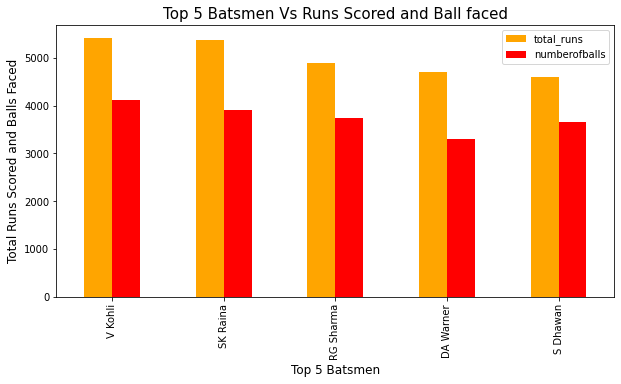

In [ ]:
# Plotting Top 5 Batsmen Vs Runs Scored and Ball faced in IPL from 2008 to 2019

ax = most_runs_average_df[:5].plot(x="batsman", y=["total_runs",'numberofballs'], kind="bar",color=['orange','red'],figsize = (10,5))
# Set the title
ax.set_title("Top 5 Batsmen Vs Runs Scored and Ball faced", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Top 5 Batsmen', fontsize = 12)
ax.set_ylabel("Total Runs Scored and Balls Faced", fontsize = 12)

Text(0, 0.5, 'Average')

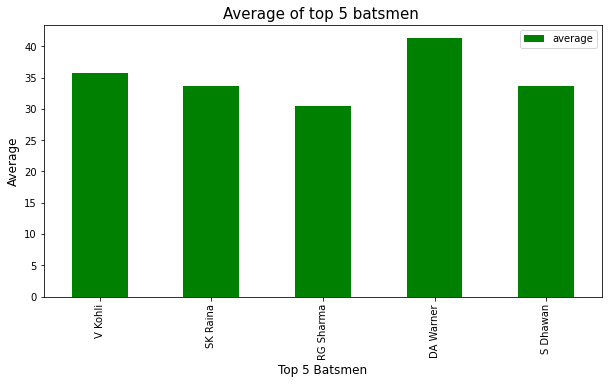

In [ ]:
# Plotting the Average of top 5 batsmen in IPL from 2008 to 2019

ax = most_runs_average_df[:5].plot(x="batsman", y=["average"], kind="bar",color=['green'],figsize = (10,5))
# Set the title
ax.set_title("Average of top 5 batsmen ", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Top 5 Batsmen', fontsize = 12)
ax.set_ylabel("Average", fontsize = 12)

By analysing the above two plots and 'most_runs_average_df' we have below findings:


1.   Virat Kohli is leading run scorer with 5426 runs and has also faced maximum number of balls compared to the other 4 batsmen.
2.   Despite Virat Kohli being the highest run scorer, DA Warner has a better average of 41, which is the best among the top 5 batsmen list and also he has faced the minimum number of balls as compared to the other 4.
3.   DA Warner has an impressive strike rate of around 140 which is the best among the top 5.






In order to analyse the season wise performance of these players we will create a list of these batsmen and will try to fetch the stats of these players in each season from 2008 to 2019.

In [ ]:
# Creating a list of top 5 batsmen overall from ipl-2008 to ipl 2019
top_5_batsmen_overall_list=[]
for i in most_runs_average_df['batsman'][:5]:
  top_5_batsmen_overall_list.append(i)

In [ ]:
# Creating the list of top 5 batsman overall.This list will be used for finding the season wise stats of these players
top_5_batsmen_overall_list

['V Kohli', 'SK Raina', 'RG Sharma', 'DA Warner', 'S Dhawan']

We will limit our scope of analysis on these 5 batsmen only.

># Finding the top 5 highest Wicket taking Bowler overall in IPL from 2008 to 2019

In [ ]:
# Creating a Dataframe for the wickets taken by the bowlers from IPL-2008 to IPL-2019
top_bowler_overall=wicket_taking_bowler_df(deliveries_df_copy['dismissal_kind'],deliveries_df_copy)
top_bowler_overall

,Bowler,Wickets
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
...,...,...
343,S Vidyut,1
344,DB Ravi Teja,1
345,AM Rahane,1
346,SB Joshi,1


In [ ]:
# Top 5 highest wicket taking bowler overall from IPL-2008 to IPL-2019
top_5_overall_bowlers=top_bowler_overall[:5]
top_5_overall_bowlers

,Bowler,Wickets
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147


Text(0, 0.5, 'Total Wickets Taken')

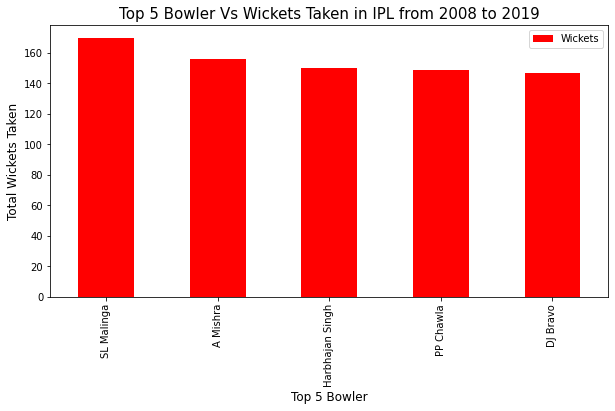

In [ ]:
# Plotting Top 5 Batsmen Vs Runs Scored and Ball faced in IPL from 2008 to 2019

ax = top_5_overall_bowlers[:5].plot(x="Bowler", y=["Wickets"], kind="bar",color=['red'],figsize = (10,5))
# Set the title
ax.set_title("Top 5 Bowler Vs Wickets Taken in IPL from 2008 to 2019", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Top 5 Bowler', fontsize = 12)
ax.set_ylabel("Total Wickets Taken", fontsize = 12)

By analysing the above plot and 'top_5_overall_bowlers' we have below findings:


1.   SL Malinga is the highest wicket taking bowler with a tally of 170 wickets,14 more than the second best Amit Mishra.




In [ ]:
# Top 5 highest wicket taking bowler list.This list will be used for finding the season wise stats of these players
top_5_bowler_overall_list=[]
for i in top_5_overall_bowlers['Bowler']:
  top_5_bowler_overall_list.append(i)

print(top_5_bowler_overall_list)

['SL Malinga', 'A Mishra', 'Harbhajan Singh', 'PP Chawla', 'DJ Bravo']


We will limit the scope of our analysis to these top 5 bowlers only.

# **IPL SEASON 2008 to 2019 Stats**

We will analyze each season of the IPL and will answer the following questions:


1.   Which team won the title?
2.   Win% of the teams.
3.   Effect of the toss on the outcome of the match in the season.
4.   Which player won maximum man of the match award?
5.   Orange Cap holder.
6.   Purple Cap Holder.








># IPL SEASON 2008

Inorder to find the IPL-2008 stats, we will fetch the information from the "matches_df_copy" dataframe for only those matches whose Season value "IPL-2008".

In [ ]:
# Fetching info from the main DataFrame and storing it in another variable.
ipl_2008_df=matches_df_copy[matches_df_copy['Season']=='IPL-2008']

In [ ]:
ipl_2008_df.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
59,60,IPL-2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
60,61,IPL-2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


In [ ]:
# Calling the "ipl_season_team_stats" function defined above.
ipl_2008_stats=ipl_season_team_stats(ipl_2008_df['team1'],ipl_2008_df['team2'],ipl_2008_df['toss_winner'],ipl_2008_df['winner'])

In [ ]:
ipl_2008_stats

,Team,matches_played,won,won_toss,toss_win_match_win,Win%,toss_vs_match_win%
0,Chennai Super Kings,16,9,5,3,56.250000,60.000000
1,Kolkata Knight Riders,13,6,6,3,46.153846,50.000000
2,Deccan Chargers,14,2,9,2,14.285714,22.222222
3,Kings XI Punjab,15,10,8,4,66.666667,50.000000
4,Royal Challengers Bangalore,14,4,5,1,28.571429,20.000000
5,Rajasthan Royals,16,13,11,9,81.250000,81.818182
6,Delhi Daredevils,14,7,6,2,50.000000,33.333333
7,Mumbai Indians,14,7,8,4,50.000000,50.000000


Text(0, 0.5, 'Overall Win%')

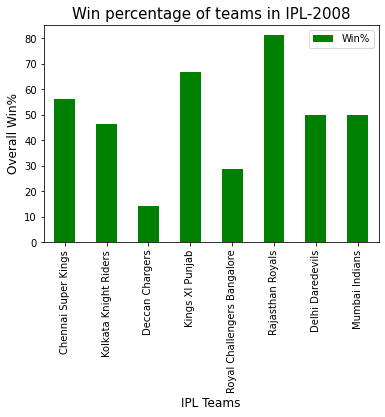

In [ ]:
# Plotting the win percentage of the teams in the season 2008

ax = ipl_2008_stats.plot(x="Team", y="Win%", kind="bar",color='green')
# Set the title
ax.set_title("Win percentage of teams in IPL-2008", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Overall Win%", fontsize = 12)


From the above plot we can see that the Rajasthan Royals have an impressive win% of around 81 which is much high as compared to their competitors.

Lets see how much does the toss affects the outcome of the match.

Text(0, 0.5, 'Win%')

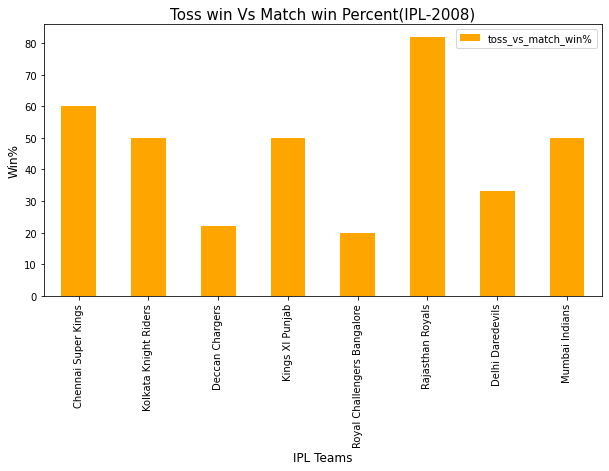

In [ ]:
# Plotting the win percentage of the teams in the season IPL-2008

ax = ipl_2008_stats.plot(x="Team", y="toss_vs_match_win%", kind="bar",color='orange',figsize = (10,5))
# Set the title
ax.set_title("Toss win Vs Match win Percent(IPL-2008)", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Win%", fontsize = 12)

By analyzing the "Toss win Vs Match win Percent" we have below findings :


*   Rajasthan Royals has a winning percentage of around 81% if they win the toss,meaning if they win the toss then their is 81% chance they will win the match also.
*   Out of 8 teams only 3 teams have a Toss win Vs Match win Percent less than 50%,which shows that the toss winning team has a higher chance of winning the match as compared to the toss losing team.

In [ ]:
# Finding the winner of the IPL 2018 season
IPL_2008_winner=ipl_2008_df['winner'].iloc[-1]

In [ ]:
print(f'The winner of the IPL-2008 is {IPL_2008_winner}')

The winner of the IPL-2008 is Rajasthan Royals


In [ ]:
# Players with most man of the match awards
mom_2008_df=ipl_2008_df['player_of_match'].value_counts()
mom_2008_df.head(1)

SE Marsh    5
Name: player_of_match, dtype: int64

**Batsmen Stats**

In [ ]:
#Here we are using the match id to identify the matches of IPL-2008 season

season_2008_deliveries=deliveries_df_copy[(deliveries_df_copy['match_id']>=60) & (deliveries_df_copy['match_id']<118)]
season_2008_deliveries=season_2008_deliveries.set_index('match_id')
season_2008_deliveries.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN
60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
60,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
# Finding the top batsmen by summing up their score for the entire season
batsmen_stats_2008=season_2008_deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
batsmen_stats_2008=batsmen_stats_2008.sort_values('batsman_runs',ascending=False)

In [ ]:
# Finding Batsmen with most runs in the season
batsmen_stats_2008.head()

,batsman,batsman_runs
115,SE Marsh,616
39,G Gambhir,534
126,ST Jayasuriya,514
124,SR Watson,472
40,GC Smith,441


Text(0, 0.5, 'Runs Scored')

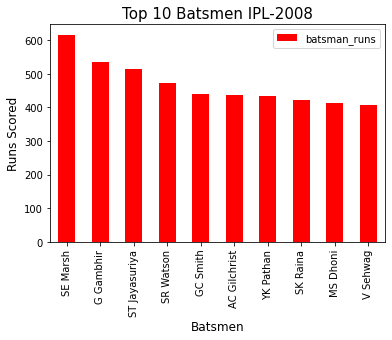

In [ ]:
# Plotting the bar graph for Top 10 Batsmen IPL-2008 in the whole season

ax = batsmen_stats_2008[:10].plot(x="batsman", y="batsman_runs", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Batsmen IPL-2008", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Batsmen', fontsize = 12)
ax.set_ylabel("Runs Scored", fontsize = 12)

In [ ]:
# Top 5 Batsmen for the season IPL-2008
batsmen_stats_2008=batsmen_stats_2008.reset_index()
batsmen_stats_2008.head()

,index,batsman,batsman_runs
0,115,SE Marsh,616
1,39,G Gambhir,534
2,126,ST Jayasuriya,514
3,124,SR Watson,472
4,40,GC Smith,441


In [ ]:
# Runs scored by the top 5 overall batsmen in IPL-2008
top_5_overall_batsmen_runs_2008_df=top_5_batsman_overall(batsmen_stats_2008)
top_5_overall_batsmen_runs_2008_df

,Names,Runs
0,V Kohli,165
1,SK Raina,421
2,RG Sharma,404
3,S Dhawan,340


**Bowler Stats**

In [ ]:
# Finding Bowler with most wickets in the season
bowler_stats_2008=wicket_taking_bowler_df(season_2008_deliveries['dismissal_kind'],season_2008_deliveries)
bowler_stats_2008[:10]

,Bowler,Wickets
0,Sohail Tanvir,22
1,S Sreesanth,19
2,SK Warne,19
3,SR Watson,17
4,JA Morkel,17
5,PP Chawla,17
6,MS Gony,17
7,VY Mahesh,16
8,RP Singh,15
9,MF Maharoof,15


Text(0, 0.5, 'Wickets')

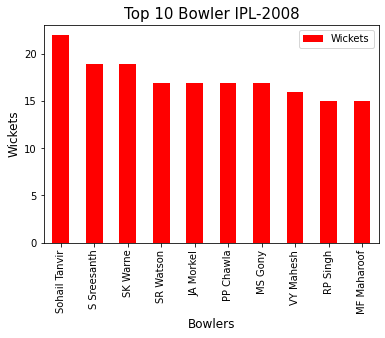

In [ ]:
# Plotting the bar graph for Top 10 Bowler IPL-2008 in the whole season

ax = bowler_stats_2008[:10].plot(x="Bowler", y="Wickets", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Bowler IPL-2008", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Bowlers', fontsize = 12)
ax.set_ylabel("Wickets", fontsize = 12)

In [ ]:
# Finding the stats of the top 5 overall bowlers in this season
top_5_overall_bowler_wickets_2008_df=top_5_bowler_overall(bowler_stats_2008)
top_5_overall_bowler_wickets_2008_df

,Names,Wickets
0,A Mishra,11
1,Harbhajan Singh,5
2,PP Chawla,17
3,DJ Bravo,11


**IPL Season 2008 Summary**


*   Rajasthan Royals won the IPL-2008 title with an impressive win% of around 81%.They also had the highest Toss_win_Vs_Match_win percentage of around 82%.
*   Toss played a major role in the outcome of the match as 5 teams out of 8 had a winning percentage of more than 50% if they win the toss.
*   Shaun Marsh won the most Man of the match awards-5
*   Shaun Marsh was the Orange cap holder(highest runs scorer of the season) with 616 runs.
*   Sohail Tanvir	was the Purple cap holder(highest wicket taking bowler of the season) with 22 wickets.








># IPL SEASON 2009

Inorder to find the IPL-2009 stats, we will fetch the information from the "matches_df_copy" dataframe for only those matches whose Season value "IPL-2009".

In [ ]:
ipl_2009_df=matches_df_copy[matches_df_copy['Season']=='IPL-2009']
ipl_2009_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
117,118,IPL-2009,Cape Town,18-04-2009,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
118,119,IPL-2009,Cape Town,18-04-2009,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,75,0,R Dravid,Newlands,BR Doctrove,RB Tiffin,NaN
119,120,IPL-2009,Cape Town,19-04-2009,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
120,121,IPL-2009,Cape Town,19-04-2009,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,bat,normal,0,Deccan Chargers,0,8,RP Singh,Newlands,MR Benson,BR Doctrove,NaN
121,122,IPL-2009,Port Elizabeth,20-04-2009,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,92,0,M Muralitharan,St George's Park,BG Jerling,SJA Taufel,NaN


In [ ]:
ipl_2009_stats=ipl_season_team_stats(ipl_2009_df['team1'],ipl_2009_df['team2'],ipl_2009_df['toss_winner'],ipl_2009_df['winner'])

In [ ]:
ipl_2009_stats

,Team,matches_played,won,won_toss,toss_win_match_win,Win%,toss_vs_match_win%
0,Chennai Super Kings,14,8,7,4,57.142857,57.142857
1,Deccan Chargers,16,9,10,7,56.250000,70.000000
2,Mumbai Indians,13,5,6,3,38.461538,50.000000
3,Delhi Daredevils,15,10,9,6,66.666667,66.666667
4,Kolkata Knight Riders,13,3,7,2,23.076923,28.571429
5,Kings XI Punjab,14,7,6,4,50.000000,66.666667
6,Royal Challengers Bangalore,16,9,8,5,56.250000,62.500000
7,Rajasthan Royals,13,6,4,2,46.153846,50.000000


Text(0, 0.5, 'Overall Win%')

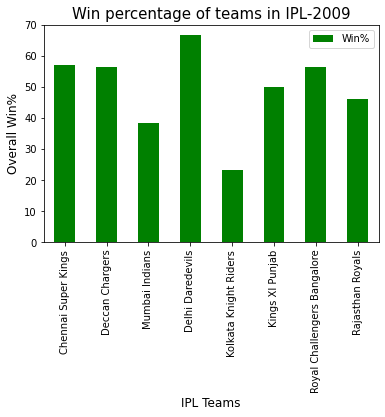

In [ ]:
# Plotting the win percentage of the teams in the season IPL-2009

ax = ipl_2009_stats.plot(x="Team", y="Win%", kind="bar",color='green')
# Set the title
ax.set_title("Win percentage of teams in IPL-2009", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Overall Win%", fontsize = 12)


From the above plot we can see that the Delhi daredevils have a Win% of around 66% ,followed by 57% of Chennai Super Kings.

Lets see how much does the toss affects the outcome of the match.

Text(0, 0.5, 'Win%')

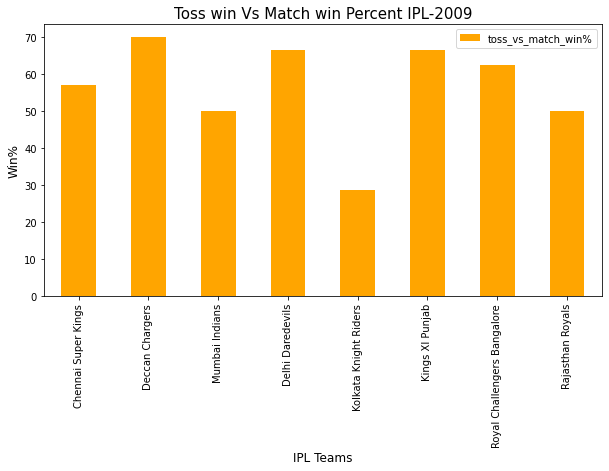

In [ ]:
# Plotting the Toss win Vs Match win Percent in IPL-2009

ax = ipl_2009_stats.plot(x="Team", y="toss_vs_match_win%", kind="bar",color='orange',figsize = (10,5))
# Set the title
ax.set_title("Toss win Vs Match win Percent IPL-2009", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Win%", fontsize = 12)

By analyzing the "Toss win Vs Match win Percent" we have below findings :


*   Deccan Chargers have a winning percentage of around 70% if they win the toss,meaning if they win the toss then their is 70% chance they will win the match also.
*   Out of 8 teams only 1 team have a Toss win Vs Match win Percent less than 50%,which shows that the toss winning team has a higher chance of winning the match as compared to the toss losing team.

In [ ]:
# Finding the winner of the IPL 2018 season
IPL_2009_winner=ipl_2009_df['winner'].iloc[-1]

In [ ]:
print(f'The winner of the IPL-2009 is {IPL_2009_winner}')

The winner of the IPL-2009 is Deccan Chargers


In [ ]:
# Players with most man of the match awards
mom_2009_df=ipl_2009_df['player_of_match'].value_counts()
mom_2009_df.head(1)

YK Pathan    3
Name: player_of_match, dtype: int64

**Batsmen Stats**

In [ ]:
#Here we are using the match id to identify the matches of IPL-2008 season

season_2009_deliveries=deliveries_df_copy[(deliveries_df_copy['match_id']>=118) & (deliveries_df_copy['match_id']<175)]
season_2009_deliveries=season_2009_deliveries.set_index('match_id')
season_2009_deliveries.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
118,1,Mumbai Indians,Chennai Super Kings,1,1,ST Jayasuriya,SR Tendulkar,MS Gony,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
118,1,Mumbai Indians,Chennai Super Kings,1,2,SR Tendulkar,ST Jayasuriya,MS Gony,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
118,1,Mumbai Indians,Chennai Super Kings,1,3,SR Tendulkar,ST Jayasuriya,MS Gony,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
118,1,Mumbai Indians,Chennai Super Kings,1,4,SR Tendulkar,ST Jayasuriya,MS Gony,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
118,1,Mumbai Indians,Chennai Super Kings,1,5,ST Jayasuriya,SR Tendulkar,MS Gony,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
# Finding the top batsmen by summing up their score for the entire season
batsmen_stats_2009=season_2009_deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
batsmen_stats_2009=batsmen_stats_2009.sort_values('batsman_runs',ascending=False)

In [ ]:
# Finding Batsmen with most runs in the season
batsmen_stats_2009[:10]

,batsman,batsman_runs
75,ML Hayden,572
12,AC Gilchrist,495
11,AB de Villiers,465
118,SK Raina,434
134,TM Dilshan,418
50,JP Duminy,372
41,HH Gibbs,371
23,BJ Hodge,365
125,SR Tendulkar,364
100,RG Sharma,362


Text(0, 0.5, 'Runs Scored')

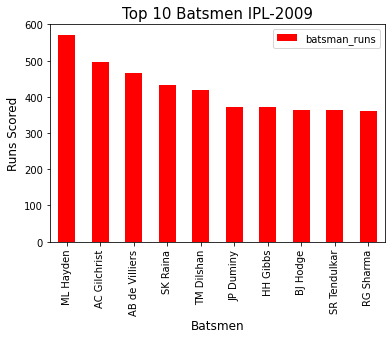

In [ ]:
# Plotting the bar graph for Top 10 Batsmen IPL-2009 in the whole season

ax = batsmen_stats_2009[:10].plot(x="batsman", y="batsman_runs", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Batsmen IPL-2009", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Batsmen', fontsize = 12)
ax.set_ylabel("Runs Scored", fontsize = 12)

In [ ]:
# Top 5 Batsmen for the season IPL-2009
batsmen_stats_2009=batsmen_stats_2009.reset_index()
batsmen_stats_2009.head()

,index,batsman,batsman_runs
0,75,ML Hayden,572
1,12,AC Gilchrist,495
2,11,AB de Villiers,465
3,118,SK Raina,434
4,134,TM Dilshan,418


In [ ]:
# Runs scored by the top 5 overall batsmen in IPL-2009
top_5_overall_batsmen_runs_2009_df=top_5_batsman_overall(batsmen_stats_2009)
top_5_overall_batsmen_runs_2009_df

,Names,Runs
0,V Kohli,246
1,SK Raina,434
2,RG Sharma,362
3,DA Warner,163
4,S Dhawan,40


**Bowler Stats**

In [ ]:
# Finding Bowler with most wickets in the season
bowler_stats_2009=wicket_taking_bowler_df(season_2009_deliveries['dismissal_kind'],season_2009_deliveries)
bowler_stats_2009[:10]

,Bowler,Wickets
0,RP Singh,23
1,A Kumble,21
2,A Nehra,19
3,PP Ojha,18
4,SL Malinga,18
5,IK Pathan,17
6,MM Patel,16
7,PJ Sangwan,15
8,DP Nannes,15
9,A Mishra,14


Text(0, 0.5, 'Wickets')

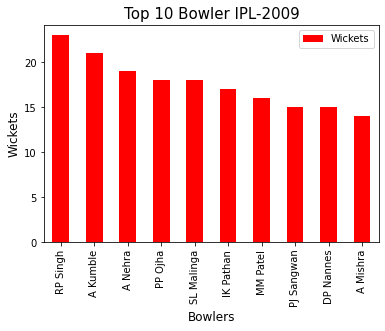

In [ ]:
# Plotting the bar graph for Top 10 Bowler IPL-2009 in the whole season

ax = bowler_stats_2009[:10].plot(x="Bowler", y="Wickets", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Bowler IPL-2009", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Bowlers', fontsize = 12)
ax.set_ylabel("Wickets", fontsize = 12)

In [ ]:
top_5_overall_bowler_wickets_2009_df=top_5_bowler_overall(bowler_stats_2009)
top_5_overall_bowler_wickets_2009_df

,Names,Wickets
0,SL Malinga,18
1,A Mishra,14
2,Harbhajan Singh,12
3,PP Chawla,12
4,DJ Bravo,11


**IPL Season 2009 Summary**


*   Deccan Chargers won the IPL-2009 title with a win% of around 56%.They also had a Toss_win_Vs_Match_win percentage of 70%,highest among the teams.
*   Toss played a major role in the outcome of the match as 7 teams out of 8 had a winning percentage 50% or more if they won the toss.
*   YK Pathan won the most Man of the match awards-3
*   ML Hayden was the Orange cap holder(highest runs scorer of the season) with 572 runs.
*   RP Singh was the Purple cap holder(highest wicket taking bowler of the season) with 23 wickets.

># IPL SEASON 2010

Inorder to find the IPL-2010 stats, we will fetch the information from the "matches_df_copy" dataframe for only those matches whose Season value "IPL-2010".

In [ ]:
ipl_2010_df=matches_df_copy[matches_df_copy['Season']=='IPL-2010']
ipl_2010_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
174,175,IPL-2010,Mumbai,12-03-2010,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,field,normal,0,Kolkata Knight Riders,11,0,AD Mathews,Dr DY Patil Sports Academy,RE Koertzen,RB Tiffin,NaN
175,176,IPL-2010,Mumbai,13-03-2010,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Mumbai Indians,4,0,YK Pathan,Brabourne Stadium,RE Koertzen,RB Tiffin,NaN
176,177,IPL-2010,Chandigarh,13-03-2010,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,5,G Gambhir,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,S Ravi,NaN
177,178,IPL-2010,Kolkata,14-03-2010,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,MK Tiwary,Eden Gardens,HDPK Dharmasena,AM Saheba,NaN
178,179,IPL-2010,Chennai,14-03-2010,Deccan Chargers,Chennai Super Kings,Deccan Chargers,bat,normal,0,Deccan Chargers,31,0,WPUJC Vaas,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN


In [ ]:
ipl_2010_stats=ipl_season_team_stats(ipl_2010_df['team1'],ipl_2010_df['team2'],ipl_2010_df['toss_winner'],ipl_2010_df['winner'])

In [ ]:
ipl_2010_stats

,Team,matches_played,won,won_toss,toss_win_match_win,Win%,toss_vs_match_win%
0,Mumbai Indians,16,11,9,6,68.750000,66.666667
1,Rajasthan Royals,14,6,6,3,42.857143,50.000000
2,Chennai Super Kings,16,9,10,6,56.250000,60.000000
3,Kolkata Knight Riders,14,7,7,4,50.000000,57.142857
4,Deccan Chargers,16,8,9,5,50.000000,55.555556
5,Delhi Daredevils,14,7,8,5,50.000000,62.500000
6,Royal Challengers Bangalore,16,8,6,2,50.000000,33.333333


Text(0, 0.5, 'Overall Win%')

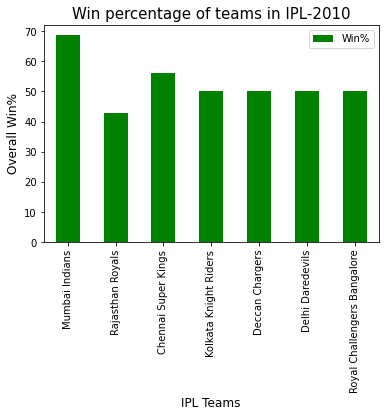

In [ ]:
# Plotting the win percentage of the teams in the season IPL-2010

ax = ipl_2010_stats.plot(x="Team", y="Win%", kind="bar",color='green')
# Set the title
ax.set_title("Win percentage of teams in IPL-2010", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Overall Win%", fontsize = 12)


From the above plot we can see that the Mumbai Indians have an impressive win% of around 68% which is much high as compared to their competitors.

Lets see how much does the toss affects the outcome of the match.

Text(0, 0.5, 'Win%')

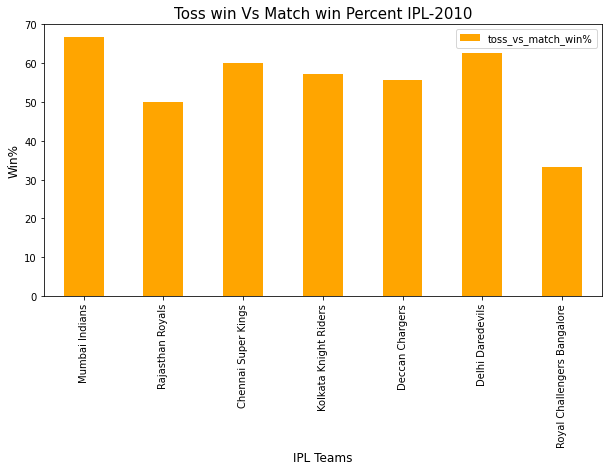

In [ ]:
# Plotting the Toss win Vs Match win Percent in IPL-2010

ax = ipl_2010_stats.plot(x="Team", y="toss_vs_match_win%", kind="bar",color='orange',figsize = (10,5))
# Set the title
ax.set_title("Toss win Vs Match win Percent IPL-2010", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Win%", fontsize = 12)

By analyzing the "Toss win Vs Match win Percent" we have below findings :

Mumbai Indians have the hishest winning percentage of around 66% if they win the toss,meaning if they win the toss then their is 66% chance they will win the match also.
Out of 7 teams only 1 team have a Toss win Vs Match win Percent less than 50%,which shows that the toss winning team has a higher chance of winning the match as compared to the toss losing team.

In [ ]:
# Finding the winner of the IPL 2010 season
IPL_2010_winner=ipl_2010_df['winner'].iloc[-1]

In [ ]:
print(f'The winner of the IPL-2010 is {IPL_2010_winner}')

The winner of the IPL-2010 is Chennai Super Kings


In [ ]:
# Players with most man of the match awards
mom_2010_df=ipl_2010_df['player_of_match'].value_counts()
mom_2010_df.head(1)

SR Tendulkar    4
Name: player_of_match, dtype: int64

**Batsmen Stats**

In [ ]:
#Here we are using the match id to identify the matches of IPL-2010 season

season_2010_deliveries=deliveries_df_copy[(deliveries_df_copy['match_id']>=175) & (deliveries_df_copy['match_id']<235)]
season_2010_deliveries=season_2010_deliveries.set_index('match_id')
season_2010_deliveries.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
175,1,Kolkata Knight Riders,Deccan Chargers,1,1,MK Tiwary,BJ Hodge,WPUJC Vaas,0,0,0,0,0,0,0,0,0,MK Tiwary,caught,RG Sharma
175,1,Kolkata Knight Riders,Deccan Chargers,1,2,SC Ganguly,BJ Hodge,WPUJC Vaas,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
175,1,Kolkata Knight Riders,Deccan Chargers,1,3,SC Ganguly,BJ Hodge,WPUJC Vaas,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
175,1,Kolkata Knight Riders,Deccan Chargers,1,4,SC Ganguly,BJ Hodge,WPUJC Vaas,0,0,0,0,0,0,0,0,0,SC Ganguly,caught,Anirudh Singh
175,1,Kolkata Knight Riders,Deccan Chargers,1,5,CA Pujara,BJ Hodge,WPUJC Vaas,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN


In [ ]:
# Finding the top batsmen by summing up their score for the entire season
batsmen_stats_2010=season_2010_deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
batsmen_stats_2010=batsmen_stats_2010.sort_values('batsman_runs',ascending=False)

In [ ]:
# Finding Batsmen with most runs in the season
batsmen_stats_2010[:10]

,batsman,batsman_runs
142,SR Tendulkar,618
61,JH Kallis,572
137,SK Raina,528
133,SC Ganguly,493
82,M Vijay,458
44,DPMD Jayawardene,445
4,A Symonds,429
144,SS Tiwary,419
116,RG Sharma,404
98,NV Ojha,377


Text(0, 0.5, 'Runs Scored')

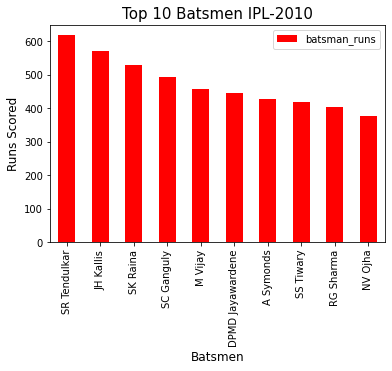

In [ ]:
# Plotting the bar graph for Top 10 Batsmen IPL-2010 in the whole season

ax = batsmen_stats_2010[:10].plot(x="batsman", y="batsman_runs", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Batsmen IPL-2010", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Batsmen', fontsize = 12)
ax.set_ylabel("Runs Scored", fontsize = 12)

In [ ]:
# Top 5 Batsmen for the season IPL-2010
batsmen_stats_2010=batsmen_stats_2010.reset_index()
batsmen_stats_2010.head()

,index,batsman,batsman_runs
0,142,SR Tendulkar,618
1,61,JH Kallis,572
2,137,SK Raina,528
3,133,SC Ganguly,493
4,82,M Vijay,458


In [ ]:
# Runs scored by the top 5 overall batsmen in IPL-2010
top_5_overall_batsmen_runs_2010_df=top_5_batsman_overall(batsmen_stats_2010)
top_5_overall_batsmen_runs_2010_df

,Names,Runs
0,V Kohli,307
1,SK Raina,528
2,RG Sharma,404
3,DA Warner,282
4,S Dhawan,191


**Bowler Stats**

In [ ]:
# Finding Bowler with most wickets in the IPL-2010
bowler_stats_2010=wicket_taking_bowler_df(season_2010_deliveries['dismissal_kind'],season_2010_deliveries)
bowler_stats_2010[:10]

,Bowler,Wickets
0,PP Ojha,21
1,A Kumble,17
2,Harbhajan Singh,17
3,A Mishra,17
4,R Vinay Kumar,16
5,M Muralitharan,16
6,DW Steyn,15
7,SL Malinga,15
8,KA Pollard,15
9,Z Khan,15


Text(0, 0.5, 'Wickets')

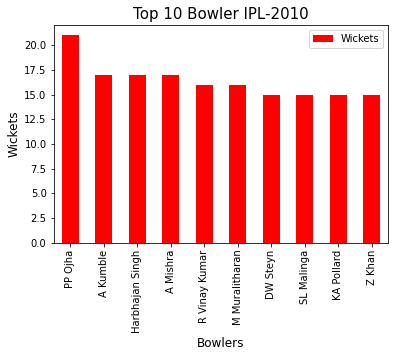

In [ ]:
# Plotting the bar graph for Top 10 Bowler IPL-2010 in the whole season

ax = bowler_stats_2010[:10].plot(x="Bowler", y="Wickets", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Bowler IPL-2010", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Bowlers', fontsize = 12)
ax.set_ylabel("Wickets", fontsize = 12)

In [ ]:
top_5_overall_bowler_wickets_2010_df=top_5_bowler_overall(bowler_stats_2010)
top_5_overall_bowler_wickets_2010_df

,Names,Wickets
0,SL Malinga,15
1,A Mishra,17
2,Harbhajan Singh,17
3,PP Chawla,12
4,DJ Bravo,4


**IPL Season 2010 Summary**

*   Chennai Super Kings won the IPL-2010 title with a win% of around 56%.They also had the Toss_win_Vs_Match_win percentage of 60%,second highest among the teams.
*   Toss played a major role in the outcome of the match as 6 teams out of 7 had a winning percentage 50% or more if they win the toss.
*   SR Tendulkar won the most Man of the match awards-4.
*   SR Tendulkar was the Orange cap holder(highest runs scorer of the season) with 618 runs.
*   PP Ojha was the Purple cap holder(highest wicket taking bowler of the season) with 21 wickets.


># IPL SEASON 2011

Inorder to find the IPL-2011 stats, we will fetch the information from the "matches_df_copy" dataframe for only those matches whose Season value "IPL-2011".

In [ ]:
ipl_2011_df=matches_df_copy[matches_df_copy['Season']=='IPL-2011']
ipl_2011_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
234,235,IPL-2011,Chennai,08-04-2011,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Chennai Super Kings,2,0,S Anirudha,"MA Chidambaram Stadium, Chepauk",BR Doctrove,PR Reiffel,NaN
235,236,IPL-2011,Hyderabad,09-04-2011,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,8,SK Trivedi,"Rajiv Gandhi International Stadium, Uppal",RE Koertzen,SK Tarapore,NaN
236,237,IPL-2011,Kochi,09-04-2011,Kochi Tuskers Kerala,Royal Challengers Bangalore,Kochi Tuskers Kerala,bat,normal,0,Royal Challengers Bangalore,0,6,AB de Villiers,Nehru Stadium,HDPK Dharmasena,K Hariharan,NaN
237,238,IPL-2011,Delhi,10-04-2011,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,bat,normal,0,Mumbai Indians,0,8,SL Malinga,Feroz Shah Kotla,AM Saheba,RB Tiffin,NaN
238,239,IPL-2011,Mumbai,10-04-2011,Kings XI Punjab,Pune Warriors,Kings XI Punjab,bat,normal,0,Pune Warriors,0,7,SB Wagh,Dr DY Patil Sports Academy,BR Doctrove,PR Reiffel,NaN


In [ ]:
ipl_2011_stats=ipl_season_team_stats(ipl_2011_df['team1'],ipl_2011_df['team2'],ipl_2011_df['toss_winner'],ipl_2011_df['winner'])

In [ ]:
ipl_2011_stats

,Team,matches_played,won,won_toss,toss_win_match_win,Win%,toss_vs_match_win%
0,Chennai Super Kings,16,11,9,7,68.750000,77.777778
1,Deccan Chargers,14,6,6,3,42.857143,50.000000
2,Mumbai Indians,16,10,6,3,62.500000,50.000000
3,Kings XI Punjab,14,7,10,4,50.000000,40.000000
4,Kochi Tuskers Kerala,14,6,8,4,42.857143,50.000000
5,Delhi Daredevils,14,4,9,3,28.571429,33.333333
6,Kolkata Knight Riders,15,8,7,5,53.333333,71.428571
7,Royal Challengers Bangalore,16,10,6,5,62.500000,83.333333
8,Rajasthan Royals,13,6,7,4,46.153846,57.142857


Text(0, 0.5, 'Overall Win%')

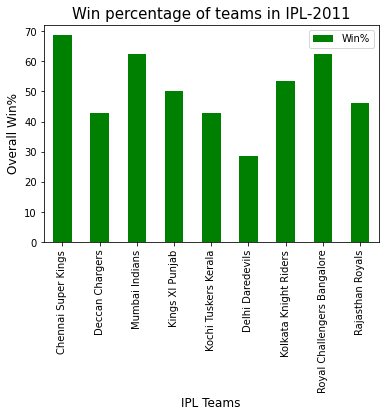

In [ ]:
# Plotting the win percentage of the teams in the IPL-2011

ax = ipl_2011_stats.plot(x="Team", y="Win%", kind="bar",color='green')
# Set the title
ax.set_title("Win percentage of teams in IPL-2011", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Overall Win%", fontsize = 12)


From the above plot we can see that the Chennai Super kings have an impressive win% of around 68% which is high as compared to their competitors.

Lets see how much does the toss affects the outcome of the match.

Text(0, 0.5, 'Win%')

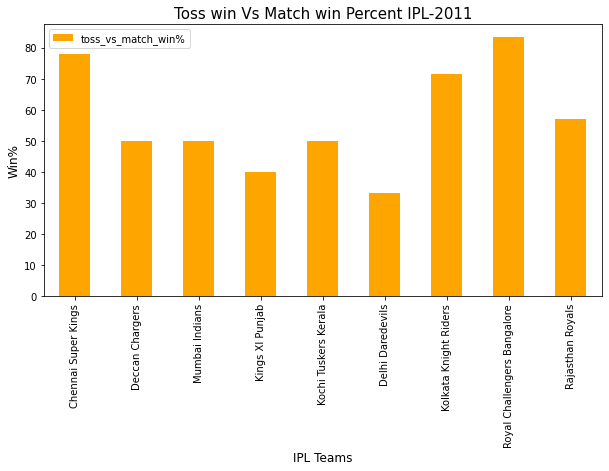

In [ ]:
# Plotting the Toss win Vs Match win Percent in IPL-2011

ax = ipl_2011_stats.plot(x="Team", y="toss_vs_match_win%", kind="bar",color='orange',figsize = (10,5))
# Set the title
ax.set_title("Toss win Vs Match win Percent IPL-2011", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Win%", fontsize = 12)

By analyzing the "Toss win Vs Match win Percent" we have below findings :

Royal Chalenger Banglore have the hishest winning percentage of around 83% if they win the toss,meaning if they win the toss then their is 83% chance they will win the match also.
Out of 9 teams only 2 teams have a Toss win Vs Match win Percent less than 50%,which shows that the toss winning team has a higher chance of winning the match as compared to the toss losing team.

In [ ]:
# Finding the winner of the IPL 2011 season
IPL_2011_winner=ipl_2011_df['winner'].iloc[-1]

In [ ]:
print(f'The winner of the IPL-2011 is {IPL_2011_winner}')

The winner of the IPL-2011 is Chennai Super Kings


In [ ]:
# Players with most man of the match awards
mom_2011_df=ipl_2011_df['player_of_match'].value_counts()
mom_2011_df.head(1)

CH Gayle    6
Name: player_of_match, dtype: int64

**Batsmen Stats**

In [ ]:
#Here we are using the match id to identify the matches of IPL-2011 season

season_2011_deliveries=deliveries_df_copy[(deliveries_df_copy['match_id']>=235) & (deliveries_df_copy['match_id']<308)]
season_2011_deliveries=season_2011_deliveries.set_index('match_id')
season_2011_deliveries.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
235,1,Chennai Super Kings,Kolkata Knight Riders,1,1,S Anirudha,M Vijay,Iqbal Abdulla,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
235,1,Chennai Super Kings,Kolkata Knight Riders,1,2,S Anirudha,M Vijay,Iqbal Abdulla,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
235,1,Chennai Super Kings,Kolkata Knight Riders,1,3,M Vijay,S Anirudha,Iqbal Abdulla,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
235,1,Chennai Super Kings,Kolkata Knight Riders,1,4,M Vijay,S Anirudha,Iqbal Abdulla,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
235,1,Chennai Super Kings,Kolkata Knight Riders,1,5,M Vijay,S Anirudha,Iqbal Abdulla,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [ ]:
# Finding the top batsmen by summing up their score for the entire season
batsmen_stats_2011=season_2011_deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
batsmen_stats_2011=batsmen_stats_2011.sort_values('batsman_runs',ascending=False)

In [ ]:
# Finding Batsmen with most runs in the season
batsmen_stats_2011[:10]

,batsman,batsman_runs
34,CH Gayle,608
168,V Kohli,557
155,SR Tendulkar,553
148,SE Marsh,504
92,MEK Hussey,492
113,PC Valthaty,463
150,SK Raina,438
89,M Vijay,434
169,V Sehwag,424
68,JH Kallis,424


Text(0, 0.5, 'Runs Scored')

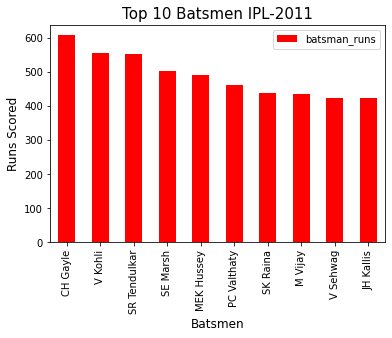

In [ ]:
# Plotting the bar graph for Top 10 Batsmen IPL-2011 in the whole season

ax = batsmen_stats_2011[:10].plot(x="batsman", y="batsman_runs", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Batsmen IPL-2011", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Batsmen', fontsize = 12)
ax.set_ylabel("Runs Scored", fontsize = 12)

In [ ]:
# Top 5 Batsmen for the season IPL-2011
batsmen_stats_2011=batsmen_stats_2011.reset_index()
batsmen_stats_2011.head()

,index,batsman,batsman_runs
0,34,CH Gayle,608
1,168,V Kohli,557
2,155,SR Tendulkar,553
3,148,SE Marsh,504
4,92,MEK Hussey,492


In [ ]:
# Runs scored by the top 5 overall batsmen in IPL-2011
top_5_overall_batsmen_runs_2011_df=top_5_batsman_overall(batsmen_stats_2011)
top_5_overall_batsmen_runs_2011_df

,Names,Runs
0,V Kohli,557
1,SK Raina,438
2,RG Sharma,372
3,DA Warner,324
4,S Dhawan,400


**Bowler Stats**

In [ ]:
# Finding Bowler with most wickets in the season
bowler_stats_2011=wicket_taking_bowler_df(season_2011_deliveries['dismissal_kind'],season_2011_deliveries)
bowler_stats_2011[:10]

,Bowler,Wickets
0,SL Malinga,28
1,MM Patel,22
2,S Aravind,21
3,R Ashwin,20
4,A Mishra,19
5,DE Bollinger,17
6,R Sharma,16
7,RJ Harris,16
8,PP Chawla,16
9,Iqbal Abdulla,16


Text(0, 0.5, 'Wickets')

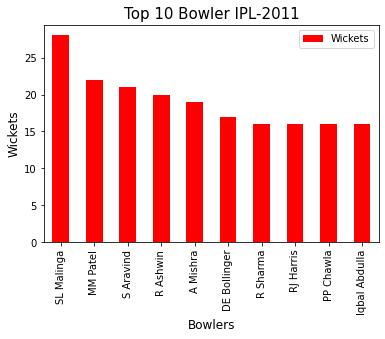

In [ ]:
# Plotting the bar graph for Top 10 Bowler IPL-2011 in the whole season

ax = bowler_stats_2011[:10].plot(x="Bowler", y="Wickets", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Bowler IPL-2011", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Bowlers', fontsize = 12)
ax.set_ylabel("Wickets", fontsize = 12)

In [ ]:
top_5_overall_bowler_wickets_2011_df=top_5_bowler_overall(bowler_stats_2011)
top_5_overall_bowler_wickets_2011_df

,Names,Wickets
0,SL Malinga,28
1,A Mishra,19
2,Harbhajan Singh,14
3,PP Chawla,16
4,DJ Bravo,6


**IPL Season 2011 Summary**

*   Chennai Super Kings won the IPL-2011 title with a win% of around 68.75%.They also had an impressive Toss_win_Vs_Match_win percentage of 77.77%,second highest among the teams.
*   Toss played a major role in the outcome of the match as 7 teams out of 9 had a winning percentage 50% or more if they won the toss.
*   CH Gayle won the most Man of the match awards-6.
*   CH Gayle was the Orange cap holder(highest runs scorer of the season) with 608 runs.
*   SL Malinga was the Purple cap holder(highest wicket taking bowler of the season) with 28 wickets,6 more than the second highest wicket taker MM Patel.

># IPL SEASON 2012

Inorder to find the IPL-2012 stats, we will fetch the information from the "matches_df_copy" dataframe for only those matches whose Season value "IPL-2012".

In [ ]:
ipl_2012_df=matches_df_copy[matches_df_copy['Season']=='IPL-2012']
ipl_2012_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
307,308,IPL-2012,Chennai,04-04-2012,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel,NaN
308,309,IPL-2012,Kolkata,05-04-2012,Kolkata Knight Riders,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,8,IK Pathan,Eden Gardens,S Asnani,HDPK Dharmasena,NaN
309,310,IPL-2012,Mumbai,06-04-2012,Pune Warriors,Mumbai Indians,Mumbai Indians,field,normal,0,Pune Warriors,28,0,SPD Smith,Wankhede Stadium,AK Chaudhary,SJA Taufel,NaN
310,311,IPL-2012,Jaipur,06-04-2012,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,31,0,AM Rahane,Sawai Mansingh Stadium,BF Bowden,SK Tarapore,NaN
311,312,IPL-2012,Bangalore,07-04-2012,Royal Challengers Bangalore,Delhi Daredevils,Delhi Daredevils,field,normal,0,Royal Challengers Bangalore,20,0,AB de Villiers,M Chinnaswamy Stadium,S Asnani,S Ravi,NaN


In [ ]:
ipl_2012_stats=ipl_season_team_stats(ipl_2012_df['team1'],ipl_2012_df['team2'],ipl_2012_df['toss_winner'],ipl_2012_df['winner'])

In [ ]:
ipl_2012_stats

,Team,matches_played,won,won_toss,toss_win_match_win,Win%,toss_vs_match_win%
0,Chennai Super Kings,18,10,7,4,55.555556,57.142857
1,Deccan Chargers,15,4,9,2,26.666667,22.222222
2,Rajasthan Royals,16,7,10,3,43.750000,30.000000
3,Kings XI Punjab,16,8,8,4,50.000000,50.000000
4,Kolkata Knight Riders,17,12,7,5,70.588235,71.428571
5,Pune Warriors,16,4,6,1,25.000000,16.666667
6,Royal Challengers Bangalore,15,8,6,3,53.333333,50.000000
7,Mumbai Indians,17,10,11,6,58.823529,54.545455
8,Delhi Daredevils,18,11,10,5,61.111111,50.000000


Text(0, 0.5, 'Overall Win%')

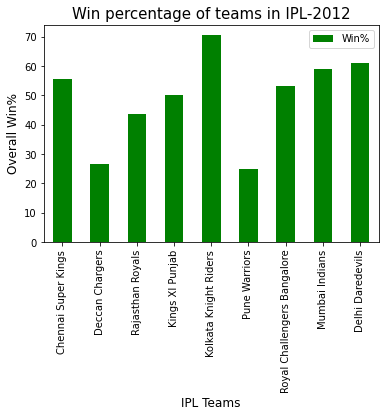

In [ ]:
# Plotting the win percentage of the teams in IPL-2012

ax = ipl_2012_stats.plot(x="Team", y="Win%", kind="bar",color='green')
# Set the title
ax.set_title("Win percentage of teams in IPL-2012", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Overall Win%", fontsize = 12)


From the above plot we can see that the Kolkata Knight Riders have an impressive win% of around 70% which is quite high as compared to their competitors.

Lets see how much does the toss affects the outcome of the match.

Text(0, 0.5, 'Win%')

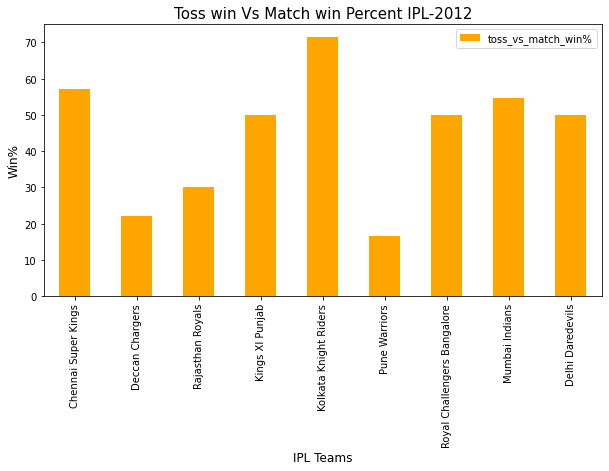

In [ ]:
# Plotting the Toss win Vs Match win Percent in IPL-2012

ax = ipl_2012_stats.plot(x="Team", y="toss_vs_match_win%", kind="bar",color='orange',figsize = (10,5))
# Set the title
ax.set_title("Toss win Vs Match win Percent IPL-2012", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Win%", fontsize = 12)

By analyzing the "Toss win Vs Match win Percent" we have below findings :

Kolkata Knight Riders have the highest winning percentage of around 71% if they win the toss,meaning if they win the toss then their is 71% chance they will win the match also.
Out of 9 teams only 3 teams have a Toss win Vs Match win Percent less than 50%,which shows that the toss winning team has a higher chance of winning the match as compared to the toss losing team.

In [ ]:
# Finding the winner of the IPL 2012 season
IPL_2012_winner=ipl_2012_df['winner'].iloc[-1]

In [ ]:
print(f'The winner of the IPL-2012 is {IPL_2012_winner}')

The winner of the IPL-2012 is Kolkata Knight Riders


In [ ]:
# Players with most man of the match awards
mom_2012_df=ipl_2012_df['player_of_match'].value_counts()
mom_2012_df.head(1)

CH Gayle    5
Name: player_of_match, dtype: int64

**Batsmen Stats**

In [ ]:
#Here we are using the match id to identify the matches of IPL-2012 season

season_2012_deliveries=deliveries_df_copy[(deliveries_df_copy['match_id']>=308) & (deliveries_df_copy['match_id']<382)]
season_2012_deliveries=season_2012_deliveries.set_index('match_id')
season_2012_deliveries.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
308,1,Chennai Super Kings,Mumbai Indians,1,1,F du Plessis,M Vijay,SL Malinga,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN
308,1,Chennai Super Kings,Mumbai Indians,1,2,F du Plessis,M Vijay,SL Malinga,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
308,1,Chennai Super Kings,Mumbai Indians,1,3,F du Plessis,M Vijay,SL Malinga,0,0,0,0,0,0,3,0,3,NaN,NaN,NaN
308,1,Chennai Super Kings,Mumbai Indians,1,4,M Vijay,F du Plessis,SL Malinga,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
308,1,Chennai Super Kings,Mumbai Indians,1,5,M Vijay,F du Plessis,SL Malinga,0,0,0,0,0,0,0,0,0,F du Plessis,run out,AT Rayudu


In [ ]:
# Finding the top batsmen by summing up their score for the entire season
batsmen_stats_2012=season_2012_deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
batsmen_stats_2012=batsmen_stats_2012.sort_values('batsman_runs',ascending=False)

In [ ]:
# Finding Batsmen with most runs in the season
batsmen_stats_2012[:10]

,batsman,batsman_runs
36,CH Gayle,733
58,G Gambhir,590
137,S Dhawan,569
20,AM Rahane,560
162,V Sehwag,495
39,CL White,479
122,R Dravid,462
144,SK Raina,441
127,RG Sharma,433
105,Mandeep Singh,432


Text(0, 0.5, 'Runs Scored')

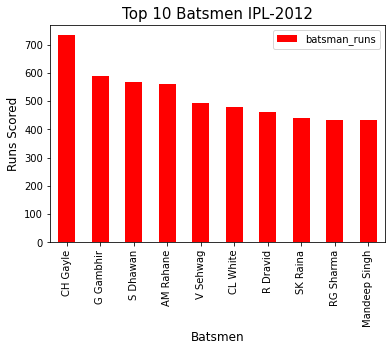

In [ ]:
# Plotting the bar graph for Top 10 Batsmen IPL-2012 in the whole season

ax = batsmen_stats_2012[:10].plot(x="batsman", y="batsman_runs", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Batsmen IPL-2012", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Batsmen', fontsize = 12)
ax.set_ylabel("Runs Scored", fontsize = 12)

In [ ]:
# Top 5 Batsmen for the season IPL-2012
batsmen_stats_2012=batsmen_stats_2012.reset_index()
batsmen_stats_2012.head()

,index,batsman,batsman_runs
0,36,CH Gayle,733
1,58,G Gambhir,590
2,137,S Dhawan,569
3,20,AM Rahane,560
4,162,V Sehwag,495


In [ ]:
# Runs scored by the top 5 overall batsmen in IPL-2012
top_5_overall_batsmen_runs_2012_df=top_5_batsman_overall(batsmen_stats_2012)
top_5_overall_batsmen_runs_2012_df

,Names,Runs
0,V Kohli,364
1,SK Raina,441
2,RG Sharma,433
3,DA Warner,256
4,S Dhawan,569


**Bowler Stats**

In [ ]:
# Finding Bowler with most wickets in the season
bowler_stats_2012=wicket_taking_bowler_df(season_2012_deliveries['dismissal_kind'],season_2012_deliveries)
bowler_stats_2012[:10]

,Bowler,Wickets
0,M Morkel,25
1,SP Narine,24
2,SL Malinga,22
3,R Vinay Kumar,19
4,UT Yadav,19
5,DW Steyn,18
6,P Awana,17
7,Z Khan,17
8,KA Pollard,16
9,PP Chawla,16


Text(0, 0.5, 'Wickets')

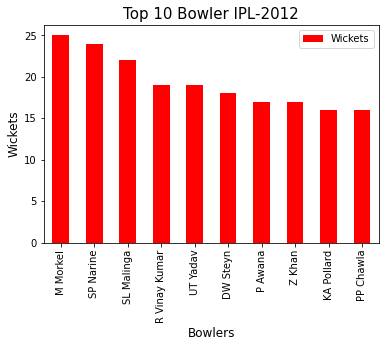

In [ ]:
# Plotting the bar graph for Top 10 Bowler IPL-2012 in the whole season

ax = bowler_stats_2012[:10].plot(x="Bowler", y="Wickets", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Bowler IPL-2012", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Bowlers', fontsize = 12)
ax.set_ylabel("Wickets", fontsize = 12)

In [ ]:
top_5_overall_bowler_wickets_2012_df=top_5_bowler_overall(bowler_stats_2012)
top_5_overall_bowler_wickets_2012_df

,Names,Wickets
0,SL Malinga,22
1,A Mishra,13
2,Harbhajan Singh,6
3,PP Chawla,16
4,DJ Bravo,15


**IPL Season 2012 Summary**

*   Kolkata Knight Riders won the IPL-2012 title with a win% of around 70%.They also had an impressive Toss_win_Vs_Match_win percentage of 71%,highest among the teams.
*   Toss played a major role in the outcome of the match as 6 teams out of 9 had a winning percentage 50% or more if they won the toss.
*   CH Gayle won the most Man of the match awards-5.
*   CH Gayle was the Orange cap holder(highest runs scorer of the season) with 733 runs.
*   M Morkel was the Purple cap holder(highest wicket taking bowler of the season) with 25 wickets.

># IPL SEASON 2013

Inorder to find the IPL-2013 stats, we will fetch the information from the "matches_df_copy" dataframe for only those matches whose Season value "IPL-2013".

In [ ]:
ipl_2013_df=matches_df_copy[matches_df_copy['Season']=='IPL-2013']
ipl_2013_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
381,382,IPL-2013,Kolkata,03-04-2013,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,Eden Gardens,S Ravi,SJA Taufel,NaN
382,383,IPL-2013,Bangalore,04-04-2013,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,2,0,CH Gayle,M Chinnaswamy Stadium,VA Kulkarni,C Shamshuddin,NaN
383,384,IPL-2013,Hyderabad,05-04-2013,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,field,normal,0,Sunrisers Hyderabad,22,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal",S Ravi,SJA Taufel,NaN
384,385,IPL-2013,Delhi,06-04-2013,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Rajasthan Royals,5,0,R Dravid,Feroz Shah Kotla,S Das,C Shamshuddin,NaN
385,386,IPL-2013,Chennai,06-04-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,KA Pollard,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,453,IPL-2013,Hyderabad,19-05-2013,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,bat,normal,0,Sunrisers Hyderabad,0,5,PA Patel,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani,NaN
453,454,IPL-2013,Delhi,21-05-2013,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,48,0,MEK Hussey,Feroz Shah Kotla,NJ Llong,RJ Tucker,NaN
454,455,IPL-2013,Delhi,22-05-2013,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,4,BJ Hodge,Feroz Shah Kotla,S Ravi,RJ Tucker,NaN
455,456,IPL-2013,Kolkata,24-05-2013,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,4,Harbhajan Singh,Eden Gardens,C Shamshuddin,SJA Taufel,NaN


In [ ]:
ipl_2013_stats=ipl_season_team_stats(ipl_2013_df['team1'],ipl_2013_df['team2'],ipl_2013_df['toss_winner'],ipl_2013_df['winner'])

In [ ]:
ipl_2013_stats

,Team,matches_played,won,won_toss,toss_win_match_win,Win%,toss_vs_match_win%
0,Mumbai Indians,19,13,12,8,68.421053,66.666667
1,Royal Challengers Bangalore,16,9,5,4,56.250000,80.000000
2,Sunrisers Hyderabad,17,10,7,1,58.823529,14.285714
3,Kings XI Punjab,16,8,7,4,50.000000,57.142857
4,Chennai Super Kings,18,12,8,7,66.666667,87.500000
5,Rajasthan Royals,18,11,11,6,61.111111,54.545455
6,Pune Warriors,16,4,9,2,25.000000,22.222222
7,Kolkata Knight Riders,16,6,12,4,37.500000,33.333333


Text(0, 0.5, 'Overall Win%')

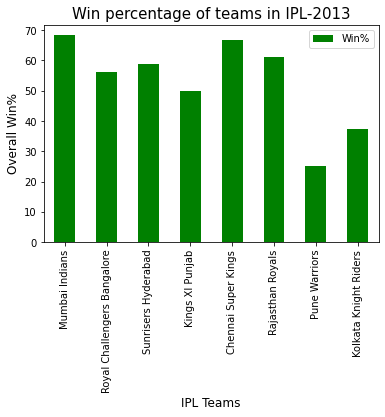

In [ ]:
# Plotting the win percentage of the teams in the whole season

ax = ipl_2013_stats.plot(x="Team", y="Win%", kind="bar",color='green')
# Set the title
ax.set_title("Win percentage of teams in IPL-2013", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Overall Win%", fontsize = 12)


From the above plot we can see that the Mumbai Indians have the highest win% of around 68%.

Lets see how much does the toss affects the outcome of the match.

Text(0, 0.5, 'Win%')

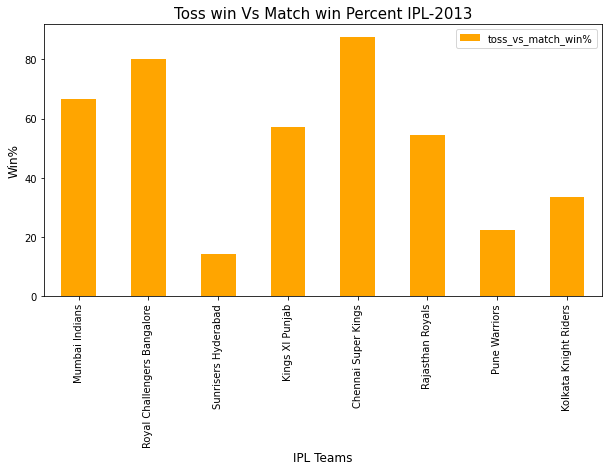

In [ ]:
# Plotting the Toss win Vs Match win Percent

ax = ipl_2013_stats.plot(x="Team", y="toss_vs_match_win%", kind="bar",color='orange',figsize = (10,5))
# Set the title
ax.set_title("Toss win Vs Match win Percent IPL-2013", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Win%", fontsize = 12)

By analyzing the "Toss win Vs Match win Percent" we have below findings :

Chennai Super Kings have the highest winning percentage of around 87% if they win the toss,meaning if they win the toss then their is 87% chance they will win the match also.
Out of 8 teams only 3 teams have a Toss win Vs Match win Percent less than 55%,which shows that the toss winning team has a higher chance of winning the match as compared to the toss losing team.

In [ ]:
# Finding the winner of the IPL 2013 season
IPL_2013_winner=ipl_2013_df['winner'].iloc[-1]

In [ ]:
print(f'The winner of the IPL-2013 is {IPL_2013_winner}')

The winner of the IPL-2013 is Mumbai Indians


In [ ]:
# Players with most man of the match awards
mom_2013_df=ipl_2013_df['player_of_match'].value_counts()
mom_2013_df.head(1)

MEK Hussey    5
Name: player_of_match, dtype: int64

**Batsmen Stats**

In [ ]:
#Here we are using the match id to identify the matches of IPL-2013 season

season_2013_deliveries=deliveries_df_copy[(deliveries_df_copy['match_id']>=382) & (deliveries_df_copy['match_id']<457)]
season_2013_deliveries=season_2013_deliveries.set_index('match_id')
season_2013_deliveries.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
382,1,Delhi Daredevils,Kolkata Knight Riders,1,1,UBT Chand,DA Warner,B Lee,0,0,0,0,0,0,0,0,0,UBT Chand,bowled,NaN
382,1,Delhi Daredevils,Kolkata Knight Riders,1,2,DPMD Jayawardene,DA Warner,B Lee,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
382,1,Delhi Daredevils,Kolkata Knight Riders,1,3,DPMD Jayawardene,DA Warner,B Lee,0,0,1,0,0,0,0,1,1,NaN,NaN,NaN
382,1,Delhi Daredevils,Kolkata Knight Riders,1,4,DA Warner,DPMD Jayawardene,B Lee,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
382,1,Delhi Daredevils,Kolkata Knight Riders,1,5,DA Warner,DPMD Jayawardene,B Lee,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
# Finding the top batsmen by summing up their score for the entire season
batsmen_stats_2013=season_2013_deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
batsmen_stats_2013=batsmen_stats_2013.sort_values('batsman_runs',ascending=False)

In [ ]:
# Finding Batsmen with most runs in the season
batsmen_stats_2013[:10]

,batsman,batsman_runs
92,MEK Hussey,732
34,CH Gayle,720
165,V Kohli,639
146,SK Raina,548
153,SR Watson,543
132,RG Sharma,536
70,KD Karthik,489
18,AM Rahane,488
123,R Dravid,471
15,AJ Finch,456


Text(0, 0.5, 'Runs Scored')

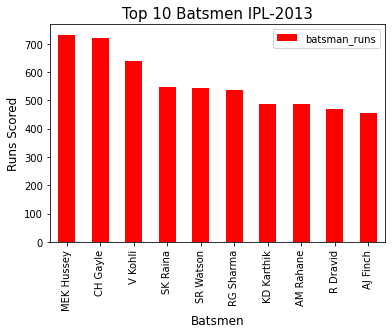

In [ ]:
# Plotting the bar graph for Top 10 Batsmen IPL-2013 in the whole season

ax = batsmen_stats_2013[:10].plot(x="batsman", y="batsman_runs", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Batsmen IPL-2013", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Batsmen', fontsize = 12)
ax.set_ylabel("Runs Scored", fontsize = 12)

In [ ]:
# Top 5 Batsmen for the season IPL-2013
batsmen_stats_2013=batsmen_stats_2013.reset_index()
batsmen_stats_2013.head()

,index,batsman,batsman_runs
0,92,MEK Hussey,732
1,34,CH Gayle,720
2,165,V Kohli,639
3,146,SK Raina,548
4,153,SR Watson,543


In [ ]:
# Runs scored by the top 5 overall batsmen in IPL-2013
top_5_overall_batsmen_runs_2013_df=top_5_batsman_overall(batsmen_stats_2013)
top_5_overall_batsmen_runs_2013_df

,Names,Runs
0,V Kohli,639
1,SK Raina,548
2,RG Sharma,536
3,DA Warner,410
4,S Dhawan,311


**Bowler Stats**

In [ ]:
# Finding Bowler with most wickets in the season
bowler_stats_2013=wicket_taking_bowler_df(season_2013_deliveries['dismissal_kind'],season_2013_deliveries)
bowler_stats_2013[:10]

,Bowler,Wickets
0,JP Faulkner,28
1,DJ Bravo,28
2,R Vinay Kumar,23
3,SP Narine,22
4,MG Johnson,22
5,Harbhajan Singh,22
6,A Mishra,21
7,MM Sharma,19
8,NLTC Perera,19
9,KK Cooper,19


Text(0, 0.5, 'Wickets')

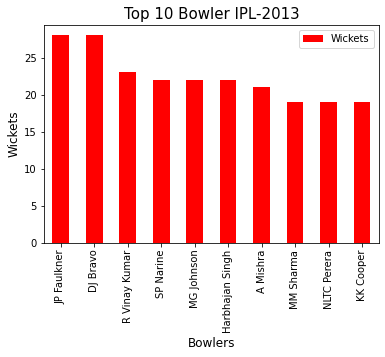

In [ ]:
# Plotting the bar graph for Top 10 Bowler IPL-2013 in the whole season

ax = bowler_stats_2013[:10].plot(x="Bowler", y="Wickets", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Bowler IPL-2013", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Bowlers', fontsize = 12)
ax.set_ylabel("Wickets", fontsize = 12)

In [ ]:
top_5_overall_bowler_wickets_2013_df=top_5_bowler_overall(bowler_stats_2013)
top_5_overall_bowler_wickets_2013_df

,Names,Wickets
0,SL Malinga,18
1,A Mishra,21
2,Harbhajan Singh,22
3,PP Chawla,11
4,DJ Bravo,28


**IPL Season 2013 Summary**

*   Mumbai Indians won the IPL-2013 title with a win% of around 68%.They also had an impressive Toss_win_Vs_Match_win percentage of 66%,third highest among the teams.
*   Toss played a major role in the outcome of the match as 5 teams out of 8 had a winning percentage of more than 55%  if they won the toss.
*   MEK Hussey won the most Man of the match awards-5.
*   MEK Hussey was the Orange cap holder(highest runs scorer of the season) with 732 runs.
*   JP Faulkner and DJ Bravo were the highest wicket takers with 28 wickets each.

># IPL SEASON 2014

Inorder to find the IPL-2014 stats, we will fetch the information from the "matches_df_copy" dataframe for only those matches whose Season value "IPL-2014".

In [ ]:
ipl_2014_df=matches_df_copy[matches_df_copy['Season']=='IPL-2014']
ipl_2014_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
457,458,IPL-2014,Abu Dhabi,16-04-2014,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,41,0,JH Kallis,Sheikh Zayed Stadium,M Erasmus,RK Illingworth,NaN
458,459,IPL-2014,Sharjah,17-04-2014,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,YS Chahal,Sharjah Cricket Stadium,Aleem Dar,S Ravi,NaN
459,460,IPL-2014,Abu Dhabi,18-04-2014,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Sheikh Zayed Stadium,RK Illingworth,C Shamshuddin,NaN
460,461,IPL-2014,Abu Dhabi,18-04-2014,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium,BF Bowden,RK Illingworth,NaN
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN


In [ ]:
ipl_2014_stats=ipl_season_team_stats(ipl_2014_df['team1'],ipl_2014_df['team2'],ipl_2014_df['toss_winner'],ipl_2014_df['winner'])

In [ ]:
ipl_2014_stats

,Team,matches_played,won,won_toss,toss_win_match_win,Win%,toss_vs_match_win%
0,Kings XI Punjab,17,12,7,5,70.588235,71.428571
1,Sunrisers Hyderabad,14,6,7,3,42.857143,42.857143
2,Mumbai Indians,15,7,6,3,46.666667,50.000000
3,Chennai Super Kings,16,10,10,6,62.500000,60.000000
4,Royal Challengers Bangalore,14,5,9,3,35.714286,33.333333
5,Rajasthan Royals,14,7,8,4,50.000000,50.000000
6,Kolkata Knight Riders,16,11,9,6,68.750000,66.666667


Text(0, 0.5, 'Overall Win%')

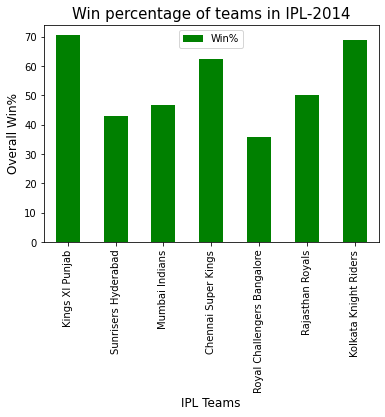

In [ ]:
# Plotting the win percentage of the teams in the whole season

ax = ipl_2014_stats.plot(x="Team", y="Win%", kind="bar",color='green')
# Set the title
ax.set_title("Win percentage of teams in IPL-2014", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Overall Win%", fontsize = 12)


From the above plot we can see that the Kings XI Punjab have an impressive win% of around 70%.

Lets see how much does the toss affects the outcome of the match.

Text(0, 0.5, 'Win%')

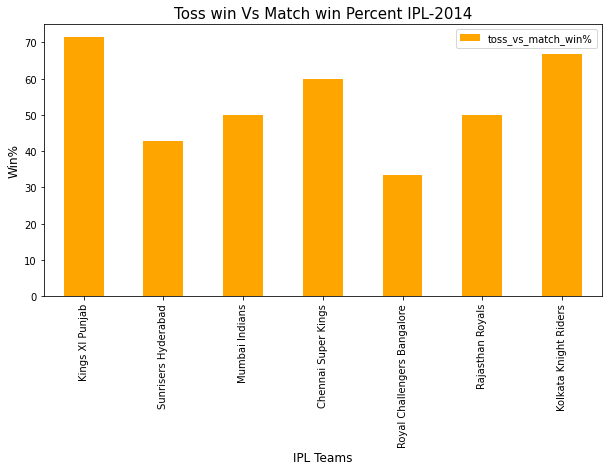

In [ ]:
# Plotting the Toss win Vs Match win Percent in IPL-2014

ax = ipl_2014_stats.plot(x="Team", y="toss_vs_match_win%", kind="bar",color='orange',figsize = (10,5))
# Set the title
ax.set_title("Toss win Vs Match win Percent IPL-2014", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Win%", fontsize = 12)

By analyzing the "Toss win Vs Match win Percent" we have below findings :

Kings XI Punjab have the highest winning percentage of around 71% if they win the toss,meaning if they win the toss then their is 71% chance they will win the match also.
Out of 7 teams only 2 teams have a Toss win Vs Match win Percent less than 50%,which shows that the toss winning team has a higher chance of winning the match as compared to the toss losing team.

In [ ]:
# Finding the winner of the IPL 2014 season
IPL_2014_winner=ipl_2014_df['winner'].iloc[-1]

In [ ]:
print(f'The winner of the IPL-2014 is {IPL_2014_winner}')

The winner of the IPL-2014 is Kolkata Knight Riders


In [ ]:
# Players with most man of the match awards
mom_2014_df=ipl_2014_df['player_of_match'].value_counts()
mom_2014_df.head(1)

GJ Maxwell    4
Name: player_of_match, dtype: int64

**Batsmen Stats**

In [ ]:
#Here we are using the match id to identify the matches of IPL-2014 season

season_2014_deliveries=deliveries_df_copy[(deliveries_df_copy['match_id']>=458) & (deliveries_df_copy['match_id']<518)]
season_2014_deliveries=season_2014_deliveries.set_index('match_id')
season_2014_deliveries.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
458,1,Kolkata Knight Riders,Mumbai Indians,1,1,G Gambhir,JH Kallis,Z Khan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
458,1,Kolkata Knight Riders,Mumbai Indians,1,2,G Gambhir,JH Kallis,Z Khan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
458,1,Kolkata Knight Riders,Mumbai Indians,1,3,G Gambhir,JH Kallis,Z Khan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
458,1,Kolkata Knight Riders,Mumbai Indians,1,4,G Gambhir,JH Kallis,Z Khan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
458,1,Kolkata Knight Riders,Mumbai Indians,1,5,G Gambhir,JH Kallis,Z Khan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
# Finding the top batsmen by summing up their score for the entire season
batsmen_stats_2014=season_2014_deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
batsmen_stats_2014=batsmen_stats_2014.sort_values('batsman_runs',ascending=False)

In [ ]:
# Finding Batsmen with most runs in the season
batsmen_stats_2014[:10]

,batsman,batsman_runs
98,RV Uthappa,660
29,DR Smith,566
35,GJ Maxwell,552
24,DA Warner,528
107,SK Raina,523
121,V Sehwag,455
23,DA Miller,446
46,JP Duminy,410
72,MK Pandey,409
13,BB McCullum,405


Text(0, 0.5, 'Runs Scored')

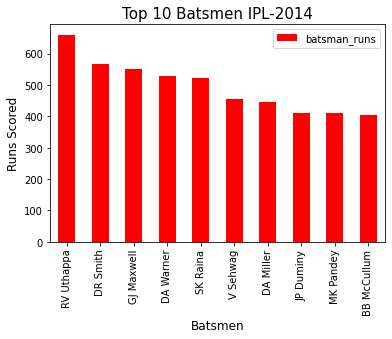

In [ ]:
# Plotting the bar graph for Top 10 Batsmen IPL-2014 in the whole season

ax = batsmen_stats_2014[:10].plot(x="batsman", y="batsman_runs", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Batsmen IPL-2014", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Batsmen', fontsize = 12)
ax.set_ylabel("Runs Scored", fontsize = 12)

In [ ]:
# Top 5 Batsmen for the season IPL-2014
batsmen_stats_2014=batsmen_stats_2014.reset_index()
batsmen_stats_2014.head()

,index,batsman,batsman_runs
0,98,RV Uthappa,660
1,29,DR Smith,566
2,35,GJ Maxwell,552
3,24,DA Warner,528
4,107,SK Raina,523


In [ ]:
# Runs scored by the top 5 overall batsmen in IPL-2014
top_5_overall_batsmen_runs_2014_df=top_5_batsman_overall(batsmen_stats_2014)
top_5_overall_batsmen_runs_2014_df

,Names,Runs
0,V Kohli,359
1,SK Raina,523
2,RG Sharma,390
3,DA Warner,528
4,S Dhawan,377


**Bowler Stats**

In [ ]:
# Finding Bowler with most wickets in the season
bowler_stats_2014=wicket_taking_bowler_df(season_2014_deliveries['dismissal_kind'],season_2014_deliveries)
bowler_stats_2014[:10]

,Bowler,Wickets
0,MM Sharma,23
1,SP Narine,21
2,B Kumar,20
3,RA Jadeja,19
4,Sandeep Sharma,18
5,AR Patel,17
6,MG Johnson,17
7,SL Malinga,16
8,VR Aaron,16
9,R Ashwin,16


Text(0, 0.5, 'Wickets')

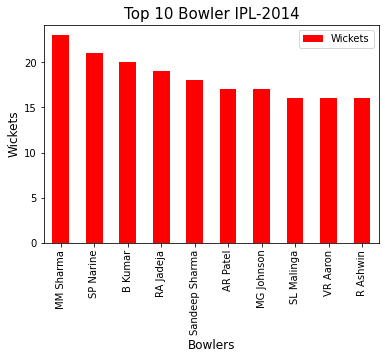

In [ ]:
# Plotting the bar graph for Top 10 Bowler IPL-2014 in the whole season

ax = bowler_stats_2014[:10].plot(x="Bowler", y="Wickets", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Bowler IPL-2014", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Bowlers', fontsize = 12)
ax.set_ylabel("Wickets", fontsize = 12)

In [ ]:
top_5_overall_bowler_wickets_2014_df=top_5_bowler_overall(bowler_stats_2014)
top_5_overall_bowler_wickets_2014_df

,Names,Wickets
0,SL Malinga,16
1,A Mishra,7
2,Harbhajan Singh,14
3,PP Chawla,14


**IPL Season 2014 Summary**

*   Kolkata Knight Riders won the IPL-2014 title with a win% of around 68%.They also had an impressive Toss_win_Vs_Match_win percentage of 66%,second highest among the teams.
*   Toss played a major role in the outcome of the match as 5 teams out of 7 had a winning percentage 50% or more if they won the toss.
*   GJ Maxwell won the most Man of the match awards-4.
*   RV Uthappa was the Orange cap holder(highest runs scorer of the season) with 660 runs.
*   MM Sharma was the Purple cap holder(highest wicket taking bowler of the season) with 23 wickets.

># IPL SEASON 2015

Inorder to find the IPL-2015 stats, we will fetch the information from the "matches_df_copy" dataframe for only those matches whose Season value "IPL-2015".

In [ ]:
ipl_2015_df=matches_df_copy[matches_df_copy['Season']=='IPL-2015']
ipl_2015_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
517,518,IPL-2015,Kolkata,08-04-2015,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,M Morkel,Eden Gardens,S Ravi,C Shamshuddin,NaN
518,519,IPL-2015,Chennai,09-04-2015,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,normal,0,Chennai Super Kings,1,0,A Nehra,"MA Chidambaram Stadium, Chepauk",RK Illingworth,VA Kulkarni,NaN
519,520,IPL-2015,Pune,10-04-2015,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,26,0,JP Faulkner,Maharashtra Cricket Association Stadium,SD Fry,CB Gaffaney,NaN
520,521,IPL-2015,Chennai,11-04-2015,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,normal,0,Chennai Super Kings,45,0,BB McCullum,"MA Chidambaram Stadium, Chepauk",RK Illingworth,VA Kulkarni,NaN
521,522,IPL-2015,Kolkata,11-04-2015,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,3,CH Gayle,Eden Gardens,S Ravi,C Shamshuddin,NaN


In [ ]:
ipl_2015_stats=ipl_season_team_stats(ipl_2015_df['team1'],ipl_2015_df['team2'],ipl_2015_df['toss_winner'],ipl_2015_df['winner'])

In [ ]:
ipl_2015_stats

,Team,matches_played,won,won_toss,toss_win_match_win,Win%,toss_vs_match_win%
0,Chennai Super Kings,17,10,10,5,58.823529,50.000000
1,Mumbai Indians,16,10,7,3,62.500000,42.857143
2,Sunrisers Hyderabad,14,7,6,3,50.000000,50.000000
3,Kings XI Punjab,14,3,7,1,21.428571,14.285714
4,Delhi Daredevils,14,5,5,2,35.714286,40.000000
5,Royal Challengers Bangalore,16,8,10,6,50.000000,60.000000
6,Rajasthan Royals,14,7,6,3,50.000000,50.000000
7,Kolkata Knight Riders,13,7,8,5,53.846154,62.500000


Text(0, 0.5, 'Overall Win%')

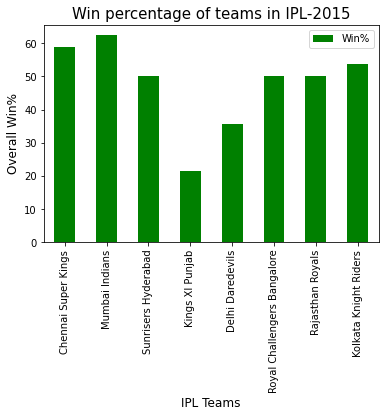

In [ ]:
# Plotting the win percentage of the teams in the whole season

ax = ipl_2015_stats.plot(x="Team", y="Win%", kind="bar",color='green')
# Set the title
ax.set_title("Win percentage of teams in IPL-2015", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Overall Win%", fontsize = 12)


From the above plot we can see that the Mumbai Indians have the highest win% of around 62% among all the teams.

Lets see how much does the toss affects the outcome of the match.

Text(0, 0.5, 'Win%')

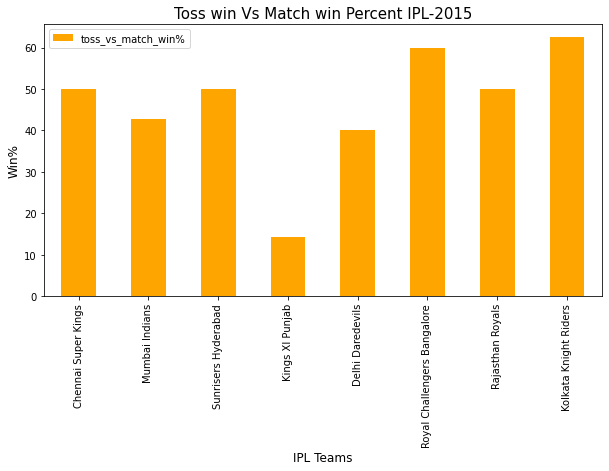

In [ ]:
# Plotting the Toss win Vs Match win Percent

ax = ipl_2015_stats.plot(x="Team", y="toss_vs_match_win%", kind="bar",color='orange',figsize = (10,5))
# Set the title
ax.set_title("Toss win Vs Match win Percent IPL-2015", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Win%", fontsize = 12)

By analyzing the "Toss win Vs Match win Percent" we have below findings :

Kolkata Knight Riders have the highest winning percentage of around 62% if they win the toss,meaning if they win the toss then their is 62% chance they will win the match also.
Out of 8 teams only 3 teams have a Toss win Vs Match win Percent less than 50%,3 teams have 50% which shows that the toss winning team had 50-50 chance of winning the match as compared to the toss losing team.

In [ ]:
# Finding the winner of the IPL 2015 season
IPL_2015_winner=ipl_2015_df['winner'].iloc[-1]

In [ ]:
print(f'The winner of the IPL-2015 is {IPL_2015_winner}')

The winner of the IPL-2015 is Mumbai Indians


In [ ]:
# Players with most man of the match awards
mom_2015_df=ipl_2015_df['player_of_match'].value_counts()
mom_2015_df.head(1)

DA Warner    4
Name: player_of_match, dtype: int64

**Batsmen Stats**

In [ ]:
#Here we are using the match id to identify the matches of IPL-2015 season

season_2015_deliveries=deliveries_df_copy[(deliveries_df_copy['match_id']>=518) & (deliveries_df_copy['match_id']<577)]
season_2015_deliveries=season_2015_deliveries.set_index('match_id')
season_2015_deliveries.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
518,1,Mumbai Indians,Kolkata Knight Riders,1,1,RG Sharma,AJ Finch,UT Yadav,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
518,1,Mumbai Indians,Kolkata Knight Riders,1,2,RG Sharma,AJ Finch,UT Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
518,1,Mumbai Indians,Kolkata Knight Riders,1,3,AJ Finch,RG Sharma,UT Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
518,1,Mumbai Indians,Kolkata Knight Riders,1,4,RG Sharma,AJ Finch,UT Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
518,1,Mumbai Indians,Kolkata Knight Riders,1,5,AJ Finch,RG Sharma,UT Yadav,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN


In [ ]:
# Finding the top batsmen by summing up their score for the entire season
batsmen_stats_2015=season_2015_deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
batsmen_stats_2015=batsmen_stats_2015.sort_values('batsman_runs',ascending=False)

In [ ]:
# Finding Batsmen with most runs in the season
batsmen_stats_2015[:10]

,batsman,batsman_runs
25,DA Warner,562
7,AM Rahane,540
60,LMP Simmons,540
3,AB de Villiers,513
122,V Kohli,505
19,CH Gayle,491
94,RG Sharma,482
113,SS Iyer,439
16,BB McCullum,436
52,KA Pollard,419


Text(0, 0.5, 'Runs Scored')

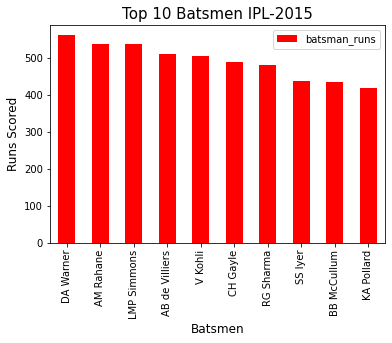

In [ ]:
# Plotting the bar graph for Top 10 Batsmen IPL-2015 in the whole season

ax = batsmen_stats_2015[:10].plot(x="batsman", y="batsman_runs", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Batsmen IPL-2015", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Batsmen', fontsize = 12)
ax.set_ylabel("Runs Scored", fontsize = 12)

In [ ]:
# Top 5 Batsmen for the season IPL-2015
batsmen_stats_2015=batsmen_stats_2015.reset_index()
batsmen_stats_2015.head()

,index,batsman,batsman_runs
0,25,DA Warner,562
1,7,AM Rahane,540
2,60,LMP Simmons,540
3,3,AB de Villiers,513
4,122,V Kohli,505


In [ ]:
# Runs scored by the top 5 overall batsmen in IPL-2015
top_5_overall_batsmen_runs_2015_df=top_5_batsman_overall(batsmen_stats_2015)
top_5_overall_batsmen_runs_2015_df

,Names,Runs
0,V Kohli,505
1,SK Raina,374
2,RG Sharma,482
3,DA Warner,562
4,S Dhawan,353


**Bowler Stats**

In [ ]:
# Finding Bowler with most wickets in the season
bowler_stats_2015=wicket_taking_bowler_df(season_2015_deliveries['dismissal_kind'],season_2015_deliveries)
bowler_stats_2015[:10]

,Bowler,Wickets
0,DJ Bravo,26
1,SL Malinga,24
2,YS Chahal,23
3,A Nehra,22
4,MA Starc,20
5,B Kumar,18
6,Harbhajan Singh,18
7,MJ McClenaghan,18
8,HV Patel,17
9,D Wiese,16


Text(0, 0.5, 'Wickets')

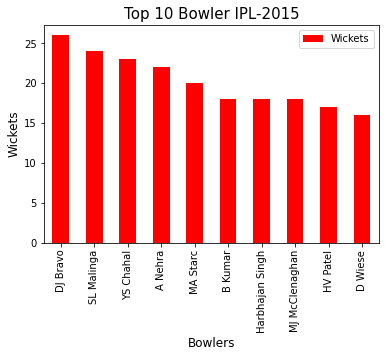

In [ ]:
# Plotting the bar graph for Top 10 Bowler IPL-2015 in the whole season

ax = bowler_stats_2015[:10].plot(x="Bowler", y="Wickets", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Bowler IPL-2015", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Bowlers', fontsize = 12)
ax.set_ylabel("Wickets", fontsize = 12)

In [ ]:
top_5_overall_bowler_wickets_2015_df=top_5_bowler_overall(bowler_stats_2015)
top_5_overall_bowler_wickets_2015_df

,Names,Wickets
0,SL Malinga,24
1,A Mishra,9
2,Harbhajan Singh,18
3,PP Chawla,11
4,DJ Bravo,26


**IPL Season 2015 Summary**

*   Mumbai Indians won the IPL-2015 title with a win% of around 62%.They had a poor Toss_win_Vs_Match_win percentage of 42%,second lowest among the teams.
*   Toss didn't played a major role in the outcome of the match.
*   DA Warner won the most Man of the match awards-4.
*   DA Warner was the Orange cap holder(highest runs scorer of the season) with 562 runs.
*   DJ Bravo was the Purple cap holder(highest wicket taking bowler of the season) with 26 wickets.

># IPL SEASON 2016

Inorder to find the IPL-2016 stats, we will fetch the information from the "matches_df_copy" dataframe for only those matches whose Season value "IPL-2016".

In [ ]:
ipl_2016_df=matches_df_copy[matches_df_copy['Season']=='IPL-2016']
ipl_2016_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
576,577,IPL-2016,Mumbai,09-04-2016,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,normal,0,Rising Pune Supergiants,0,9,AM Rahane,Wankhede Stadium,HDPK Dharmasena,CK Nandan,NaN
577,578,IPL-2016,Kolkata,10-04-2016,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,9,AD Russell,Eden Gardens,S Ravi,C Shamshuddin,NaN
578,579,IPL-2016,Chandigarh,11-04-2016,Kings XI Punjab,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,5,AJ Finch,"Punjab Cricket Association IS Bindra Stadium, ...",AK Chaudhary,VA Kulkarni,NaN
579,580,IPL-2016,Bangalore,12-04-2016,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Royal Challengers Bangalore,45,0,AB de Villiers,M Chinnaswamy Stadium,HDPK Dharmasena,VK Sharma,NaN
580,581,IPL-2016,Kolkata,13-04-2016,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,RG Sharma,Eden Gardens,Nitin Menon,S Ravi,NaN


In [ ]:
ipl_2016_stats=ipl_season_team_stats(ipl_2016_df['team1'],ipl_2016_df['team2'],ipl_2016_df['toss_winner'],ipl_2016_df['winner'])

In [ ]:
ipl_2016_stats

,Team,matches_played,won,won_toss,toss_win_match_win,Win%,toss_vs_match_win%
0,Royal Challengers Bangalore,16,9,6,4,56.250000,66.666667
1,Sunrisers Hyderabad,17,11,10,7,64.705882,70.000000
2,Kolkata Knight Riders,15,8,6,4,53.333333,66.666667
3,Rising Pune Supergiants,14,5,7,3,35.714286,42.857143
4,Mumbai Indians,14,7,9,5,50.000000,55.555556
5,Gujarat Lions,16,9,8,6,56.250000,75.000000
6,Delhi Daredevils,14,7,8,5,50.000000,62.500000


Text(0, 0.5, 'Overall Win%')

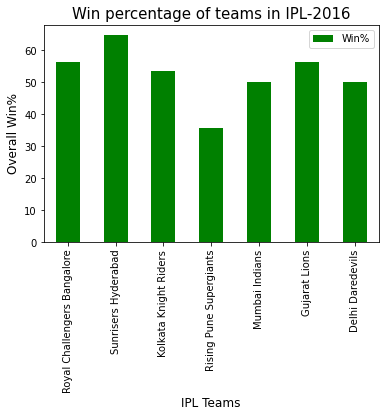

In [ ]:
# Plotting the win percentage of the teams in the IPL-2016

ax = ipl_2016_stats.plot(x="Team", y="Win%", kind="bar",color='green')
# Set the title
ax.set_title("Win percentage of teams in IPL-2016", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Overall Win%", fontsize = 12)


From the above plot we can see that the Sunrisers Hyderabad have a win% of around 64% which is quite high as compared to their competitors.

Lets see how much does the toss affects the outcome of the match.

Text(0, 0.5, 'Win%')

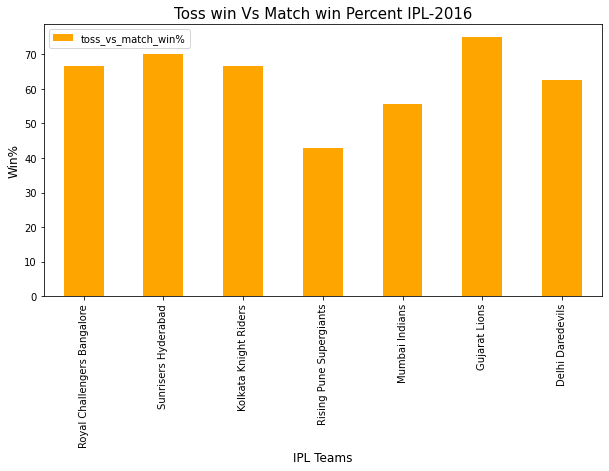

In [ ]:
# Plotting the Toss win Vs Match win Percent in the IPL-2016

ax = ipl_2016_stats.plot(x="Team", y="toss_vs_match_win%", kind="bar",color='orange',figsize = (10,5))
# Set the title
ax.set_title("Toss win Vs Match win Percent IPL-2016", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Win%", fontsize = 12)

By analyzing the "Toss win Vs Match win Percent" we have below findings :

Gujarat Lions have the highest winning percentage of around 75% if they win the toss,meaning if they win the toss then their is 75% chance they will win the match also.
Out of 7 teams only 1 teams have a Toss win Vs Match win Percent less than 50%,which shows that the toss winning team had a higher chance of winning the match as compared to the toss losing team.

In [ ]:
# Finding the winner of the IPL 2016 season
IPL_2016_winner=ipl_2016_df['winner'].iloc[-1]

In [ ]:
print(f'The winner of the IPL-2016 is {IPL_2016_winner}')

The winner of the IPL-2016 is Sunrisers Hyderabad


In [ ]:
# Players with most man of the match awards
mom_2016_df=ipl_2016_df['player_of_match'].value_counts()
mom_2016_df.head(1)

V Kohli    5
Name: player_of_match, dtype: int64

**Batsmen Stats**

In [ ]:
#Here we are using the match id to identify the matches of IPL-2016 season

season_2016_deliveries=deliveries_df_copy[(deliveries_df_copy['match_id']>=577) & (deliveries_df_copy['match_id']<637)]
season_2016_deliveries=season_2016_deliveries.set_index('match_id')
season_2016_deliveries.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
577,1,Mumbai Indians,Rising Pune Supergiants,1,1,LMP Simmons,RG Sharma,RP Singh,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
577,1,Mumbai Indians,Rising Pune Supergiants,1,2,RG Sharma,LMP Simmons,RP Singh,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
577,1,Mumbai Indians,Rising Pune Supergiants,1,3,RG Sharma,LMP Simmons,RP Singh,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
577,1,Mumbai Indians,Rising Pune Supergiants,1,4,RG Sharma,LMP Simmons,RP Singh,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
577,1,Mumbai Indians,Rising Pune Supergiants,1,5,RG Sharma,LMP Simmons,RP Singh,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [ ]:
# Finding the top batsmen by summing up their score for the entire season
batsmen_stats_2016=season_2016_deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
batsmen_stats_2016=batsmen_stats_2016.sort_values('batsman_runs',ascending=False)

In [ ]:
# Finding Batsmen with most runs in the season
batsmen_stats_2016[:10]

,batsman,batsman_runs
131,V Kohli,973
26,DA Warner,848
4,AB de Villiers,687
105,S Dhawan,501
36,G Gambhir,501
102,RG Sharma,489
8,AM Rahane,480
69,M Vijay,453
95,Q de Kock,445
112,SK Raina,399


Text(0, 0.5, 'Runs Scored')

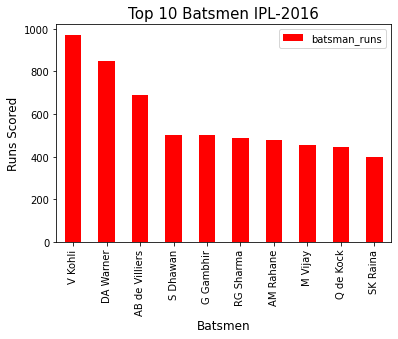

In [ ]:
# Plotting the bar graph for Top 10 Batsmen IPL-2016 in the whole season

ax = batsmen_stats_2016[:10].plot(x="batsman", y="batsman_runs", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Batsmen IPL-2016", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Batsmen', fontsize = 12)
ax.set_ylabel("Runs Scored", fontsize = 12)

In [ ]:
# Top 5 Batsmen for the season IPL-2016
batsmen_stats_2016=batsmen_stats_2016.reset_index()
batsmen_stats_2016.head()

,index,batsman,batsman_runs
0,131,V Kohli,973
1,26,DA Warner,848
2,4,AB de Villiers,687
3,105,S Dhawan,501
4,36,G Gambhir,501


In [ ]:
# Runs scored by the top 5 overall batsmen in IPL-2016
top_5_overall_batsmen_runs_2016_df=top_5_batsman_overall(batsmen_stats_2016)
top_5_overall_batsmen_runs_2016_df

,Names,Runs
0,V Kohli,973
1,SK Raina,399
2,RG Sharma,489
3,DA Warner,848
4,S Dhawan,501


**Bowler Stats**

In [ ]:
# Finding Bowler with most wickets in the season
bowler_stats_2016=wicket_taking_bowler_df(season_2016_deliveries['dismissal_kind'],season_2016_deliveries)
bowler_stats_2016[:10]

,Bowler,Wickets
0,B Kumar,23
1,YS Chahal,21
2,SR Watson,20
3,DS Kulkarni,18
4,DJ Bravo,17
5,Mustafizur Rahman,17
6,MJ McClenaghan,17
7,JJ Bumrah,15
8,AD Russell,15
9,Sandeep Sharma,15


Text(0, 0.5, 'Wickets')

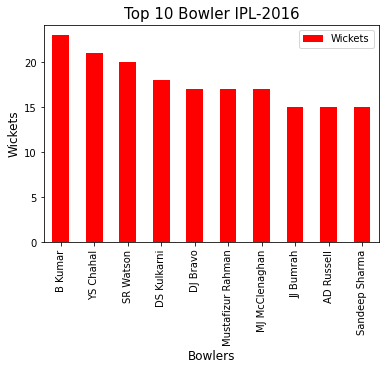

In [ ]:
# Plotting the bar graph for Top 10 Bowler IPL-2016 in the whole season

ax = bowler_stats_2016[:10].plot(x="Bowler", y="Wickets", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Bowler IPL-2016", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Bowlers', fontsize = 12)
ax.set_ylabel("Wickets", fontsize = 12)

In [ ]:
top_5_overall_bowler_wickets_2016_df=top_5_bowler_overall(bowler_stats_2016)
top_5_overall_bowler_wickets_2016_df

,Names,Wickets
0,A Mishra,13
1,Harbhajan Singh,9
2,PP Chawla,11
3,DJ Bravo,17


**IPL Season 2016 Summary**

*   Sunrisers Hyderabad won the IPL-2016 title with a win% of around 64%.They also had an impressive Toss_win_Vs_Match_win percentage of 70%,second highest among the teams.
*   Toss played a major role in the outcome of the match as 6 teams out of 7 had a winning percentage 55% or more if they won the toss.
*   V Kohli won the most Man of the match awards-5.
*   V Kohli was the Orange cap holder(highest runs scorer of the season) with 973 runs(a record).
*   B Kumar was the Purple cap holder(highest wicket taking bowler of the season) with 23 wickets.


># IPL SEASON 2017

Inorder to find the IPL-2017 stats, we will fetch the information from the "matches_df_copy" dataframe for only those matches whose Season value "IPL-2017".

In [ ]:
ipl_2017_df=matches_df_copy[matches_df_copy['Season']=='IPL-2017']
ipl_2017_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
ipl_2017_stats=ipl_season_team_stats(ipl_2017_df['team1'],ipl_2017_df['team2'],ipl_2017_df['toss_winner'],ipl_2017_df['winner'])

In [ ]:
ipl_2017_stats

,Team,matches_played,won,won_toss,toss_win_match_win,Win%,toss_vs_match_win%
0,Sunrisers Hyderabad,14,8,5,3,57.142857,60.000000
1,Kings XI Punjab,14,7,4,2,50.000000,50.000000
2,Gujarat Lions,14,4,7,4,28.571429,57.142857
3,Rising Pune Supergiant,16,10,6,5,62.500000,83.333333
4,Royal Challengers Bangalore,13,3,9,2,23.076923,22.222222
5,Mumbai Indians,17,12,11,7,70.588235,63.636364
6,Delhi Daredevils,14,6,8,5,42.857143,62.500000
7,Kolkata Knight Riders,16,9,9,6,56.250000,66.666667


Text(0, 0.5, 'Overall Win%')

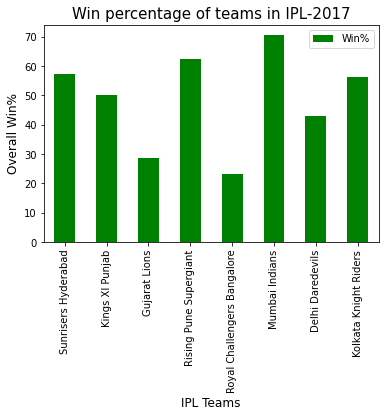

In [ ]:
# Plotting the win percentage of the teams in the IPL-2017

ax = ipl_2017_stats.plot(x="Team", y="Win%", kind="bar",color='green')
# Set the title
ax.set_title("Win percentage of teams in IPL-2017", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Overall Win%", fontsize = 12)


From the above plot we can see that the Mumbai Indians have an impressive win% of around 70% which is quite high as compared to their competitors.


Lets see how much does the toss affects the outcome of the match.

Text(0, 0.5, 'Win%')

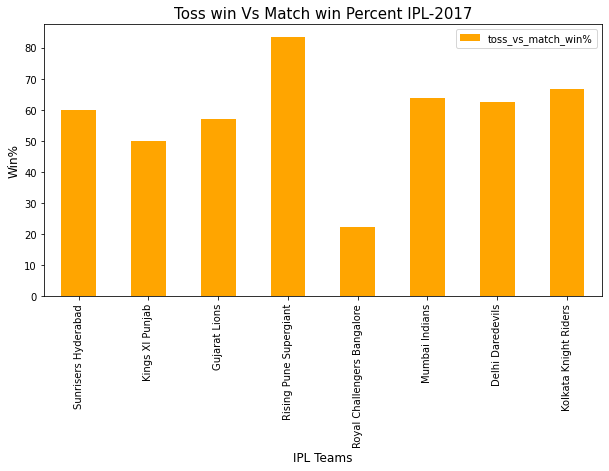

In [ ]:
# Plotting the Toss win Vs Match win Percent in IPL-2017

ax = ipl_2017_stats.plot(x="Team", y="toss_vs_match_win%", kind="bar",color='orange',figsize = (10,5))
# Set the title
ax.set_title("Toss win Vs Match win Percent IPL-2017", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Win%", fontsize = 12)

By analyzing the "Toss win Vs Match win Percent" we have below findings :

Rising Pune Supergiant have the highest winning percentage of around 83% if they win the toss,meaning if they win the toss then their is 83% chance they will win the match also.
Out of 8 teams only 1 teams had a Toss win Vs Match win Percent less than 50%,which shows that the toss winning team has a higher chance of winning the match as compared to the toss losing team.

In [ ]:
# Finding the winner of the IPL 2017 season
IPL_2017_winner=ipl_2017_df['winner'].iloc[-1]

In [ ]:
print(f'The winner of the IPL-2017 is {IPL_2017_winner}')

The winner of the IPL-2017 is Mumbai Indians


In [ ]:
# Players with most man of the match awards
mom_2017_df=ipl_2017_df['player_of_match'].value_counts()
mom_2017_df.head(1)

BA Stokes    3
Name: player_of_match, dtype: int64

**Batsmen Stats**

In [ ]:
#Here we are using the match id to identify the matches of IPL-2017 season

season_2017_deliveries=deliveries_df_copy[(deliveries_df_copy['match_id']>=1) & (deliveries_df_copy['match_id']<60)]
season_2017_deliveries=season_2017_deliveries.set_index('match_id')
season_2017_deliveries.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
# Finding the top batsmen by summing up their score for the entire season
batsmen_stats_2017=season_2017_deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
batsmen_stats_2017=batsmen_stats_2017.sort_values('batsman_runs',ascending=False)

In [ ]:
# Finding Batsmen with most runs in the season
batsmen_stats_2017[:10]

,batsman,batsman_runs
34,DA Warner,641
43,G Gambhir,498
107,S Dhawan,479
117,SPD Smith,472
112,SK Raina,442
46,HM Amla,420
77,MK Pandey,396
92,PA Patel,395
60,KA Pollard,395
99,RA Tripathi,391


Text(0, 0.5, 'Runs Scored')

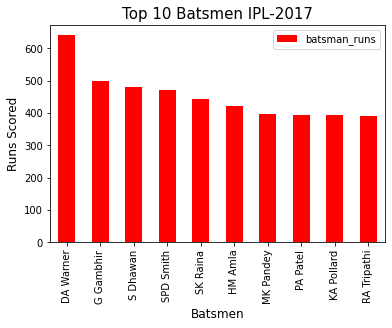

In [ ]:
# Plotting the bar graph for Top 10 Batsmen IPL-2017 in the whole season

ax = batsmen_stats_2017[:10].plot(x="batsman", y="batsman_runs", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Batsmen IPL-2017", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Batsmen', fontsize = 12)
ax.set_ylabel("Runs Scored", fontsize = 12)

In [ ]:
# Top 5 Batsmen for the season IPL-2017
batsmen_stats_2017=batsmen_stats_2017.reset_index()
batsmen_stats_2017.head()

,index,batsman,batsman_runs
0,34,DA Warner,641
1,43,G Gambhir,498
2,107,S Dhawan,479
3,117,SPD Smith,472
4,112,SK Raina,442


In [ ]:
# Runs scored by the top 5 overall batsmen in IPL-2017
top_5_overall_batsmen_runs_2017_df=top_5_batsman_overall(batsmen_stats_2017)
top_5_overall_batsmen_runs_2017_df

,Names,Runs
0,V Kohli,308
1,SK Raina,442
2,RG Sharma,333
3,DA Warner,641
4,S Dhawan,479


**Bowler Stats**

In [ ]:
# Finding Bowler with most wickets in the season
bowler_stats_2017=wicket_taking_bowler_df(season_2017_deliveries['dismissal_kind'],season_2017_deliveries)
bowler_stats_2017[:10]

,Bowler,Wickets
0,B Kumar,26
1,JD Unadkat,24
2,JJ Bumrah,20
3,MJ McClenaghan,19
4,Imran Tahir,18
5,Rashid Khan,17
6,UT Yadav,17
7,Sandeep Sharma,17
8,CR Woakes,17
9,S Kaul,16


Text(0, 0.5, 'Wickets')

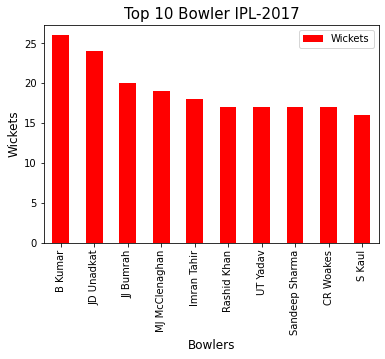

In [ ]:
# Plotting the bar graph for Top 10 Bowler IPL-2017 in the whole season

ax = bowler_stats_2017[:10].plot(x="Bowler", y="Wickets", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Bowler IPL-2017", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Bowlers', fontsize = 12)
ax.set_ylabel("Wickets", fontsize = 12)

In [ ]:
top_5_overall_bowler_wickets_2017_df=top_5_bowler_overall(bowler_stats_2017)
top_5_overall_bowler_wickets_2017_df

,Names,Wickets
0,SL Malinga,11
1,A Mishra,10
2,Harbhajan Singh,8
3,PP Chawla,6


**IPL Season 2017 Summary**

*   Mumbai Indians won the IPL-2017 title with a win% of around 70%.They also had a Toss_win_Vs_Match_win percentage of 63%, 3rd highest among the teams.
*   Toss played a major role in the outcome of the match as 7 teams out of 8 had a winning percentage 50% or more if they won the toss.
*   NM Counter-Nile won the most Man of the match awards-3.
*   DA Warner was the Orange cap holder(highest runs scorer of the season) with 641 runs.
*   B Kumar was the Purple cap holder(highest wicket taking bowler of the season) with 26 wickets.

># IPL SEASON 2018

Inorder to find the IPL-2018 stats, we will fetch the information from the "matches_df_copy" dataframe for only those matches whose Season value "IPL-2018".

In [ ]:
ipl_2018_df=matches_df_copy[matches_df_copy['Season']=='IPL-2018']
ipl_2018_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
636,7894,IPL-2018,Mumbai,07-04-2018,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary
637,7895,IPL-2018,Mohali,08-04-2018,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",Rod Tucker,K Ananthapadmanabhan,Nitin Menon
638,7896,IPL-2018,Kolkata,08-04-2018,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
639,7897,IPL-2018,Hyderabad,09-04-2018,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan
640,7898,IPL-2018,Chennai,10-04-2018,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk",Anil Chaudhary,Chris Gaffaney,A Nanda Kishore


In [ ]:
ipl_2018_stats=ipl_season_team_stats(ipl_2018_df['team1'],ipl_2018_df['team2'],ipl_2018_df['toss_winner'],ipl_2018_df['winner'])

In [ ]:
ipl_2018_stats

,Team,matches_played,won,won_toss,toss_win_match_win,Win%,toss_vs_match_win%
0,Sunrisers Hyderabad,17,10,7,4,58.823529,57.142857
1,Delhi Daredevils,14,5,8,2,35.714286,25.000000
2,Mumbai Indians,14,6,5,2,42.857143,40.000000
3,Rajasthan Royals,15,7,6,3,46.666667,50.000000
4,Kings XI Punjab,14,6,7,4,42.857143,57.142857
5,Chennai Super Kings,16,11,11,8,68.750000,72.727273
6,Royal Challengers Bangalore,14,6,7,4,42.857143,57.142857
7,Kolkata Knight Riders,16,9,9,5,56.250000,55.555556


Text(0, 0.5, 'Overall Win%')

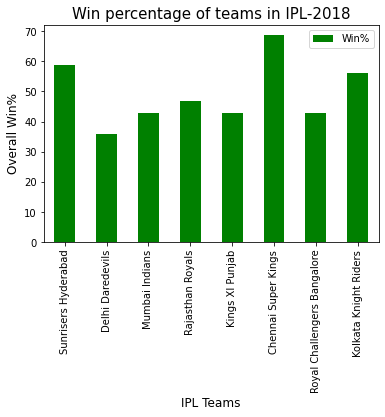

In [ ]:
# Plotting the win percentage of the teams in the IPL-2018

ax = ipl_2018_stats.plot(x="Team", y="Win%", kind="bar",color='green')
# Set the title
ax.set_title("Win percentage of teams in IPL-2018", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Overall Win%", fontsize = 12)


From the above plot we can see that the Chennai Super Kings have an impressive win% of around 68% which is quite high as compared to their competitors.

Lets see how much does the toss affects the outcome of the match.

Text(0, 0.5, 'Win%')

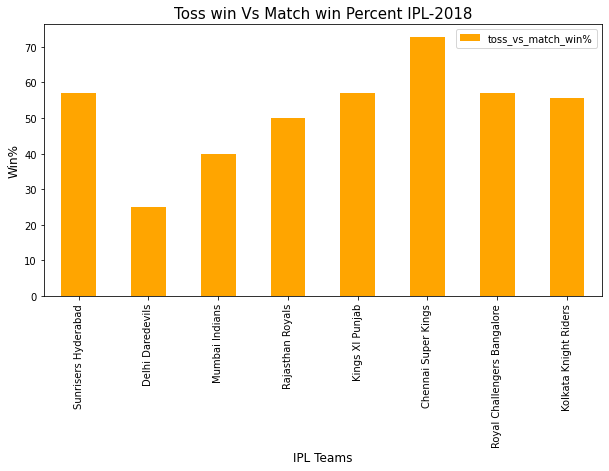

In [ ]:
# Plotting the Toss win Vs Match win Percent in IPL-2018

ax = ipl_2018_stats.plot(x="Team", y="toss_vs_match_win%", kind="bar",color='orange',figsize = (10,5))
# Set the title
ax.set_title("Toss win Vs Match win Percent IPL-2018", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Win%", fontsize = 12)

By analyzing the "Toss win Vs Match win Percent" we have below findings :

Chennai Super Kings have the highest winning percentage of around 72% if they win the toss,meaning if they win the toss then their is 72% chance they will win the match also.
Out of 8 teams only 2 teams had a Toss win Vs Match win Percent less than 50%,which shows that the toss winning team has a higher chance of winning the match as compared to the toss losing team.

In [ ]:
# Finding the winner of the IPL 2018 season
IPL_2018_winner=ipl_2018_df['winner'].iloc[-1]

In [ ]:
print(f'The winner of the IPL-2018 is {IPL_2018_winner}')

The winner of the IPL-2018 is Chennai Super Kings


In [ ]:
# Players with most man of the match awards
mom_2018_df=ipl_2018_df['player_of_match'].value_counts()
mom_2018_df.head(1)

Rashid Khan    4
Name: player_of_match, dtype: int64

**Batsmen Stats**

In [ ]:
#Here we are using the match id to identify the matches of IPL-2018 season

season_2018_deliveries=deliveries_df_copy[(deliveries_df_copy['match_id']>=7894) & (deliveries_df_copy['match_id']<7954)]
season_2018_deliveries=season_2018_deliveries.set_index('match_id')
season_2018_deliveries.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
7894,1,Mumbai Indians,Chennai Super Kings,1,1,RG Sharma,E Lewis,DL Chahar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
7894,1,Mumbai Indians,Chennai Super Kings,1,2,RG Sharma,E Lewis,DL Chahar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
7894,1,Mumbai Indians,Chennai Super Kings,1,3,RG Sharma,E Lewis,DL Chahar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
7894,1,Mumbai Indians,Chennai Super Kings,1,4,RG Sharma,E Lewis,DL Chahar,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
7894,1,Mumbai Indians,Chennai Super Kings,1,5,RG Sharma,E Lewis,DL Chahar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [ ]:
# Finding the top batsmen by summing up their score for the entire season
batsmen_stats_2018=season_2018_deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
batsmen_stats_2018=batsmen_stats_2018.sort_values('batsman_runs',ascending=False)

In [ ]:
# Finding Batsmen with most runs in the season
batsmen_stats_2018[:10]

,batsman,batsman_runs
64,KS Williamson,747
106,RR Pant,717
62,KL Rahul,678
12,AT Rayudu,615
52,JC Buttler,574
120,SR Watson,569
131,V Kohli,539
109,S Dhawan,529
11,AS Yadav,524
59,KD Karthik,520


Text(0, 0.5, 'Runs Scored')

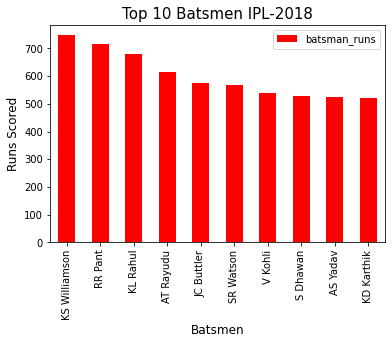

In [ ]:
# Plotting the bar graph for Top 10 Batsmen IPL-2018 in the whole season

ax = batsmen_stats_2018[:10].plot(x="batsman", y="batsman_runs", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Batsmen IPL-2018", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Batsmen', fontsize = 12)
ax.set_ylabel("Runs Scored", fontsize = 12)

In [ ]:
# Top 5 Batsmen for the season IPL-2018
batsmen_stats_2018=batsmen_stats_2018.reset_index()
batsmen_stats_2018.head()

,index,batsman,batsman_runs
0,64,KS Williamson,747
1,106,RR Pant,717
2,62,KL Rahul,678
3,12,AT Rayudu,615
4,52,JC Buttler,574


In [ ]:
# Runs scored by the top 5 overall batsmen in IPL-2018
top_5_overall_batsmen_runs_2018_df=top_5_batsman_overall(batsmen_stats_2018)
top_5_overall_batsmen_runs_2018_df

,Names,Runs
0,V Kohli,539
1,SK Raina,466
2,RG Sharma,297
3,S Dhawan,529


**Bowler Stats**

In [ ]:
# Finding Bowler with most wickets in the season
bowler_stats_2018=wicket_taking_bowler_df(season_2018_deliveries['dismissal_kind'],season_2018_deliveries)
bowler_stats_2018[:10]

,Bowler,Wickets
0,AJ Tye,24
1,Rashid Khan,21
2,S Kaul,21
3,UT Yadav,20
4,TA Boult,18
5,HH Pandya,18
6,JJ Bumrah,17
7,Kuldeep Yadav,17
8,SP Narine,17
9,SN Thakur,16


Text(0, 0.5, 'Wickets')

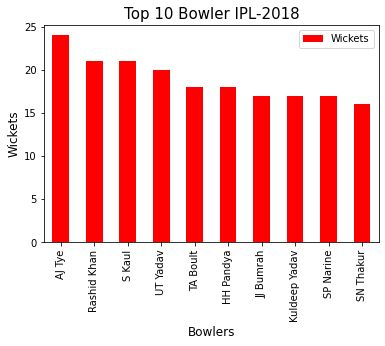

In [ ]:
# Plotting the bar graph for Top 10 Bowler IPL-2018 in the whole season

ax = bowler_stats_2018[:10].plot(x="Bowler", y="Wickets", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Bowler IPL-2018", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Bowlers', fontsize = 12)
ax.set_ylabel("Wickets", fontsize = 12)

In [ ]:
top_5_overall_bowler_wickets_2018_df=top_5_bowler_overall(bowler_stats_2018)
top_5_overall_bowler_wickets_2018_df

,Names,Wickets
0,A Mishra,12
1,Harbhajan Singh,7
2,PP Chawla,13
3,DJ Bravo,14


**IPL Season 2018 Summary**

*   Chennai Super Kings won the IPL-2018 title with a win% of around 68%.They also had an impressive Toss_win_Vs_Match_win percentage of 72%,highest among the teams.
*   Toss played a major role in the outcome of the match as 6 teams out of 8 had a winning percentage 50% or more if they won the toss.
*   Rashid Khan won the most Man of the match awards-4.
*   K Williamson was the Orange cap holder(highest runs scorer of the season) with 747 runs.
*   AJ Tye was the Purple cap holder(highest wicket taking bowler of the season) with 24 wickets.

># IPL SEASON 2019

Inorder to find the IPL-2019 stats, we will fetch the information from the "matches_df_copy" dataframe for only those matches whose Season value "IPL-2019".

In [ ]:
ipl_2019_df=matches_df_copy[matches_df_copy['Season']=='IPL-2019']
ipl_2019_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
696,11137,IPL-2019,Chennai,23-03-2019,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,7,Harbhajan Singh,M. A. Chidambaram Stadium,Bruce Oxenford,Anil Dandekar,Nitin Menon
697,11138,IPL-2019,Kolkata,24-03-2019,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,AD Russell,Eden Gardens,Chris Gaffaney,Anil Chaudhary,Vineet Kulkarni
698,11139,IPL-2019,Mumbai,24-03-2019,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Capitals,37,0,RR Pant,Wankhede Stadium,S Ravi,Yeshwant Barde,O Nandan
699,11140,IPL-2019,Jaipur,25-03-2019,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,14,0,CH Gayle,Sawai Mansingh Stadium,C Shamshuddin,KN Anantapadmanabhan,Bruce Oxenford
700,11141,IPL-2019,Delhi,26-03-2019,Delhi Capitals,Chennai Super Kings,Delhi Capitals,bat,normal,0,Chennai Super Kings,0,6,SR Watson,Feroz Shah Kotla Ground,Marais Erasmus,Nitin Menon,Anil Dandekar


In [ ]:
ipl_2019_stats=ipl_season_team_stats(ipl_2019_df['team1'],ipl_2019_df['team2'],ipl_2019_df['toss_winner'],ipl_2019_df['winner'])

In [ ]:
ipl_2019_stats

,Team,matches_played,won,won_toss,toss_win_match_win,Win%,toss_vs_match_win%
0,Mumbai Indians,16,11,8,6,68.750000,75.000000
1,Royal Challengers Bangalore,14,5,4,2,35.714286,50.000000
2,Kolkata Knight Riders,14,6,5,4,42.857143,80.000000
3,Sunrisers Hyderabad,15,6,4,2,40.000000,50.000000
4,Kings XI Punjab,14,6,6,3,42.857143,50.000000
5,Delhi Capitals,16,10,10,7,62.500000,70.000000
6,Chennai Super Kings,17,10,12,7,58.823529,58.333333
7,Rajasthan Royals,14,5,11,5,35.714286,45.454545


Text(0, 0.5, 'Overall Win%')

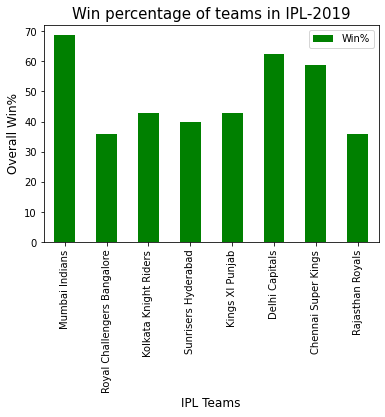

In [ ]:
# Plotting the win percentage of the teams in the IPL-2019

ax = ipl_2019_stats.plot(x="Team", y="Win%", kind="bar",color='green')
# Set the title
ax.set_title("Win percentage of teams in IPL-2019", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Overall Win%", fontsize = 12)


From the above plot we can see that the Mumbai Indians have an impressive win% of around 68% which is quite high as compared to their competitors.


Lets see how much does the toss affects the outcome of the match.

Text(0, 0.5, 'Win%')

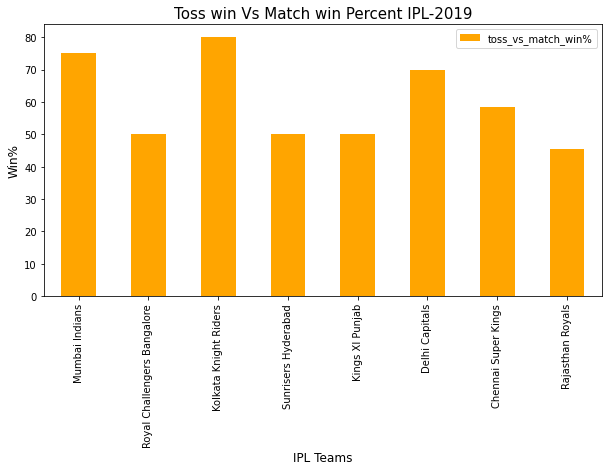

In [ ]:
# Plotting the Toss win Vs Match win Percent in the IPL-2019

ax = ipl_2019_stats.plot(x="Team", y="toss_vs_match_win%", kind="bar",color='orange',figsize = (10,5))
# Set the title
ax.set_title("Toss win Vs Match win Percent IPL-2019", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Win%", fontsize = 12)

By analyzing the "Toss win Vs Match win Percent" we have below findings :

Kolkata Knight Riders have the highest winning percentage of around 80% if they win the toss,meaning if they win the toss then their is 80% chance they will win the match also.
Out of 8 teams only 1 teams have a Toss win Vs Match win Percent less than 50%,which shows that the toss winning team has a higher chance of winning the match as compared to the toss losing team.

In [ ]:
# Finding the winner of the IPL 2019 season
IPL_2019_winner=ipl_2019_df['winner'].iloc[-1]

In [ ]:
print(f'The winner of the IPL-2019 is {IPL_2019_winner}')

The winner of the IPL-2019 is Mumbai Indians


In [ ]:
# Players with most man of the match awards
mom_2019_df=ipl_2019_df['player_of_match'].value_counts()
mom_2019_df.head(1)

AD Russell    4
Name: player_of_match, dtype: int64

**Batsmen Stats**

In [ ]:
#Here we are using the match id to identify the matches of IPL-2019 season

season_2019_deliveries=deliveries_df_copy[(deliveries_df_copy['match_id']>=11137) & (deliveries_df_copy['match_id']<111416)]
season_2019_deliveries=season_2019_deliveries.set_index('match_id')
season_2019_deliveries.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
11137,1,Royal Challengers Bangalore,Chennai Super Kings,1,1,V Kohli,PA Patel,DL Chahar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
11137,1,Royal Challengers Bangalore,Chennai Super Kings,1,2,PA Patel,V Kohli,DL Chahar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
11137,1,Royal Challengers Bangalore,Chennai Super Kings,1,3,PA Patel,V Kohli,DL Chahar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
11137,1,Royal Challengers Bangalore,Chennai Super Kings,1,4,PA Patel,V Kohli,DL Chahar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
11137,1,Royal Challengers Bangalore,Chennai Super Kings,1,5,PA Patel,V Kohli,DL Chahar,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [ ]:
# Finding the top batsmen by summing up their score for the entire season
batsmen_stats_2019=season_2019_deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
batsmen_stats_2019=batsmen_stats_2019.sort_values('batsman_runs',ascending=False)

In [ ]:
# Finding Batsmen with most runs in the season
batsmen_stats_2019[:10]

,batsman,batsman_runs
27,DA Warner,727
62,KL Rahul,610
96,Q de Kock,555
5,AD Russell,545
111,S Dhawan,542
22,CH Gayle,523
107,RR Pant,511
128,SS Iyer,484
136,V Kohli,472
47,J Bairstow,468


Text(0, 0.5, 'Runs Scored')

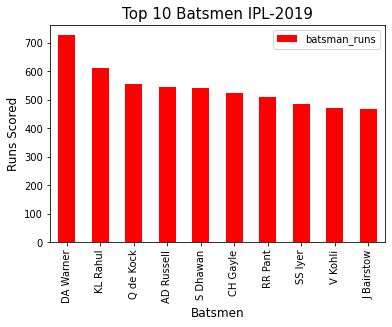

In [ ]:
# Plotting the bar graph for Top 10 Batsmen IPL-2019 in the whole season

ax = batsmen_stats_2019[:10].plot(x="batsman", y="batsman_runs", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Batsmen IPL-2019", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Batsmen', fontsize = 12)
ax.set_ylabel("Runs Scored", fontsize = 12)

In [ ]:
# Top 5 Batsmen for the season IPL-2019
batsmen_stats_2019=batsmen_stats_2019.reset_index()
batsmen_stats_2019.head()

,index,batsman,batsman_runs
0,27,DA Warner,727
1,62,KL Rahul,610
2,96,Q de Kock,555
3,5,AD Russell,545
4,111,S Dhawan,542


In [ ]:
# Runs scored by the top 5 overall batsmen in IPL-2019
top_5_overall_batsmen_runs_2019_df=top_5_batsman_overall(batsmen_stats_2019)
top_5_overall_batsmen_runs_2019_df

,Names,Runs
0,V Kohli,472
1,SK Raina,401
2,RG Sharma,410
3,DA Warner,727
4,S Dhawan,542


**Bowler Stats**

In [ ]:
# Finding Bowler with most wickets in the season
bowler_stats_2019=wicket_taking_bowler_df(season_2019_deliveries['dismissal_kind'],season_2019_deliveries)
bowler_stats_2019[:10]

,Bowler,Wickets
0,Imran Tahir,26
1,K Rabada,25
2,DL Chahar,22
3,S Gopal,20
4,Mohammed Shami,19
5,K Ahmed,19
6,JJ Bumrah,19
7,YS Chahal,18
8,Rashid Khan,17
9,SL Malinga,16


Text(0, 0.5, 'Wickets')

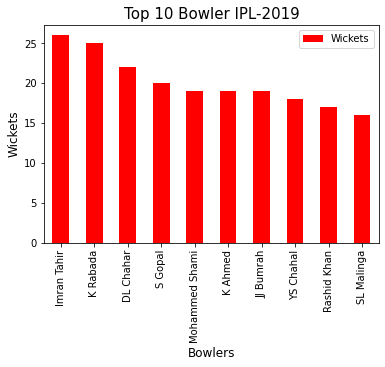

In [ ]:
# Plotting the bar graph for Top 10 Bowler IPL-2019 in the whole season

ax = bowler_stats_2019[:10].plot(x="Bowler", y="Wickets", kind="bar",color='red')
# Set the title
ax.set_title("Top 10 Bowler IPL-2019", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Bowlers', fontsize = 12)
ax.set_ylabel("Wickets", fontsize = 12)

In [ ]:
top_5_overall_bowler_wickets_2019_df=top_5_bowler_overall(bowler_stats_2019)
top_5_overall_bowler_wickets_2019_df

,Names,Wickets
0,SL Malinga,16
1,A Mishra,10
2,Harbhajan Singh,16
3,PP Chawla,10
4,DJ Bravo,11


**IPL Season 2019 Summary**

*   Mumbai Indians won the IPL-2019 title with a win% of around 68%.They also had an impressive Toss_win_Vs_Match_win percentage of 75%, 2nd highest among the teams.
*   Toss played a major role in the outcome of the match as 7 teams out of 8 had a winning percentage 50% or more if they won the toss.
*   AD Russel won the most Man of the match awards-4.
*   DA Warner was the Orange cap holder(highest runs scorer of the season) with 727 runs.
*   Imran Tahir was the Purple cap holder(highest wicket taking bowler of the season) with 26 wickets.

# Finalists in IPL from 2008-2019

In this section we will find the number of times a team has played in finals of IPL and won.

In [ ]:
# Creating a list with elements as dataframes of each season
season_list=[ipl_2008_df,ipl_2009_df,ipl_2010_df,ipl_2011_df,ipl_2012_df,ipl_2013_df,ipl_2014_df,ipl_2015_df,ipl_2016_df,ipl_2017_df,ipl_2018_df,ipl_2019_df]

In [ ]:
# A function which takes a list of dataframes of all seasons and returns the dict of teams with finals played

def finalists_each_season(list_season):
  '''
  This functions takes a list of dataframes of all seasons and returns the dict of teams with finals played
  '''
  finalists_list=[]
  for i in list_season:
    finalists_list.append(i['team1'].iloc[-1])
    finalists_list.append(i['team2'].iloc[-1])


  finalist_count = {}
  for index,team in enumerate(finalists_list):
    if team==finalists_list[index]:
      finalist_count[team] = finalist_count.get(team, 0) + 1  

  return finalist_count


In [ ]:
# Calling the function
finalists_and_count=finalists_each_season(season_list)
finalists_and_count

{'Chennai Super Kings': 8,
 'Deccan Chargers': 1,
 'Kings XI Punjab': 1,
 'Kolkata Knight Riders': 2,
 'Mumbai Indians': 5,
 'Rajasthan Royals': 1,
 'Rising Pune Supergiant': 1,
 'Royal Challengers Bangalore': 3,
 'Sunrisers Hyderabad': 2}

In [ ]:
finalists_and_count.keys()

dict_keys(['Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers', 'Royal Challengers Bangalore', 'Mumbai Indians', 'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad', 'Rising Pune Supergiant'])

In [ ]:
finalist_df=pd.DataFrame({"Teams":finalists_and_count.keys(),"Finals_Played":finalists_and_count.values(),"Won_IPL":[2,1,1,0,4,2,0,1,0]})
finalist_df=finalist_df.sort_values('Finals_Played',ascending=False)
finalist_df

,Teams,Finals_Played,Won_IPL
0,Chennai Super Kings,8,2
4,Mumbai Indians,5,4
3,Royal Challengers Bangalore,3,0
5,Kolkata Knight Riders,2,2
7,Sunrisers Hyderabad,2,1
1,Rajasthan Royals,1,1
2,Deccan Chargers,1,1
6,Kings XI Punjab,1,0
8,Rising Pune Supergiant,1,0


Text(0, 0.5, 'Final Played VS Won')

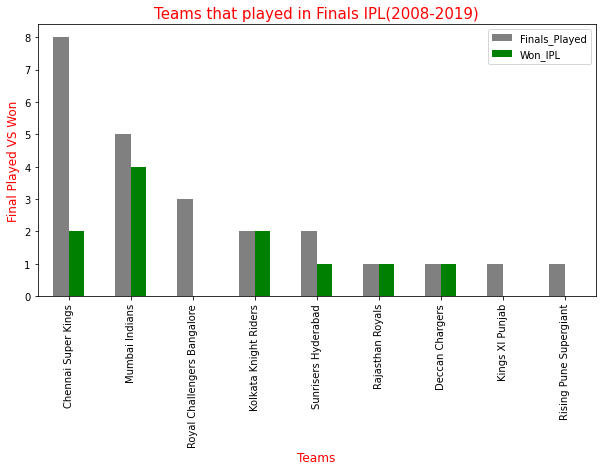

In [ ]:
# Creating a bar plot for Teams that played in Finals IPL(2008-2019)
ax = finalist_df.plot.bar(x='Teams',y=['Finals_Played','Won_IPL'],figsize = (10,5),fontsize = 10,color=['grey','green'])

# Setting the title
ax.set_title("Teams that played in Finals IPL(2008-2019)", fontsize = 15,color='red')

# Setting x and y-labels
ax.set_xlabel('Teams', fontsize = 12,color='red')
ax.set_ylabel("Final Played VS Won", fontsize = 12,color='red')

After analysing the above plots we have below findings :


*   Chennai Super kings have a low winning rate of 25% in IPL finals with winning just 2 out of 8 games.

*   Mumbai Indians have a high winning rate of 80% in IPL finals with winning 4 out of 5 games

*   Kolkata Knight riders have 100% winning rate in IPL finals with winning 2 out of 2 games.






# MI Vs CSK head to head

In the section "Finalists in IPL from 2008-2019" we came to know that Mumbai Indians and Chennai Super kings are the teams which have played the most number of IPL finals, so in this section we will try to analyse the matches between these 2 team and will try to figure out which team has an upperhand over the other.

In [ ]:
# head shows the first 5 rows of the Dataframe.
matches_df_copy.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
# creating the list of names of team1
teams_a_list=[]
for i in matches_df_copy['team1']:
  teams_a_list.append(i)

In [ ]:
# creating the list of names of team2
teams_b_list=[]
for i in matches_df_copy['team2']:
  teams_b_list.append(i)

In [ ]:
# creating the list of winner of team1 Vs team2
winner_a_b_list=[]
for i in matches_df_copy['winner']:
  winner_a_b_list.append(i)

In [ ]:
# Creating a tuple of team1 and team 2 using zip
team_a_team_b_zip=list(zip(teams_a_list,teams_b_list))

In [ ]:
# creating a dataframe
tuple_team1_Vs_team2_df=pd.DataFrame({"Team1_Vs_Team2":team_a_team_b_zip,"Winner":winner_a_b_list})
tuple_team1_Vs_team2_df.head()

,Team1_Vs_Team2,Winner
0,"(Sunrisers Hyderabad, Royal Challengers Bangal...",Sunrisers Hyderabad
1,"(Mumbai Indians, Rising Pune Supergiant)",Rising Pune Supergiant
2,"(Gujarat Lions, Kolkata Knight Riders)",Kolkata Knight Riders
3,"(Rising Pune Supergiant, Kings XI Punjab)",Kings XI Punjab
4,"(Royal Challengers Bangalore, Delhi Daredevils)",Royal Challengers Bangalore


In [ ]:
# Defining the function
def team1_Vs_team2_stats(tuple_df,tuple_df_column,team_1,team_2):
  '''
  This function takes the dataframe with teams as tuple column, and the teams names as inputs and returns the number of matches between the two teams and number of wins of each teams against each other
  '''
  # Will give us the list of winners of each match between the inputted team
  winner_list_new=[]
  match_count=0
  for index_1,i in enumerate(tuple_df_column):
    if i==(team_1, team_2):
      winner_list_new.append(tuple_df.loc[index_1,'Winner'])
      match_count=match_count+1
    elif i==(team_2, team_1):
      winner_list_new.append(tuple_df.loc[index_1,'Winner'])
      match_count=match_count+1

  # the below code will count the number of times the element appeared in the given list and will gice us a dictionary of element and its count
  match_win = {}
  for index,team in enumerate(winner_list_new):
    if team==winner_list_new[index]:
      match_win[team] = match_win.get(team, 0) + 1

  return match_count,match_win

In [ ]:
mum_vs_csk_count,mum_vs_csk_win_dict=team1_Vs_team2_stats(tuple_team1_Vs_team2_df,tuple_team1_Vs_team2_df['Team1_Vs_Team2'],'Mumbai Indians','Chennai Super Kings')

In [ ]:
mum_vs_csk_count

28

In [ ]:
mum_vs_csk_win_dict

{'Chennai Super Kings': 11, 'Mumbai Indians': 17}

In [ ]:
mum_vs_csk_win_df=pd.DataFrame({"Teams":mum_vs_csk_win_dict.keys(),'Won':mum_vs_csk_win_dict.values()})
mum_vs_csk_win_df

,Teams,Won
0,Chennai Super Kings,11
1,Mumbai Indians,17


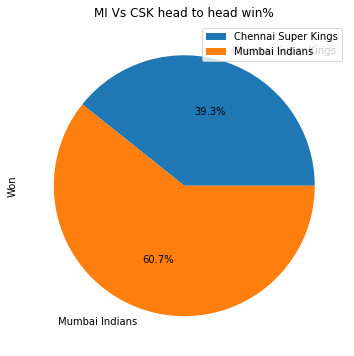

In [ ]:
# Creating a bar plot for Teams that played in Finals IPL(2008-2019)
my_labels=mum_vs_csk_win_df['Teams']
mum_vs_csk_win_df.plot.pie(x="Teams",title="MI Vs CSK head to head win%",y='Won',
        autopct='%1.1f%%',labels=my_labels,figsize = (10,6))

After analysing the above 2 plots and 'mum_vs_csk_win_df' , we found that :


*   Mumbai Indians have won 60.7% of their matches over Chennai Super kings out of 28 matches played between them.

*   Mumbai Indians is a better team in head to head clashes with Chennai Super Kings.



# Team Stats Analysis

Here we will try to analyze the teams as per their win percentage in home and away matches.We will also try to conclude which teams are the most consistent teams in the IPL.We will use the following dataframe for our analysis.


*   teamswise_homeaway_df_copy




In [ ]:
teamswise_homeaway_df_copy.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222


In [ ]:
# Function is defined to calculate total matches played by the team
def matches_played(home_matches,away_matches):
  '''
  The function takes 2 inputs ,matches played at home venue and matches played at away venues and returns the total matches played by the team
  '''
  total_matches_played=home_matches+away_matches
  return total_matches_played

In [ ]:
# Here we are adding a new column ['total_matches_played'] to our 'teamswise_homeaway_df_copy' dataframe 
teamswise_homeaway_df_copy['total_matches_played']=teamswise_homeaway_df_copy.apply(lambda x:matches_played(x['home_matches'],x['away_matches']),axis=1)
teamswise_homeaway_df_copy.head(2)

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage,total_matches_played
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000,16
1,Mumbai Indians,58,51,101,86,57.425743,59.302326,187


In [ ]:
def total_wins(home_wins,away_wins):
  '''
  This function takes 2 inputs, home and wins of a team and returns the total wins for the team
  '''
  total_wins=home_wins+away_wins
  return total_wins

In [ ]:
# Lets add another column to calculate the total wins of a team
teamswise_homeaway_df_copy['total_wins']=teamswise_homeaway_df_copy.apply(lambda x:total_wins(x['home_wins'],x['away_wins']),axis=1)
teamswise_homeaway_df_copy.head(2)

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage,total_matches_played,total_wins
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000,16,10
1,Mumbai Indians,58,51,101,86,57.425743,59.302326,187,109


In [ ]:
def overall_win_percent(total_matches_played,total_wins):
  '''
  This function takes 2 inputs, total matches played and total wins and returns the winning percentage of the team.
  '''
  overall_win_perc=(total_wins/total_matches_played)*100
  return overall_win_perc

In [ ]:
teamswise_homeaway_df_copy['overall_win_percent']=teamswise_homeaway_df_copy.apply(lambda x:overall_win_percent(x['total_matches_played'],x['total_wins']),axis=1)
teamswise_homeaway_df_copy.head()

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage,total_matches_played,total_wins,overall_win_percent
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000,16,10,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326,187,109,58.288770
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333,164,100,60.975610
3,Delhi Capitals,3,7,6,10,50.000000,70.000000,16,10,62.500000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222,108,58,53.703704


In [ ]:
data_overallwin=[teamswise_homeaway_df_copy['team'],teamswise_homeaway_df_copy['total_matches_played'],teamswise_homeaway_df_copy['overall_win_percent']]

In [ ]:
# Creating a Dataframe with team name, total matches played and overall win percent as columns of dataframe.
overall_win_df=pd.concat(data_overallwin,axis=1)
overall_win_df=overall_win_df.set_index('team')
overall_win_df=overall_win_df.sort_values(['overall_win_percent'],ascending=False)
overall_win_df

,total_matches_played,overall_win_percent
team,,
Rising Pune Supergiant,16,62.500000
Delhi Capitals,16,62.500000
Chennai Super Kings,164,60.975610
Mumbai Indians,187,58.288770
Sunrisers Hyderabad,108,53.703704
Kolkata Knight Riders,178,51.685393
Rajasthan Royals,147,51.020408
Royal Challengers Bangalore,180,46.666667
Kings XI Punjab,176,46.590909


Let us plot the bar graph and analze the win perecntages of the teams.

Text(0, 0.5, 'IPL Teams')

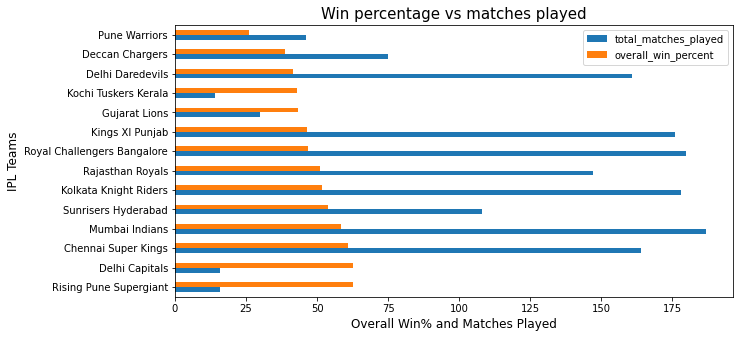

In [ ]:
# Creating a figure object 
ax = overall_win_df.plot.barh(figsize = (10,5),fontsize = 10)

# Setting the title
ax.set_title("Win percentage vs matches played", fontsize = 15)

# Setting x and y-labels
ax.set_xlabel('Overall Win% and Matches Played', fontsize = 12)
ax.set_ylabel("IPL Teams", fontsize = 12)

From the above overall horizontal bar plot we observe that Delhi Capitals and Rising Pune Supergiant has the maximum win% of 62.5% each but the total matches played are only 16 which are very less compared to the other teams,check the Blue horizontal bar of these teams.

Inorder to arrive at a better analysis we are filtering out the teams with total matches played to be less than 50.So lets apply a filter in our dataframe to get the required output.

In [ ]:
# Creating a dataframe with matches played greater than or equal to 50
overall_win_df_50_and_above_matches=overall_win_df[overall_win_df['total_matches_played']>=50]
overall_win_df_50_and_above_matches

,total_matches_played,overall_win_percent
team,,
Chennai Super Kings,164,60.975610
Mumbai Indians,187,58.288770
Sunrisers Hyderabad,108,53.703704
Kolkata Knight Riders,178,51.685393
Rajasthan Royals,147,51.020408
Royal Challengers Bangalore,180,46.666667
Kings XI Punjab,176,46.590909
Delhi Daredevils,161,41.614907
Deccan Chargers,75,38.666667


Text(0, 0.5, 'IPL Teams')

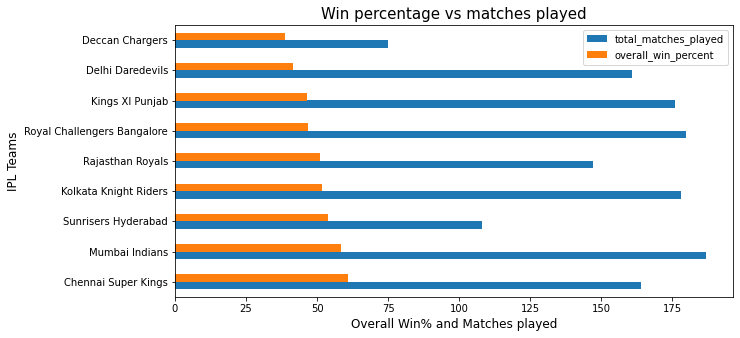

In [ ]:
# Creating the horizontal bar chart for the dataframe 'overall_win_df_50_and_above_matches'. 
bx = overall_win_df_50_and_above_matches.plot.barh(figsize = (10,5),fontsize = 10)

# Set the title
bx.set_title("Win percentage vs matches played", fontsize = 15)

# Set x and y-labels
bx.set_xlabel('Overall Win% and Matches played', fontsize = 12)
bx.set_ylabel("IPL Teams", fontsize = 12)

**Conclusion**

From the above bar chart we can say that Chennai Super kings has the highest win% followed by Mumbai Indians.We can also see that Mumbai Indians have played the maximum number of matches in the IPL.This means that Chennai Super Kings followed by Mumbai Indians are the two most consistent teams in the IPL with win% of 60.9 and 58.28 respectively.

**We have got the overall scenario of the winning percentage of the teams,so now lets deep dive into the home and away matches of each teams.**




In this section we will try to answer the question :

*  Does playing at the home ground gives the home team an advantage over the outcome of the match?

Let's find out.


In [ ]:
home_away_wins_data=[teamswise_homeaway_df_copy['team'],teamswise_homeaway_df_copy['home_win_percentage'],teamswise_homeaway_df_copy['away_win_percentage']]

In [ ]:
# Creating a DataFrame with team,home win% and away win% as columns
home_away_wins_df=pd.concat(home_away_wins_data,axis=1)
home_away_wins_df=home_away_wins_df.set_index('team')
home_away_wins_df=home_away_wins_df.sort_values(['home_win_percentage','away_win_percentage'])
home_away_wins_df

,home_win_percentage,away_win_percentage
team,,
Gujarat Lions,7.142857,75.000000
Kochi Tuskers Kerala,28.571429,57.142857
Pune Warriors,30.000000,23.076923
Delhi Daredevils,34.722222,47.191011
Kolkata Knight Riders,40.963855,61.052632
Royal Challengers Bangalore,41.176471,51.578947
Kings XI Punjab,41.758242,51.764706
Deccan Chargers,41.860465,34.375000
Rajasthan Royals,43.283582,57.500000


In [ ]:
# It defines a runtime configuration (rc) containing the default styles for every plot element you create.
plt.rcParams['figure.figsize'] = (10, 5)

Text(0, 0.5, 'Win%')

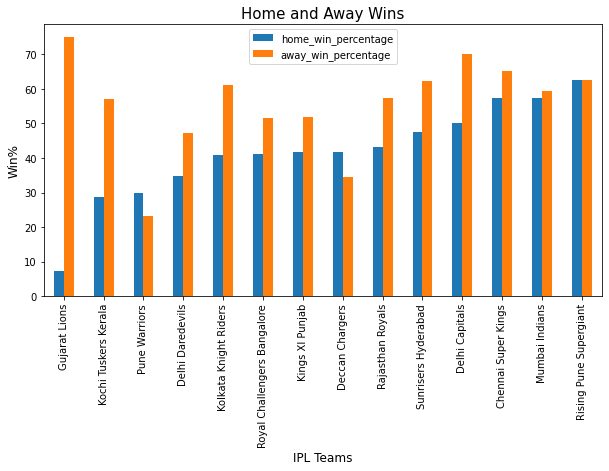

In [ ]:
# Create the figure object 
ax = home_away_wins_df.plot.bar(figsize = (10,5),fontsize = 10)

# Set the title
ax.set_title("Home and Away Wins", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("Win%", fontsize = 12)

From the above bar chart we have below findings :

*   12 teams out of 14 have performed better in the away matches as compared to the home matches.The away matches win% is more than the home win%, which implies the teams have won away matches more than the home matches.
*   Only 2 teams Pune Warriors and Deccan Chargers are the teams who have higher home win percentage.
*   Highest spike can be seen in the Gujrat Lions with away win% of 75% but has played the least number of matches.
* Most of the teams have away win percentage of more than 50%.


In [ ]:
teamswise_homeaway_df_copy

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage,total_matches_played,total_wins,overall_win_percent
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000,16,10,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326,187,109,58.288770
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333,164,100,60.975610
3,Delhi Capitals,3,7,6,10,50.000000,70.000000,16,10,62.500000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222,108,58,53.703704
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000,147,75,51.020408
6,Deccan Chargers,18,11,43,32,41.860465,34.375000,75,29,38.666667
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706,176,82,46.590909
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947,180,84,46.666667
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632,178,92,51.685393


We need to see the number of matches played by the teams in their home venue vs the away venue.

In [ ]:
#lets create a list of teams
teams_list=[]
for i in teamswise_homeaway_df_copy['team']:
  teams_list.append(i)


In [ ]:
#lets create a list of home_matches 
home_matches_list=[]
for i in teamswise_homeaway_df_copy['home_matches']:
  home_matches_list.append(i)

In [ ]:
#lets create a list of away_matches 
away_matches_list=[]
for i in teamswise_homeaway_df_copy['away_matches']:
  away_matches_list.append(i)

Text(0.5, 1.0, 'Home Vs Away matches played ')

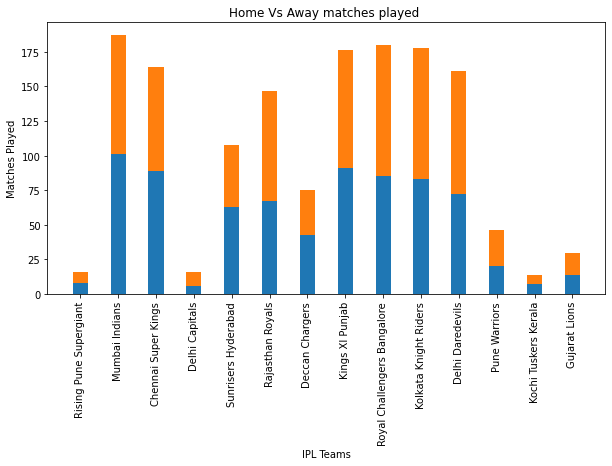

In [ ]:
# Here we are trying to plot the 
w=0.4

x=teams_list
home_matches=home_matches_list
away_matches=away_matches_list

plt.bar(x,home_matches,w,label='home_matches')
plt.bar(x,away_matches,w,bottom=home_matches,label='away_matches')
plt.xticks(rotation=90)

plt.xlabel('IPL Teams',)
plt.ylabel('Matches Played')
plt.title('Home Vs Away matches played ')
#plt.legend()
#plt.show()

**Conclusion :** By analysing the 'Home Vs Away matches' chart and 'Home and Away wins' chart we can conclude that a team playing in its home ground does not seem to have any advantage in the outcome of the match in terms of winning the match, as most of the teams have win% of more than 50 in away games.

# Effect of toss on the outcome of the match

In this section we will try to answer the question :


*   Does a toss have any effect on the outcome of the match?
*   If yes then share the stats



Let's begin.

In [ ]:
# The final Dataframe with all the toss stats of the entire IPL from 2008 to 2019.
ipl_stats_overall_toss_win_match_win_df=ipl_season_team_stats(matches_df_copy['team1'],matches_df_copy['team2'],matches_df_copy['toss_winner'],matches_df_copy['winner'])
ipl_stats_overall_toss_win_match_win_df

,Team,matches_played,won,won_toss,toss_win_match_win,Win%,toss_vs_match_win%
0,Mumbai Indians,187,109,98,56,58.288770,57.142857
1,Kings XI Punjab,176,82,81,35,46.590909,43.209877
2,Chennai Super Kings,164,100,89,57,60.975610,64.044944
3,Royal Challengers Bangalore,180,84,81,41,46.666667,50.617284
4,Kolkata Knight Riders,178,92,92,53,51.685393,57.608696
5,Delhi Daredevils,161,67,80,35,41.614907,43.750000
6,Rajasthan Royals,147,75,80,42,51.020408,52.500000
7,Sunrisers Hyderabad,108,58,46,23,53.703704,50.000000
8,Deccan Chargers,75,29,43,19,38.666667,44.186047
9,Pune Warriors,46,12,20,3,26.086957,15.000000


Lets calculate the overall toss_win-match_win percentage and see what we get

In [ ]:
overall_toss_win_match_win_percentage=(ipl_stats_overall_toss_win_match_win_df['toss_win_match_win'].sum()/ipl_stats_overall_toss_win_match_win_df['won_toss'].sum())*100
overall_toss_win_match_win_percentage

51.98412698412699

Text(0, 0.5, 'IPL Teams')

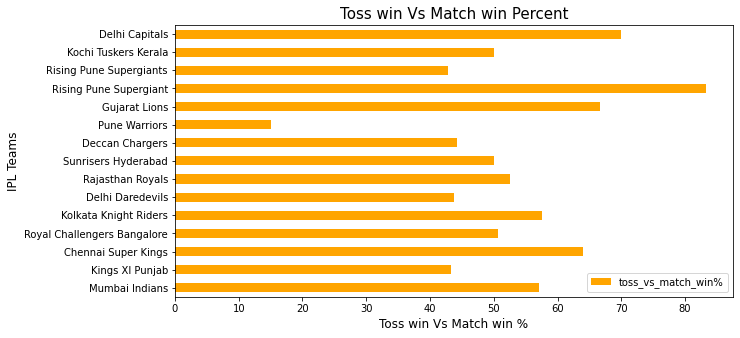

In [ ]:
# Plotting the Toss win Vs Match win percent of the teams in the whole IPL seasons.

ax = ipl_stats_overall_toss_win_match_win_df.plot(x="Team", y="toss_vs_match_win%", kind="barh",color='orange',figsize = (10,5))
# Set the title
ax.set_title("Toss win Vs Match win Percent", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Toss win Vs Match win %', fontsize = 12)
ax.set_ylabel("IPL Teams", fontsize = 12)

After analysing the above plot and the season wise stats from IPL-2008 to 2019 we have below findings :

*   Though the season wise stats had higher toss_win-match_win percentage meaning the toss winning team had higher chances of winning the match as compared to the other team,but the overall stats paint a different picture altogether.With overall toss_win-match_win percentage equalling approx 52%,It does gives a 2% higher chance for a toss winning team to win but the percentage difference is not that high to give a concluding result.


**Conclusion :** After analysing the season wise and the overall toss win ,match win stats we can say that the outcome of the toss does not affect the outcome of the match as per the overall scenario.

# Finding the number of matches held in every season

We will try to find out the number of matches played in each season of IPL from 2008 to 2019.We will use the below Dataframe for analysis:


*  matches_df_copy




In [ ]:
matches_df_copy.shape

(756, 18)

In [ ]:
matches_df_copy.head(3)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [ ]:
# Checking the null values in the columns
matches_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
# Let us check the number of matches played in IPL in different seasons

ipl_matches_played=matches_df_copy['Season'].value_counts()
ipl_matches_played

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2019    60
IPL-2018    60
IPL-2016    60
IPL-2014    60
IPL-2010    60
IPL-2017    59
IPL-2015    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

Text(0, 0.5, 'Matches Played ')

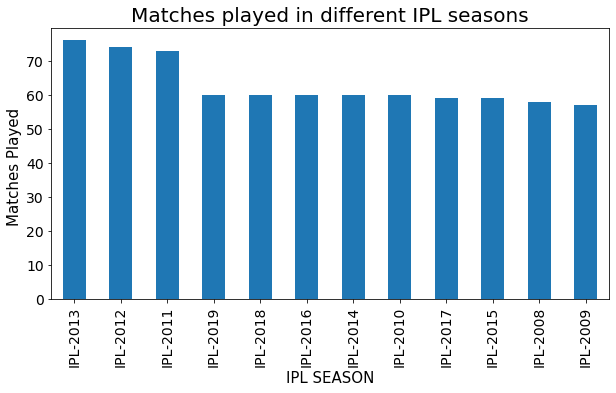

In [ ]:
# Create the bar plot for the ipl matches played in different seasons highest to lowest
cx = ipl_matches_played.plot.bar(figsize = (10,5),fontsize = 14)

# Set the title
cx.set_title("Matches played in different IPL seasons", fontsize = 20)

# Set x and y-labels
cx.set_xlabel("IPL SEASON", fontsize = 15)
cx.set_ylabel("Matches Played ", fontsize = 15)

**Conclusion :** In IPL 2013 seasons 76 matches were played which is the highest matches tally from 2008 to 2019.On an average 60 matches have been  played every season from 2014 to 2019.

# Top 5 overall Batsmen with yearwise STATS from 2008-2019

In this section we will merge the season wise stats obtained in the IPL Seasons above of the top 5 batsmen overall on the basis of runs scored to create a dataframe and will try to :


*   compare the performances of these players 
*   study the individual performance stats of these players



Merging the dataframe stats year wise of the top 5 batsmen from 2008 to 2009

In [ ]:
merged_2008_9=pd.merge(top_5_overall_batsmen_runs_2008_df,top_5_overall_batsmen_runs_2009_df,how='outer',on='Names')
merged_2008_9

,Names,Runs_x,Runs_y
0,V Kohli,165.0,246
1,SK Raina,421.0,434
2,RG Sharma,404.0,362
3,S Dhawan,340.0,40
4,DA Warner,NaN,163


In [ ]:
merged_2010_11=pd.merge(top_5_overall_batsmen_runs_2010_df,top_5_overall_batsmen_runs_2011_df,how='outer',on='Names')
merged_2010_11

,Names,Runs_x,Runs_y
0,V Kohli,307,557
1,SK Raina,528,438
2,RG Sharma,404,372
3,DA Warner,282,324
4,S Dhawan,191,400


In [ ]:
x_2008_to_2011=pd.merge(merged_2008_9,merged_2010_11,how='outer',on='Names')
x_2008_to_2011=x_2008_to_2011.rename(columns={'Runs_x_x':'IPL-2008','Runs_y_x':'IPL-2009','Runs_x_y':'IPL-2010','Runs_y_y':'IPL-2011'})
x_2008_to_2011

,Names,IPL-2008,IPL-2009,IPL-2010,IPL-2011
0,V Kohli,165.0,246,307,557
1,SK Raina,421.0,434,528,438
2,RG Sharma,404.0,362,404,372
3,S Dhawan,340.0,40,191,400
4,DA Warner,NaN,163,282,324


In [ ]:
merged_2012_13=pd.merge(top_5_overall_batsmen_runs_2012_df,top_5_overall_batsmen_runs_2013_df,how='outer',on='Names')
merged_2012_13

,Names,Runs_x,Runs_y
0,V Kohli,364,639
1,SK Raina,441,548
2,RG Sharma,433,536
3,DA Warner,256,410
4,S Dhawan,569,311


In [ ]:
merged_2014_15=pd.merge(top_5_overall_batsmen_runs_2014_df,top_5_overall_batsmen_runs_2015_df,how='outer',on='Names')
merged_2014_15

,Names,Runs_x,Runs_y
0,V Kohli,359,505
1,SK Raina,523,374
2,RG Sharma,390,482
3,DA Warner,528,562
4,S Dhawan,377,353


In [ ]:
y_2012_to_2015=pd.merge(merged_2012_13,merged_2014_15,how='outer',on='Names')
y_2012_to_2015=y_2012_to_2015.rename(columns={'Runs_x_x':'IPL-2012','Runs_y_x':'IPL-2013','Runs_x_y':'IPL-2014','Runs_y_y':'IPL-2015'})
y_2012_to_2015

,Names,IPL-2012,IPL-2013,IPL-2014,IPL-2015
0,V Kohli,364,639,359,505
1,SK Raina,441,548,523,374
2,RG Sharma,433,536,390,482
3,DA Warner,256,410,528,562
4,S Dhawan,569,311,377,353


In [ ]:
merged_2016_17=pd.merge(top_5_overall_batsmen_runs_2016_df,top_5_overall_batsmen_runs_2017_df,how='outer',on='Names')
merged_2016_17

,Names,Runs_x,Runs_y
0,V Kohli,973,308
1,SK Raina,399,442
2,RG Sharma,489,333
3,DA Warner,848,641
4,S Dhawan,501,479


In [ ]:
merged_2018_19=pd.merge(top_5_overall_batsmen_runs_2018_df,top_5_overall_batsmen_runs_2019_df,how='outer',on='Names')
merged_2018_19

,Names,Runs_x,Runs_y
0,V Kohli,539.0,472
1,SK Raina,466.0,401
2,RG Sharma,297.0,410
3,S Dhawan,529.0,542
4,DA Warner,NaN,727


In [ ]:
z_2016_to_2019=pd.merge(merged_2016_17,merged_2018_19,how='outer',on='Names')
z_2016_to_2019=z_2016_to_2019.rename(columns={'Runs_x_x':'IPL-2016','Runs_y_x':'IPL-2017','Runs_x_y':'IPL-2018','Runs_y_y':'IPL-2019'})
z_2016_to_2019

,Names,IPL-2016,IPL-2017,IPL-2018,IPL-2019
0,V Kohli,973,308,539.0,472
1,SK Raina,399,442,466.0,401
2,RG Sharma,489,333,297.0,410
3,DA Warner,848,641,NaN,727
4,S Dhawan,501,479,529.0,542


In [ ]:
# Now we will merge x,y,z

merge_2008_2015=pd.merge(x_2008_to_2011,y_2012_to_2015,how='outer',on='Names')
merge_2008_2015

,Names,IPL-2008,IPL-2009,IPL-2010,IPL-2011,IPL-2012,IPL-2013,IPL-2014,IPL-2015
0,V Kohli,165.0,246,307,557,364,639,359,505
1,SK Raina,421.0,434,528,438,441,548,523,374
2,RG Sharma,404.0,362,404,372,433,536,390,482
3,S Dhawan,340.0,40,191,400,569,311,377,353
4,DA Warner,NaN,163,282,324,256,410,528,562


In [ ]:
# Yearwise final stats of the top 5 Batsmen :
top_5_Batsmen_overall_final_stats_df=pd.merge(merge_2008_2015,z_2016_to_2019,how='outer',on='Names')
top_5_Batsmen_overall_final_stats_df

,Names,IPL-2008,IPL-2009,IPL-2010,IPL-2011,IPL-2012,IPL-2013,IPL-2014,IPL-2015,IPL-2016,IPL-2017,IPL-2018,IPL-2019
0,V Kohli,165.0,246,307,557,364,639,359,505,973,308,539.0,472
1,SK Raina,421.0,434,528,438,441,548,523,374,399,442,466.0,401
2,RG Sharma,404.0,362,404,372,433,536,390,482,489,333,297.0,410
3,S Dhawan,340.0,40,191,400,569,311,377,353,501,479,529.0,542
4,DA Warner,NaN,163,282,324,256,410,528,562,848,641,NaN,727


In [ ]:
# Changing the Index of the Dataframe
top_5_Batsmen_overall_final_stats_df=top_5_Batsmen_overall_final_stats_df.set_index("Names")

In [ ]:
top_5_Batsmen_overall_final_stats_df=top_5_Batsmen_overall_final_stats_df.fillna(0)

In [ ]:
# Taking the transpose of this Dataframe and storing it
top_5_Batsmen_overall_final_stats_df_transpose= top_5_Batsmen_overall_final_stats_df.T
top_5_Batsmen_overall_final_stats_df_transpose

Names,V Kohli,SK Raina,RG Sharma,S Dhawan,DA Warner
IPL-2008,165.0,421.0,404.0,340.0,0.0
IPL-2009,246.0,434.0,362.0,40.0,163.0
IPL-2010,307.0,528.0,404.0,191.0,282.0
IPL-2011,557.0,438.0,372.0,400.0,324.0
IPL-2012,364.0,441.0,433.0,569.0,256.0
IPL-2013,639.0,548.0,536.0,311.0,410.0
IPL-2014,359.0,523.0,390.0,377.0,528.0
IPL-2015,505.0,374.0,482.0,353.0,562.0
IPL-2016,973.0,399.0,489.0,501.0,848.0
IPL-2017,308.0,442.0,333.0,479.0,641.0


**Findings** : After looking at the "top_5_Batsmen_overall_final_stats_df_transpose" dataframe we see that in IPL-2008 and IPL-2018 ,DA Warner has scored 0 runs because he was not the part of IPL squad for those seasons.

Lets plot the graph indicating the yearwise progress report of the top 5 players

Text(0, 0.5, 'Runs Scored')

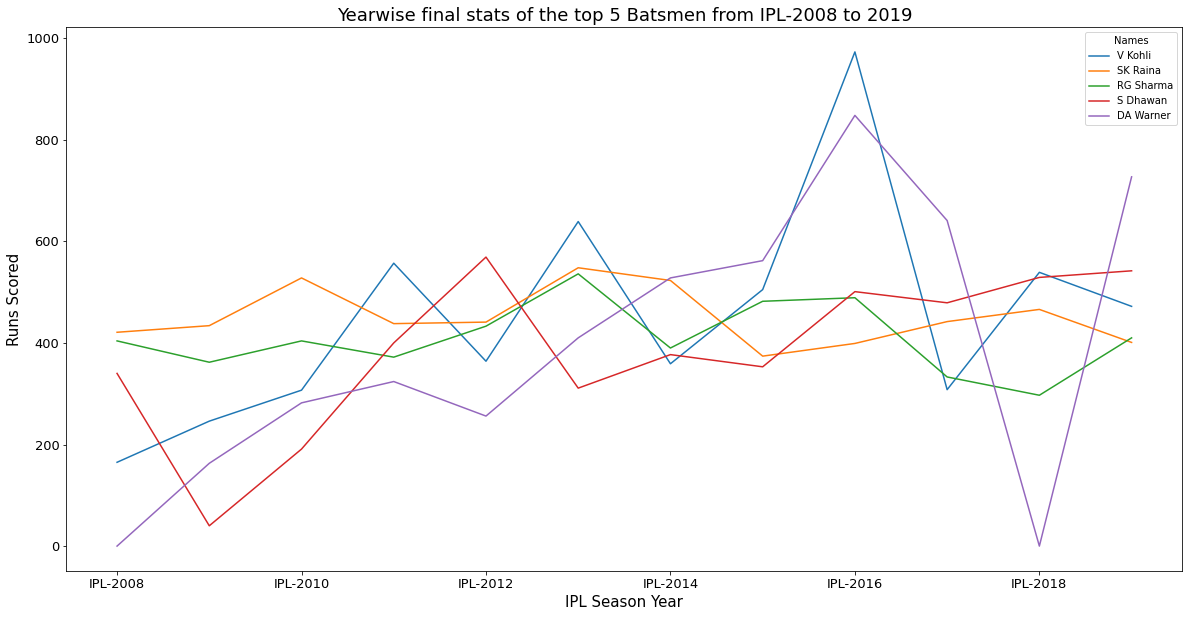

In [ ]:
# Plotting the win percentage of the teams in the whole season

ax = top_5_Batsmen_overall_final_stats_df_transpose.plot(figsize = (20,10),fontsize = 13)       # Here we have taken the transpose of the DataFrame
# Set the title
ax.set_title("Yearwise final stats of the top 5 Batsmen from IPL-2008 to 2019", fontsize = 18)

# Set x and y-labels
ax.set_xlabel('IPL Season Year', fontsize = 15)
ax.set_ylabel("Runs Scored", fontsize = 15)

After analysing the above plot we have the following findings:


*   All players except 'DA Warner' have participated in every edition of IPL from 2008 to 2019.

*   V Kohli is the only player among the top 5 to have scored more than 950 runs in a single season, 973 to be exact(an exceptional performance). He achieved this feat in IPL-2016. DA Warner was the second highest run scorer in that season with 848 runs.

*   The purple line indicates the performance of DA Warner.He has scored zero runs in IPL-2008 and IPL-2018,suggesting he was not in the squad for those editions of the IPL.

*   Suresh Raina is the only player who has scored above 350+ runs in every edition of the IPL.


**Lets now calculate the avearge total runs scored by these batsmen in each IPL seasons.**

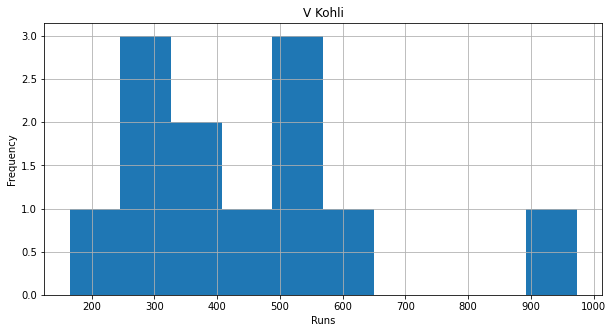

In [ ]:
# Plotting Histogram for V Kohli
top_5_Batsmen_overall_final_stats_df_transpose.hist(column=['V Kohli'])
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

Let us examine the histogram plot of **V Kohli**


*   We can easily interpret from the histogram that V Kohli has scored maximum percentage of his runs in the range of 250 to 580.

*   He has also scored an 950+ runs one time.

*   He has also scored 600+ runs 2 times.

*   The range of runs scored by V Kohli varies from approx 160 to 970




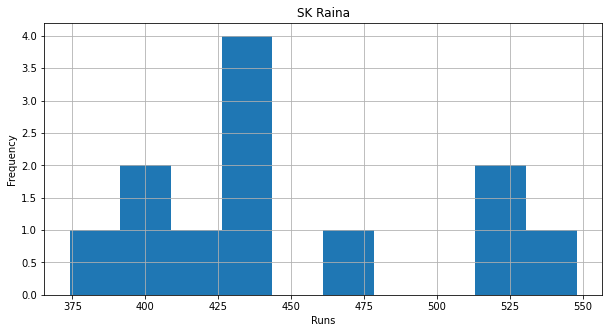

In [ ]:
# Plotting Histogram for SK Raina
top_5_Batsmen_overall_final_stats_df_transpose.hist(column=['SK Raina'])
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

Let us examine the histogram plot of **SK Raina**


*   We can easily interpret from the histogram that SK Raina has scored maximum percentage of his runs in the range of 375 to 440.

*   He has also scored an 500+ runs 3 times.

*   The range of runs scored by SK Raina varies from approx 375 to 540.

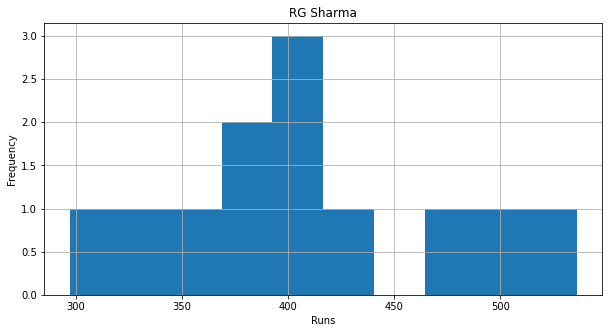

In [ ]:
# Plotting Histogram for RG Sharma
top_5_Batsmen_overall_final_stats_df_transpose.hist(column=['RG Sharma'])
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

Let us examine the histogram plot of **RG Sharma**


*   We can easily interpret from the histogram that RG Sharma has scored maximum percentage of his runs in the range of 300 to 410.

*   He has also scored an 450+ runs 3 times.

*   The range of runs scored by RG Sharma varies from approx 300 to 540.

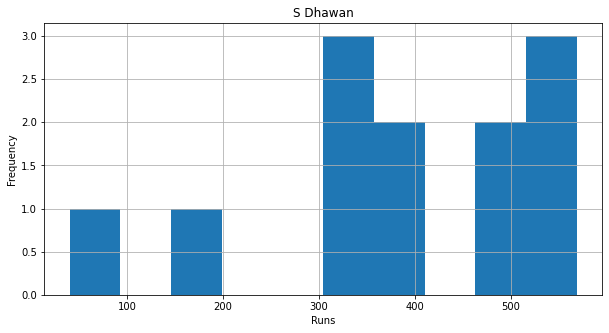

In [ ]:
# Plotting Histogram for S Dhawan
top_5_Batsmen_overall_final_stats_df_transpose.hist(column=['S Dhawan'])
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

Let us examine the histogram plot of **S Dhawan**


*   We can easily interpret from the histogram that S Dhawan has scored maximum percentage of his runs in the range of 300 to 550.

*   He has also scored an 500+ runs 4 times.

*   The range of runs scored by S Dhawan varies from approx 40 to 550.

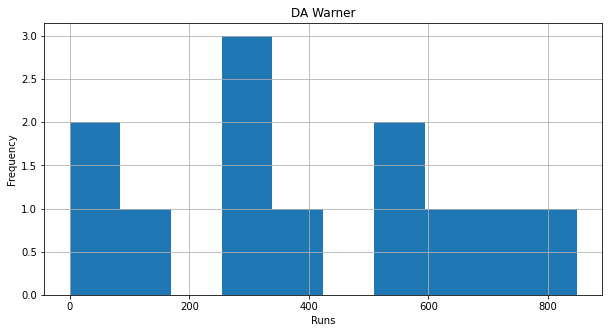

In [ ]:
# Plotting Histogram for DA Warner
top_5_Batsmen_overall_final_stats_df_transpose.hist(column=['DA Warner'])
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

Let us examine the histogram plot of **DA Warner**.Remember we have ignored the two zeroes in the left portion of the histogram as he was not part of the IPL for two seasons.

*   He has scored maximum percentage of his runs in the range of 300 to 600.

*   He has also scored an 800+ runs 1 time.

*   He has also scored an 600+ runs 3 times.

*   The range of runs scored by DA Warner varies from approx 150 to 840.

**Let us see the overall stats of these players**

In [ ]:
most_runs_average_df_copy.head(5)


,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


Text(0, 0.5, 'Total runs & Ball faced')

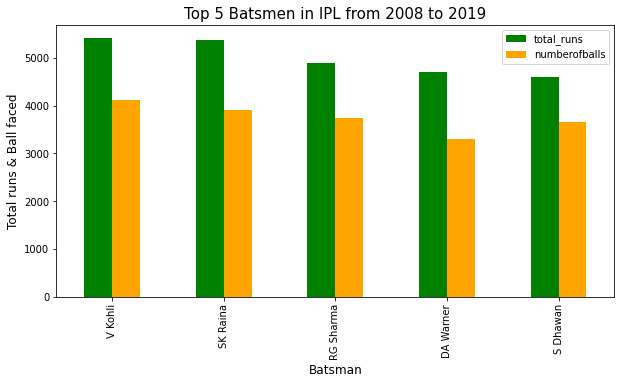

In [ ]:
# Plotting the Top 5 Batsmen in IPL from 2008 to 2019 in the IPL based on runs scored

ax = most_runs_average_df_copy[:5].plot(x="batsman", y=["total_runs","numberofballs"], kind="bar",color=['green','orange'])
# Set the title
ax.set_title("Top 5 Batsmen in IPL from 2008 to 2019", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Batsman', fontsize = 12)
ax.set_ylabel("Total runs & Ball faced", fontsize = 12)

Text(0, 0.5, 'Total runs & Ball faced')

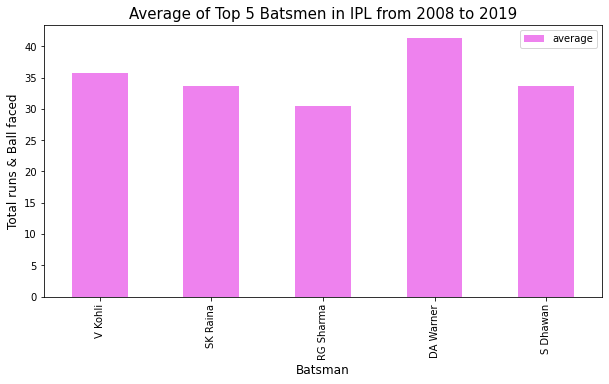

In [ ]:
# Plotting the Top 5 Batsmen in IPL from 2008 to 2019 in the IPL

ax = most_runs_average_df_copy[:5].plot(x="batsman", y=["average"], kind="bar",color=['Violet'])
# Set the title
ax.set_title("Average of Top 5 Batsmen in IPL from 2008 to 2019", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('Batsman', fontsize = 12)
ax.set_ylabel("Total runs & Ball faced", fontsize = 12)

After examining the above two plots and "most_runs_average_df_copy" dataframe we have arrived at following observations :


*   V Kohli and Suresh Raina are the only two batsmen to score more than 5000+ runs.
*   V Kohli is the leading run scorer but has also faced the maximum number of balls to achieve the feat among the top 5 batsmen.

*   DA Warner has played 9 seasons compared to 11 seasons played by the other 4 .

*   Despite playing the least number of balls in the top 5 ,DA Warner is the 4th highest run scorer in the IPL.

*   DA Warner is the only player with average of 40+ among the top 5.
*   DA Warner has the strikerate of 143, best among the top 5.





# Top 5 Overall Bowlers 2008-2019 STATS

In this section we will merge the season wise stats obtained above in the IPL Seasons of the top 5 bowlers overall on the basis of wickets taken to create a dataframe and will try to :


*   compare the performances of these players 
*   study the individual performance stats of these players

Merging the dataframe stats yearwise of the top 5 bowler from 2008 to 2009

In [ ]:
top_5_overall_bowler_wickets_2008_df

,Names,Wickets
0,A Mishra,11
1,Harbhajan Singh,5
2,PP Chawla,17
3,DJ Bravo,11


In [ ]:
top_5_overall_bowler_wickets_2009_df

,Names,Wickets
0,SL Malinga,18
1,A Mishra,14
2,Harbhajan Singh,12
3,PP Chawla,12
4,DJ Bravo,11


In [ ]:
merg_bowler_2008_9=pd.merge(top_5_overall_bowler_wickets_2008_df,top_5_overall_bowler_wickets_2009_df,how='outer',on='Names')
merg_bowler_2008_9

,Names,Wickets_x,Wickets_y
0,A Mishra,11.0,14
1,Harbhajan Singh,5.0,12
2,PP Chawla,17.0,12
3,DJ Bravo,11.0,11
4,SL Malinga,NaN,18


In [ ]:
merg_bowler_2010_11=pd.merge(top_5_overall_bowler_wickets_2010_df,top_5_overall_bowler_wickets_2011_df,how='outer',on='Names')
merg_bowler_2010_11

,Names,Wickets_x,Wickets_y
0,SL Malinga,15,28
1,A Mishra,17,19
2,Harbhajan Singh,17,14
3,PP Chawla,12,16
4,DJ Bravo,4,6


In [ ]:
a_2008_to_2011=pd.merge(merg_bowler_2008_9,merg_bowler_2010_11,how='outer',on='Names')
a_2008_to_2011=a_2008_to_2011.rename(columns={'Wickets_x_x':'IPL-2008','Wickets_y_x':'IPL-2009','Wickets_x_y':'IPL-2010','Wickets_y_y':'IPL-2011'})
a_2008_to_2011

,Names,IPL-2008,IPL-2009,IPL-2010,IPL-2011
0,A Mishra,11.0,14,17,19
1,Harbhajan Singh,5.0,12,17,14
2,PP Chawla,17.0,12,12,16
3,DJ Bravo,11.0,11,4,6
4,SL Malinga,NaN,18,15,28


In [ ]:
merg_bowler_2012_13=pd.merge(top_5_overall_bowler_wickets_2012_df,top_5_overall_bowler_wickets_2013_df,how='outer',on='Names')
merg_bowler_2012_13

,Names,Wickets_x,Wickets_y
0,SL Malinga,22,18
1,A Mishra,13,21
2,Harbhajan Singh,6,22
3,PP Chawla,16,11
4,DJ Bravo,15,28


In [ ]:
merg_bowler_2014_15=pd.merge(top_5_overall_bowler_wickets_2014_df,top_5_overall_bowler_wickets_2015_df,how='outer',on='Names')
merg_bowler_2014_15

,Names,Wickets_x,Wickets_y
0,SL Malinga,16.0,24
1,A Mishra,7.0,9
2,Harbhajan Singh,14.0,18
3,PP Chawla,14.0,11
4,DJ Bravo,NaN,26


In [ ]:
b_2012_to_2015=pd.merge(merg_bowler_2012_13,merg_bowler_2014_15,how='outer',on='Names')
b_2012_to_2015=b_2012_to_2015.rename(columns={'Wickets_x_x':'IPL-2012','Wickets_y_x':'IPL-2013','Wickets_x_y':'IPL-2014','Wickets_y_y':'IPL-2015'})
b_2012_to_2015

,Names,IPL-2012,IPL-2013,IPL-2014,IPL-2015
0,SL Malinga,22,18,16.0,24
1,A Mishra,13,21,7.0,9
2,Harbhajan Singh,6,22,14.0,18
3,PP Chawla,16,11,14.0,11
4,DJ Bravo,15,28,NaN,26


In [ ]:
merg_bowler_2016_17=pd.merge(top_5_overall_bowler_wickets_2016_df,top_5_overall_bowler_wickets_2017_df,how='outer',on='Names')
merg_bowler_2016_17

,Names,Wickets_x,Wickets_y
0,A Mishra,13.0,10.0
1,Harbhajan Singh,9.0,8.0
2,PP Chawla,11.0,6.0
3,DJ Bravo,17.0,NaN
4,SL Malinga,NaN,11.0


In [ ]:
merg_bowler_2018_19=pd.merge(top_5_overall_bowler_wickets_2018_df,top_5_overall_bowler_wickets_2019_df,how='outer',on='Names')
merg_bowler_2018_19

,Names,Wickets_x,Wickets_y
0,A Mishra,12.0,10
1,Harbhajan Singh,7.0,16
2,PP Chawla,13.0,10
3,DJ Bravo,14.0,11
4,SL Malinga,NaN,16


In [ ]:
c_2016_to_2019=pd.merge(merg_bowler_2016_17,merg_bowler_2018_19,how='outer',on='Names')
c_2016_to_2019=c_2016_to_2019.rename(columns={'Wickets_x_x':'IPL-2016','Wickets_y_x':'IPL-2017','Wickets_x_y':'IPL-2018','Wickets_y_y':'IPL-2019'})
c_2016_to_2019

,Names,IPL-2016,IPL-2017,IPL-2018,IPL-2019
0,A Mishra,13.0,10.0,12.0,10
1,Harbhajan Singh,9.0,8.0,7.0,16
2,PP Chawla,11.0,6.0,13.0,10
3,DJ Bravo,17.0,NaN,14.0,11
4,SL Malinga,NaN,11.0,NaN,16


In [ ]:
# Now we will merge a,b,c

merg_bowler_2008_15=pd.merge(a_2008_to_2011,b_2012_to_2015,how='outer',on='Names')
merg_bowler_2008_15

,Names,IPL-2008,IPL-2009,IPL-2010,IPL-2011,IPL-2012,IPL-2013,IPL-2014,IPL-2015
0,A Mishra,11.0,14,17,19,13,21,7.0,9
1,Harbhajan Singh,5.0,12,17,14,6,22,14.0,18
2,PP Chawla,17.0,12,12,16,16,11,14.0,11
3,DJ Bravo,11.0,11,4,6,15,28,NaN,26
4,SL Malinga,NaN,18,15,28,22,18,16.0,24


In [ ]:
# Yearwise final stats of the top 5 Bowler with wickets taken :
top_5_Bowler_overall_final_stats_df=pd.merge(merg_bowler_2008_15,c_2016_to_2019,how='outer',on='Names')
top_5_Bowler_overall_final_stats_df

,Names,IPL-2008,IPL-2009,IPL-2010,IPL-2011,IPL-2012,IPL-2013,IPL-2014,IPL-2015,IPL-2016,IPL-2017,IPL-2018,IPL-2019
0,A Mishra,11.0,14,17,19,13,21,7.0,9,13.0,10.0,12.0,10
1,Harbhajan Singh,5.0,12,17,14,6,22,14.0,18,9.0,8.0,7.0,16
2,PP Chawla,17.0,12,12,16,16,11,14.0,11,11.0,6.0,13.0,10
3,DJ Bravo,11.0,11,4,6,15,28,NaN,26,17.0,NaN,14.0,11
4,SL Malinga,NaN,18,15,28,22,18,16.0,24,NaN,11.0,NaN,16


In [ ]:
# Changing the Index of the Dataframe
top_5_Bowler_overall_final_stats_df=top_5_Bowler_overall_final_stats_df.set_index("Names")
top_5_Bowler_overall_final_stats_df=top_5_Bowler_overall_final_stats_df.fillna(0)
top_5_Bowler_overall_final_stats_df

,IPL-2008,IPL-2009,IPL-2010,IPL-2011,IPL-2012,IPL-2013,IPL-2014,IPL-2015,IPL-2016,IPL-2017,IPL-2018,IPL-2019
Names,,,,,,,,,,,,
A Mishra,11.0,14,17,19,13,21,7.0,9,13.0,10.0,12.0,10
Harbhajan Singh,5.0,12,17,14,6,22,14.0,18,9.0,8.0,7.0,16
PP Chawla,17.0,12,12,16,16,11,14.0,11,11.0,6.0,13.0,10
DJ Bravo,11.0,11,4,6,15,28,0.0,26,17.0,0.0,14.0,11
SL Malinga,0.0,18,15,28,22,18,16.0,24,0.0,11.0,0.0,16


In [ ]:
# Taking Transpose to obtain the final season wise list of the wicket taken by the top 5 bowlers.
top_5_Bowler_overall_final_stats_df_transpose=top_5_Bowler_overall_final_stats_df.T
top_5_Bowler_overall_final_stats_df_transpose

Names,A Mishra,Harbhajan Singh,PP Chawla,DJ Bravo,SL Malinga
IPL-2008,11.0,5.0,17.0,11.0,0.0
IPL-2009,14.0,12.0,12.0,11.0,18.0
IPL-2010,17.0,17.0,12.0,4.0,15.0
IPL-2011,19.0,14.0,16.0,6.0,28.0
IPL-2012,13.0,6.0,16.0,15.0,22.0
IPL-2013,21.0,22.0,11.0,28.0,18.0
IPL-2014,7.0,14.0,14.0,0.0,16.0
IPL-2015,9.0,18.0,11.0,26.0,24.0
IPL-2016,13.0,9.0,11.0,17.0,0.0
IPL-2017,10.0,8.0,6.0,0.0,11.0


Text(0, 0.5, 'Wickets Taken')

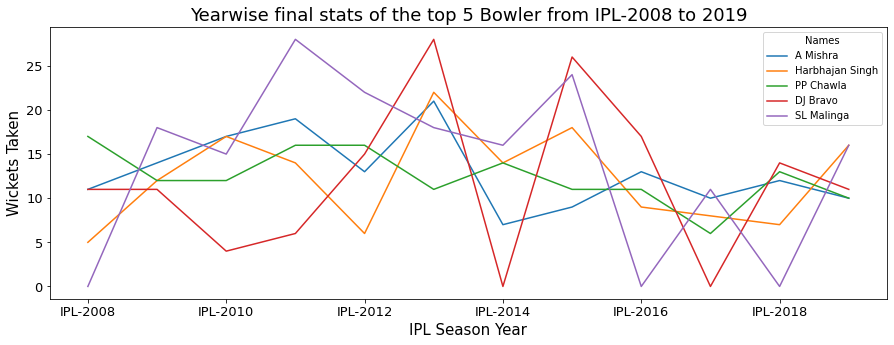

In [ ]:
# Plotting tYearwise final stats of the top 5 Bowler from IPL-2008 to 2019

ax = top_5_Bowler_overall_final_stats_df_transpose.plot(figsize = (15,5),fontsize = 13)       # Here we have taken the transpose of the DataFrame
# Set the title
ax.set_title("Yearwise final stats of the top 5 Bowler from IPL-2008 to 2019", fontsize = 18)

# Set x and y-labels
ax.set_xlabel('IPL Season Year', fontsize = 15)
ax.set_ylabel("Wickets Taken", fontsize = 15)

After analysing the above plot we have the following findings:


*   All players except 'SL Malinga' and 'DJ Bravo' have participated in every edition of IPL from 2008 to 2019.

*   DJ Bravo was not in the IPL squad for season-2014 and 2015.The plot shows zero wickets taken for these seasons.

*   SL Malinga was not in the IPL squad for season-2008, 2016 and 2018.The plot shows zero wickets taken for these seasons.

*   SL Malinga is the only bowler in the top 5 to have taken 10+ wickets in every season he has participated.

*   PP Chawla gave his best performance in the IPL-2008 with 17 wickets after that his performance has declined comparatively.

*   Harbhajan Singh and Amit Mishra gave their best performances in IPL-2013.


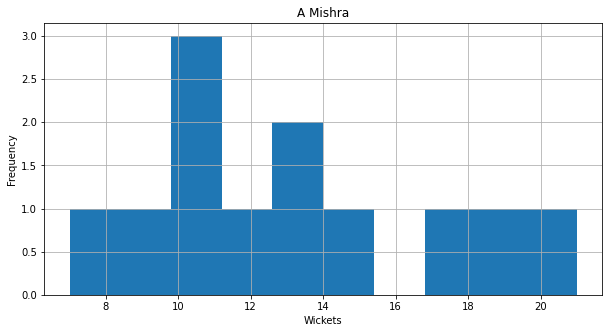

In [ ]:
# Plotting Histogram for A Mishra
top_5_Bowler_overall_final_stats_df_transpose.hist(column=['A Mishra'])
plt.xlabel('Wickets')
plt.ylabel('Frequency')
plt.show()

Let us examine the histogram plot of **A Mishra**


*   He has taken wickets in the range of 10 to 15 most number of times.

*   He has taken 20+ wickets one time.

*   The range of wickets taken varies from approx 7 to 21.

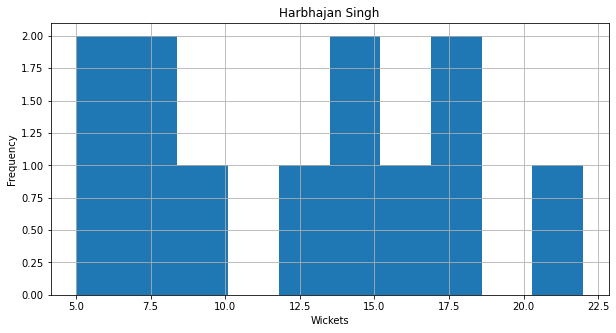

In [ ]:
# Plotting Histogram for Harbhajan Singh
top_5_Bowler_overall_final_stats_df_transpose.hist(column=['Harbhajan Singh'])
plt.xlabel('Wickets')
plt.ylabel('Frequency')
plt.show()

Let us examine the histogram plot of **Harbhajan Singh**


*   He has taken wickets in the range of 5 to 18 most number of times.

*   He has taken 20+ wickets one time.

*   The range of wickets taken varies from approx 5 to 22.

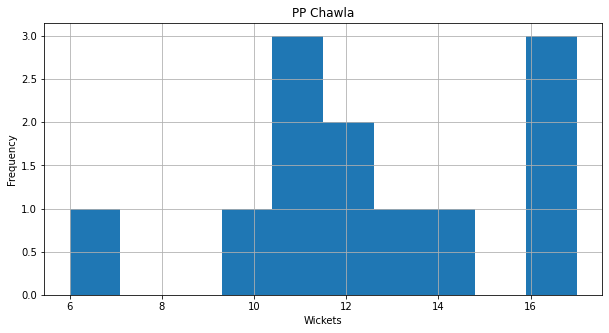

In [ ]:
# Plotting Histogram for PP Chawla
top_5_Bowler_overall_final_stats_df_transpose.hist(column=['PP Chawla'])
plt.xlabel('Wickets')
plt.ylabel('Frequency')
plt.show()

Let us examine the histogram plot of **PP Chawla**


*   He has taken wickets in the range of 10 to 14 most number of times.

*   The range of wickets taken varies from approx 6 to 17.

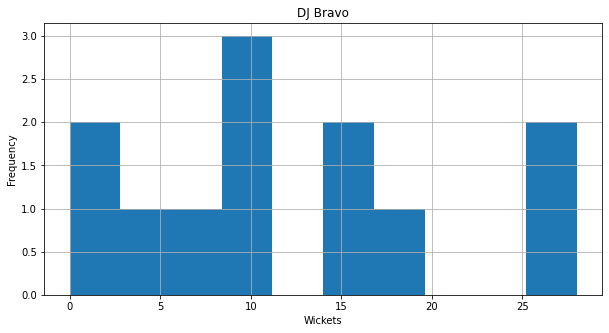

In [ ]:
# Plotting Histogram for DJ Bravo
top_5_Bowler_overall_final_stats_df_transpose.hist(column=['DJ Bravo'])
plt.xlabel('Wickets')
plt.ylabel('Frequency')
plt.show()

Let us examine the histogram plot of **DJ Bravo**



*   Ignore the zeroes values.He played in 10 IPL seasons compared to 12 seasons.

*   He has taken wickets in the range of 5 to 18 most number of times.

*   He has taken 25+ wickets two times.

*   The range of wickets taken varies from approx 4 to 28.

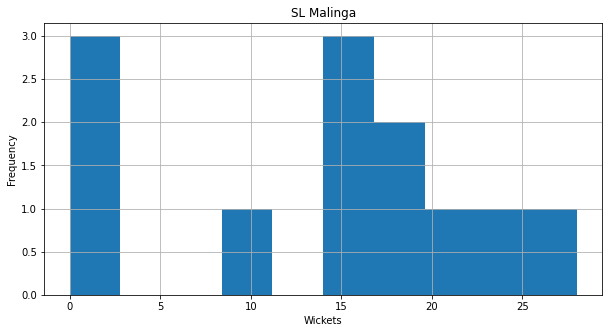

In [ ]:
# Plotting Histogram for SL Malinga
top_5_Bowler_overall_final_stats_df_transpose.hist(column=['SL Malinga'])
plt.xlabel('Wickets')
plt.ylabel('Frequency')
plt.show()

Let us examine the histogram plot of **SL Malinga**



*   Ignore the 3 zeroes values.He played in 9 IPL seasons out of 12 seasons.

*   He has taken wickets in the range of 15 to 25 most number of times.

*   He has taken 25+ wickets one time.

*   The range of wickets taken varies from approx 11 to 28.

**Total number of wickets taken by top 5 Bowlers**

In [ ]:
top_5_bowlers_overall=top_bowler_overall[:5]
top_5_bowlers_overall

,Bowler,Wickets
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147


(120.0, 190.0)

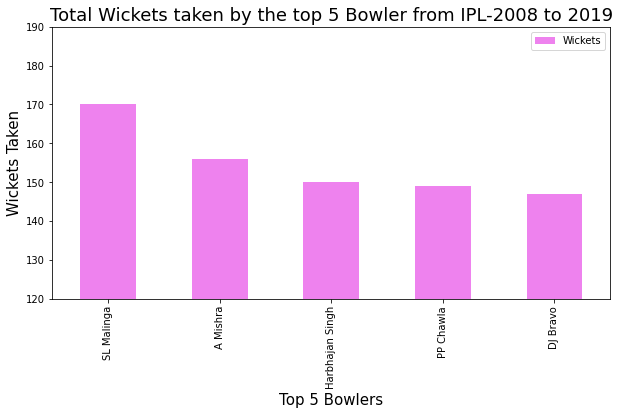

In [ ]:
# Plotting total wickets taken by the top 5 Bowler from IPL-2008 to 2019

ax = top_5_bowlers_overall.plot(x='Bowler',y='Wickets',kind="bar",figsize = (10,5),color='violet')
# Set the title
ax.set_title("Total Wickets taken by the top 5 Bowler from IPL-2008 to 2019", fontsize = 18)

# Set x and y-labels
ax.set_xlabel('Top 5 Bowlers', fontsize = 15)
ax.set_ylabel("Wickets Taken", fontsize = 15)
plt.ylim((120,190))

**Conclusion :** From the above plot we can clearly say that SL Malinga is the best bowler in the IPL.
 He is the highest wicket taking bowler in the IPL with 170 wickets, 14 more than the second best Amit Mishra.He has achieved this feat in only 9 seasons out of a total of 12 seasons.

# Lets talk about the favourite venues

In this section we will try to answer the following questions:


*   number of different venues which hosted matches.

*   the number of matches hosted in each venue.

*   the top 5 venues which hosted maximum number of matches in IPL.

*   which venue hosted the maximum number of matches.

*   What percentage of matches were held in the top 5 venues.

In [ ]:
# Finding the number of different venues which hosted the IPL matches
venue_df=matches_df_copy['venue'].value_counts()
venue_df.shape

(41,)

All the matches in IPL from 2008 to 2019 were held in 41 different venues across the globe.

In [ ]:
# Total number of matches held
venue_df.sum()

756

In [ ]:
# Displaying the top 5 venues which hosted maximum number of matches
venue_df=venue_df.reset_index()
venue_df=venue_df.rename(columns={'level_0':'index','index':'Venue','venue':'Matches held'})
venue_df.head()

,Venue,Matches held
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56


In [ ]:
# Top 5 venues are :
venue_df.head()

,Venue,Matches held
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56


In [ ]:
# Defining a function
def percent_matches_held(	Matches_held):
  '''
  This function takes Matches held column of a dataframe as input and returns the % of matches hosted by that venue as compared to total matches held in IPL from 2008 to 2019
  '''
  return (Matches_held/756)*100

In [ ]:
# Adding an extra column for matches held in respect to total matches held in Ipl so far
venue_df['Matches_held%']=venue_df.apply(lambda x:percent_matches_held(x['Matches held']),axis=1)
venue_df.head()

,Venue,Matches held,Matches_held%
0,Eden Gardens,77,10.185185
1,Wankhede Stadium,73,9.656085
2,M Chinnaswamy Stadium,73,9.656085
3,Feroz Shah Kotla,67,8.862434
4,"Rajiv Gandhi International Stadium, Uppal",56,7.407407


In [ ]:
#venue_df_index_changed

We have got the top five venues where the most number of matches were held.Lets get the exact picture of number of matches held in top 5 venues in total.

In [ ]:
# Matches held in top 5 venues
matches_held_top_5_venues=venue_df['Matches held'][:5].sum()
matches_held_top_5_venues

346

In [ ]:
matches_held_top_5_venues_percent=(matches_held_top_5_venues/756)*100
matches_held_top_5_venues_percent

45.767195767195766

Text(0, 0.5, 'matches')

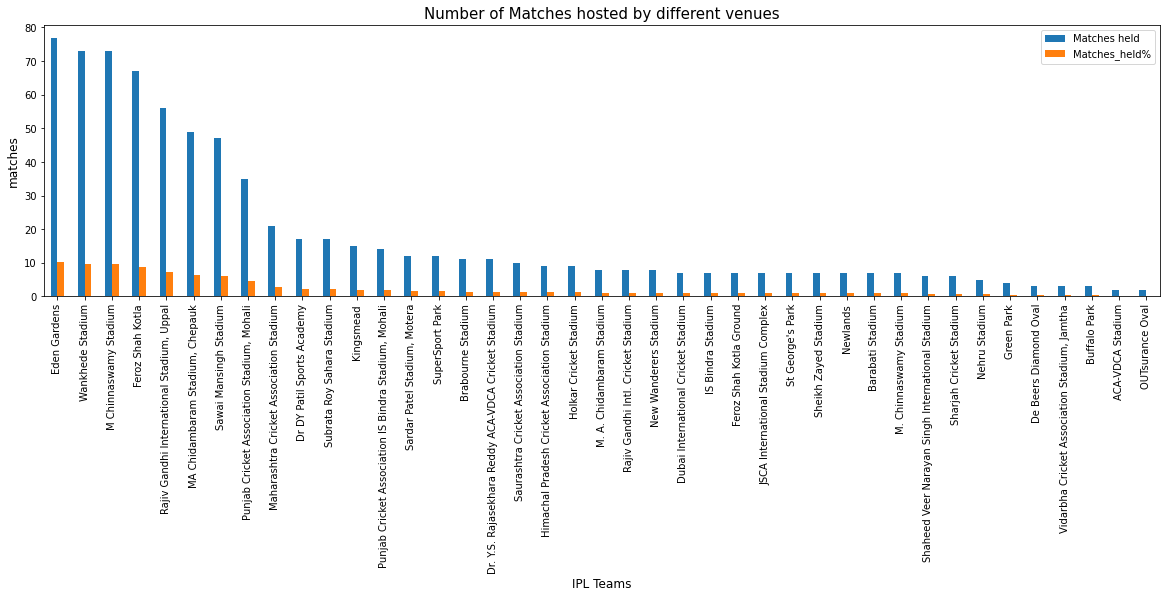

In [ ]:
# Plotting the Number of Matches hosted by different venues.
ax = venue_df.set_index('Venue').plot.bar(figsize = (20,5),fontsize = 10)

# Set the title
ax.set_title("Number of Matches hosted by different venues", fontsize = 15)

# Set x and y-labels
ax.set_xlabel('IPL Teams', fontsize = 12)
ax.set_ylabel("matches", fontsize = 12)

**Conclusion :** In total of 756 matches were held in 41 different venues in IPL from 2008 to 2019, 346 matches were held in top 5 venues,which constitutes 45.77% of the total matches held.Eden Garden has hosted the most number of matches with a tally of 77 matches which is 10.2% of the total number of matches played in IPL.

# Right and Left handed Batsman participation

In this section we will try to find out the number of left hand and right hand batsmen who participated in IPL from 2008 to 2019.

In [ ]:
players_df_copy

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,24-Feb-91,Right_Hand,Right-arm medium,India
1,A Chandila,5-Dec-83,Right_Hand,Right-arm offbreak,India
2,A Chopra,19-Sep-77,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaN,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaN,Right_Hand,Right-arm offbreak,NaN
...,...,...,...,...,...
561,Younis Khan,29-Nov-77,Right_Hand,Right-arm medium,Pakistan
562,YS Chahal,23-Jul-90,Right_Hand,Legbreak googly,India
563,Yuvraj Singh,12-Dec-81,Left_Hand,Slow left-arm orthodox,India
564,YV Takawale,5-Nov-84,Right_Hand,NaN,India


In [ ]:
players_batting_hand_df=players_df_copy['Batting_Hand'].value_counts().reset_index()
players_batting_hand_df['index'] = players_batting_hand_df['index'].replace(['Right_hand'],'Right_Hand')
players_batting_hand_df=players_batting_hand_df.groupby(['index'])['Batting_Hand'].sum().reset_index()
bplayers_batting_hand_df=players_batting_hand_df.rename(columns={'index':'Batting_Hand','Batting_Hand':'Players_count'})
bplayers_batting_hand_df

,Batting_Hand,Players_count
0,Left_Hand,142
1,Right_Hand,421


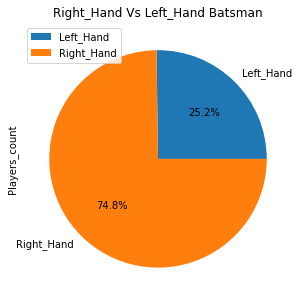

In [ ]:
# Plotting a pie chart for seeing the percentage of Batting Hand in IPL
my_labels=['Left_Hand','Right_Hand']
bplayers_batting_hand_df.plot.pie(x="Batting_Hand",title="Right_Hand Vs Left_Hand Batsman",y='Players_count',
        autopct='%1.1f%%',labels=my_labels)

**Conclusion :** 142 left hand and 421 right handed batsmen have participated in the IPL from 2008 to 2019.Right handed batsmen constitute approx 75% of the total batsmen in the IPL.

# Country of Players

In this section we will try to analyse :
 the percentage participation of players from different countries

*   the percentage of players participation from different countries.
*   countries of top 5 batsmen and bowler.



In [ ]:
players_df_copy

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,24-Feb-91,Right_Hand,Right-arm medium,India
1,A Chandila,5-Dec-83,Right_Hand,Right-arm offbreak,India
2,A Chopra,19-Sep-77,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaN,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaN,Right_Hand,Right-arm offbreak,NaN
...,...,...,...,...,...
561,Younis Khan,29-Nov-77,Right_Hand,Right-arm medium,Pakistan
562,YS Chahal,23-Jul-90,Right_Hand,Legbreak googly,India
563,Yuvraj Singh,12-Dec-81,Left_Hand,Slow left-arm orthodox,India
564,YV Takawale,5-Nov-84,Right_Hand,NaN,India


In [ ]:
# Fetching the country of top 5 batsmen :
top_5_batsmen_country=[]
for name in top_5_batsmen_overall_list:
  for index,i in enumerate(players_df_copy['Player_Name']):
    if name==i:
      top_5_batsmen_country.append(players_df_copy.loc[index,'Country'])


In [ ]:
# Creating dataframe for top 5 batsmen and their country:
top_5_batsmen_country=pd.DataFrame({'Name':top_5_batsmen_overall_list,'Country':top_5_batsmen_country})
top_5_batsmen_country

,Name,Country
0,V Kohli,India
1,SK Raina,India
2,RG Sharma,India
3,DA Warner,Australia
4,S Dhawan,India


In [ ]:
# Fetching the country of top 5 bowler :
top_5_bowler_country=[]
for name in top_5_bowler_overall_list:
  for index,i in enumerate(players_df_copy['Player_Name']):
    if name==i:
      top_5_bowler_country.append(players_df_copy.loc[index,'Country'])

In [ ]:
# Creating dataframe for top 5 bowlers and their country:
top_5_batsmen_country=pd.DataFrame({'Name':top_5_bowler_overall_list,'Country':top_5_bowler_country})
top_5_batsmen_country

,Name,Country
0,SL Malinga,Sri Lanka
1,A Mishra,India
2,Harbhajan Singh,India
3,PP Chawla,India
4,DJ Bravo,West Indies


In [ ]:
players_country=players_df_copy['Country'].value_counts().reset_index()

In [ ]:
players_country

,index,Country
0,India,264
1,Australia,72
2,South Africa,39
3,New Zealand,22
4,Sri Lanka,20
5,West Indies,19
6,England,14
7,Pakistan,13
8,Bangladesh,5
9,Zimbabwea,2


In [ ]:
players_country_df=players_country.rename(columns={'index':'Country','Country':'Players_count'})
players_country_df

,Country,Players_count
0,India,264
1,Australia,72
2,South Africa,39
3,New Zealand,22
4,Sri Lanka,20
5,West Indies,19
6,England,14
7,Pakistan,13
8,Bangladesh,5
9,Zimbabwea,2


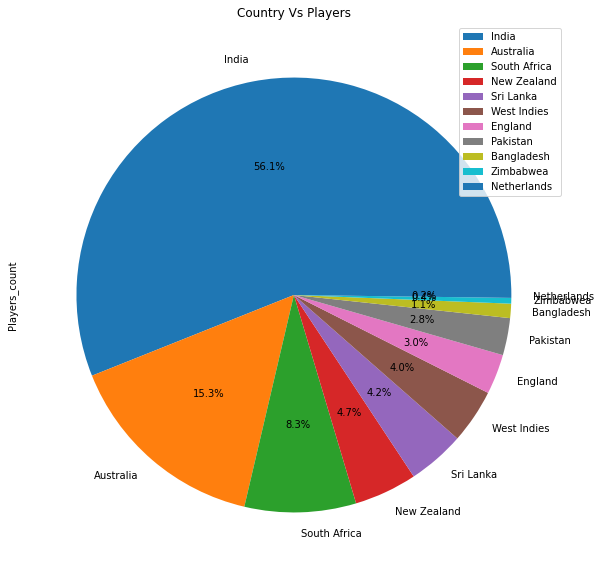

In [ ]:
# Plotting a pie chart for seeing the percentage of Batting Hand in IPL
my_labels=players_country_df['Country']
players_country_df.plot.pie(x="Country",title="Country Vs Players",y='Players_count',
        autopct='%1.1f%%',labels=my_labels,figsize = (20,10))

**Conclusion :**


*   We know IPL was formed to give domestic players of India a global exposure which justifies the Indian players contribution of 56.1%.Australian players and South African players have shown a great interest in IPL with 15.3% and 8.3% participation respectively.

*  Out of top 5 batsmen 4 are from India.India has some of the best batsmen in the world.

*  Out of top 5 bowlers 3 are India, 1 from Sri Lanka and 1 from West Indies.

# **Conclusion**

After analysing each season of IPL from 2008 to 2019 and overall stats of the team and players of IPL we have below findings:

* Mumbai Indians have won the IPL record 4 times (2013, 2015, 2017, 2019).

* Every alternate year starting from 2013.They are the best team in the IPL.

* Chennai Super Kings and Kolkata Knight riders have won the titles 2 times each.

* DA Warner was crowned the Orange Cap winner 3 times (2015,2017,2019).

* B Kumar was crowned the Purple Cap winner 2 times in a row(2016,2017).

* Virat Kohli is the ledaing runs scorer in IPL with 5426 runs.

* SL Malinga is the highest wicket taking bowler with 170 wickets.

* Chennai Super Kings with a tally of 8 is the team to have played most number of finals.

* Mumbai Indians and Chennai Super kings are the two most consistent teams in IPL.

* Toss played a major role in the outcome of the match in every season with majority of teams winning % was above 50% after winning the toss.But in the overall scenario (all seasons combined) the effect of toss on the outcome of match got reduced to 52% ie a team who has won the toss had 52% chance of winning the match.

* 756 matches were held in 41 different venues in IPL from 2008 to 2019, 346 matches were held in top 5 venues,which constitutes 45.77% of the total matches held.Eden Garden has hosted the most number of matches with a tally of 77 matches which is 10.2% of the total number of matches played in IPL.

* Teams performed better in away matches in comparison to home matches.majority of teams showed the winning% of more than 50 while playing away matches.

* Right handed batsmen constitute approx 75% of the total batsmen in the IPL.

* Players from Australia and South Africa have shown great interest in IPL with 15.3% and 8.3% participation respectively.
 


  
